In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


migration//

flow and stock


In [2]:
mig=pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/世界移民数据/移民/migration_imputed_RIKS_dec2021.csv')

# Filter the data for the years 2008 to 2019
mig = mig[(mig['year'] >= 2008) & (mig['year'] <= 2019)]

mig=mig.drop(columns=['inflow','outflow'],axis=1)

# Replace negative values in the 'flow' column with 0
mig['flow'] = mig['flow'].clip(lower=0)

# Display the filtered data
mig

,iso_or,origin,iso_des,destination,year,stock,flow
48,AAB,Antigua and Barbuda,ABW,Aruba,2008,30,0.0
49,AAB,Antigua and Barbuda,ABW,Aruba,2009,28,0.0
50,AAB,Antigua and Barbuda,ABW,Aruba,2010,25,0.0
51,AAB,Antigua and Barbuda,ABW,Aruba,2011,22,0.0
52,AAB,Antigua and Barbuda,ABW,Aruba,2012,20,0.0
...,...,...,...,...,...,...,...
2889682,ZIM,Zimbabwe,ZAM,Zambia,2015,13176,0.0
2889683,ZIM,Zimbabwe,ZAM,Zambia,2016,13239,150.0
2889684,ZIM,Zimbabwe,ZAM,Zambia,2017,13782,629.0
2889685,ZIM,Zimbabwe,ZAM,Zambia,2018,14670,976.0


In [3]:
mig['destination'].unique()

array(['Aruba', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Argentina', 'Armenia', 'American Samoa', 'Australia', 'Austria',
       'Azerbaijan', 'Bahrain', 'Barbados', 'Belgium', 'Benin',
       'Bonaire; Sint Eustatius and Saba', 'Burkina Faso', 'Bahamas; The',
       'Bhutan', 'Belarus', 'Belize', 'Bermuda', 'Bangladesh', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Burundi', 'Bulgaria', 'Cambodia', 'Cameroon',
       'Cabo Verde', "Cote d'Ivoire", 'Central African Rep.', 'Chad',
       'Chile', 'China', 'Canada', 'Colombia', 'Comoros', 'Congo; Rep.',
       'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Rep.', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Rep.', 'Congo; Dem. Rep.', 'Vietnam', 'Ecuador',
       'Egypt; Arab Rep.', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Timor-Leste', 'Fiji', 'Finland', 'France',
       'Micronesia; Fed. Sts.', 

In [4]:
mig.shape

(480258, 7)

In [5]:
mig['origin'].unique()

array(['Antigua and Barbuda', 'Aruba', 'Afghanistan', 'Anguilla',
       'Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina', 'Armenia',
       'American Samoa', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Barbados', 'Belgium', 'Benin', 'Bonaire; Sint Eustatius and Saba',
       'Burkina Faso', 'Bahamas; The', 'Bhutan', 'Belarus', 'Belize',
       'Bermuda', 'Bangladesh', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Burundi', 'Bulgaria',
       'Cambodia', 'Cameroon', 'Cabo Verde', "Cote d'Ivoire",
       'Central African Rep.', 'Chad', 'Chile', 'China', 'Canada',
       'Cook Islands', 'Colombia', 'Comoros', 'Congo; Rep.', 'Costa Rica',
       'Croatia', 'Cuba', 'Curacao', 'Cayman Islands', 'Cyprus',
       'Czechoslovakia', 'Czech Rep.', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Rep.', 'Congo; Dem. Rep.', 'Vietnam', 'Ecuador',
       'Egypt; Arab Rep.', 'Equatorial Guinea', 'Eritrea',
       'Sahrawi Arab Dem. Rep.

In [6]:
# prompt: 将mig中'origin'为Congo; Rep.的更改为Republic of the Congo，Slovak Rep.改为Slovakia

mig['origin'] = mig['origin'].replace({'Congo; Rep.': 'Republic of the Congo', 'Slovak Rep.': 'Slovakia','Swaziland': 'Eswatini','Gambia; The': 'The Gambia','Dominican Rep.':'Dominican Republic',
                                     'Lao People\'s Dem. Rep.':'Laos', 'Korea; Rep.':'South Korea','Czech Rep.': 'Czech Republic','Turkey':'Turkiye','Kyrgyz Rep.':'Kyrgyz Republic',
                                     'Congo; Dem. Rep.':'Democratic Republic of the Congo','Central African Rep.':'Central African Republic','Egypt; Arab Rep.':'Egypt','Yemen; Rep.':'Yemen','Syrian Arab Rep.':'Syria','Iran; Islamic Rep.':'Iran','Russian Federation':'Russia'})
mig['destination'] = mig['destination'].replace({'Congo; Rep.': 'Republic of the Congo', 'Slovak Rep.': 'Slovakia','Swaziland': 'Eswatini','Gambia; The': 'The Gambia','Dominican Rep.':'Dominican Republic',
                                     'Lao People\'s Dem. Rep.':'Laos', 'Korea; Rep.':'South Korea','Czech Rep.': 'Czech Republic','Turkey':'Turkiye','Kyrgyz Rep.':'Kyrgyz Republic',
                                                 'Congo; Dem. Rep.':'Democratic Republic of the Congo','Central African Rep.':'Central African Republic','Egypt; Arab Rep.':'Egypt','Yemen; Rep.':'Yemen','Syrian Arab Rep.':'Syria','Iran; Islamic Rep.':'Iran','Russian Federation':'Russia'})

voilence
should deal with the definition of indexes

In [7]:
#updated_df

In [8]:
xls = pd.ExcelFile('/content/drive/MyDrive/Colab_Notebooks/世界移民数据/暴力数据/OCI.xlsx')

In [9]:
#先把表头名列出来，对每个表头分别提取数据并新增时间列，最后合并
# Display sheet names to understand the structure of the file
sheet_names = xls.sheet_names
# Initialize an empty DataFrame to hold the combined data
combined_df = pd.DataFrame()

# Iterate over the sheet names (excluding 'Contents' and 'Overall Scores')
for sheet in sheet_names:
    if sheet not in ['Contents', 'Overall Scores']:
        # Read each sheet into a DataFrame
        temp_df = pd.read_excel(xls, sheet_name=sheet)
        # Add a new column 'year' with the sheet name
        temp_df['year'] = sheet
        # Append the data to the combined DataFrame
        combined_df = pd.concat([combined_df, temp_df], ignore_index=True)
combined_df=combined_df.dropna()
# Reprocess the combined DataFrame to set the correct headers and reset index
combined_df=combined_df.reset_index(drop=True)
combined_df.columns = combined_df.iloc[0] # Set the first row (previously unnamed columns) as the header
#select rows with data
combined_df=combined_df[combined_df['Rank']!='Rank']

float_col=[ 'Overall Score', 'Rank',
       'Access To Small Arms', 'Armed Services Personnel Rate',
       'Deaths From External Conflict', 'Deaths From Internal Conflict',
       'External Conflicts Fought', 'External Peace', 'Homicide Rate',
       'Incarceration Rate', 'Intensity Of Internal Conflict',
       'Internal Conflicts Fought', 'Internal Peace', 'Militarisation',
       'Military Expenditure (% Gdp)', 'Neighbouring Countries Relations',
       'Nuclear And Heavy Weapons', 'Ongoing Conflict',
       'Perceptions Of Criminality', 'Police Rate', 'Political Instability',
       'Political Terror Scale', 'Refugees And Idps', 'Safety and Security',
       'Terrorism Impact', 'Un Peacekeeping Funding', 'Violent Crime',
       'Violent Demonstrations', 'Weapons Exports', 'Weapons Imports']
#datatyoe

peace=combined_df
for col in float_col:
  peace[col]=peace[col].astype('float')

print(peace.shape)
peace.head()

(2596, 34)


,Country,Iso3c,Year,Overall Score,Rank,Access To Small Arms,Armed Services Personnel Rate,Deaths From External Conflict,Deaths From Internal Conflict,External Conflicts Fought,...,Political Terror Scale,Refugees And Idps,Safety and Security,Terrorism Impact,Un Peacekeeping Funding,Violent Crime,Violent Demonstrations,Weapons Exports,Weapons Imports,2008
1,Afghanistan,AFG,2008,3.104,3.104,5.0,1.245,1.0,3.994,1.0,...,5.0,5.000,3.372441,4.0720,4.200000,3.0,1.50,1.000,1.043,2008
2,Albania,ALB,2008,1.791,1.791,4.0,1.529,1.0,1.000,1.5,...,2.5,1.170,2.235735,1.0040,1.544722,3.0,1.00,1.000,1.064,2008
3,Algeria,DZA,2008,2.253,2.253,3.0,1.654,1.0,2.276,1.0,...,4.0,1.010,2.524312,3.5728,3.118850,3.0,1.50,1.000,1.605,2008
4,Angola,AGO,2008,1.991,1.991,3.0,2.006,1.0,1.000,1.2,...,3.0,1.293,2.395206,1.0000,1.539251,2.5,2.25,1.000,1.094,2008
5,Argentina,ARG,2008,1.820,1.820,2.0,1.288,1.0,1.000,1.0,...,2.0,1.001,2.370653,1.0576,1.472312,3.0,1.00,1.001,1.074,2008


In [10]:
combined_df.columns

Index(['Country', 'Iso3c', 'Year', 'Overall Score', 'Rank',
       'Access To Small Arms', 'Armed Services Personnel Rate',
       'Deaths From External Conflict', 'Deaths From Internal Conflict',
       'External Conflicts Fought', 'External Peace', 'Homicide Rate',
       'Incarceration Rate', 'Intensity Of Internal Conflict',
       'Internal Conflicts Fought', 'Internal Peace', 'Militarisation',
       'Military Expenditure (% Gdp)', 'Neighbouring Countries Relations',
       'Nuclear And Heavy Weapons', 'Ongoing Conflict',
       'Perceptions Of Criminality', 'Police Rate', 'Political Instability',
       'Political Terror Scale', 'Refugees And Idps', 'Safety and Security',
       'Terrorism Impact', 'Un Peacekeeping Funding', 'Violent Crime',
       'Violent Demonstrations', 'Weapons Exports', 'Weapons Imports', '2008'],
      dtype='object', name=0)

In [11]:
peace=combined_df[['Country','Iso3c', 'Year','Overall Score','Ongoing Conflict','Terrorism Impact','Violent Crime','Political Instability','Police Rate', 'Refugees And Idps']]

In [12]:
peace

,Country,Iso3c,Year,Overall Score,Ongoing Conflict,Terrorism Impact,Violent Crime,Political Instability,Police Rate,Refugees And Idps
1,Afghanistan,AFG,2008,3.104,3.152660,4.0720,3.0,4.25,2.500,5.000
2,Albania,ALB,2008,1.791,1.247182,1.0040,3.0,2.75,2.701,1.170
3,Algeria,DZA,2008,2.253,2.110847,3.5728,3.0,2.75,2.624,1.010
4,Angola,AGO,2008,1.991,1.654789,1.0000,2.5,3.25,2.500,1.293
5,Argentina,ARG,2008,1.820,1.402576,1.0576,3.0,2.25,4.436,1.001
...,...,...,...,...,...,...,...,...,...,...
2607,Venezuela,VEN,2023,2.693,2.586082,3.3130,5.0,4.75,2.000,1.247
2608,Vietnam,VNM,2023,1.745,1.402576,1.0910,2.0,2.50,3.500,1.005
2609,Yemen,YEM,2023,3.350,3.485752,3.2410,5.0,4.75,5.000,5.000
2610,Zambia,ZMB,2023,1.898,1.576973,1.0000,3.0,2.50,1.500,1.000


In [13]:

# Install necessary libraries
!pip install geopandas matplotlib

# Import necessary libraries
import geopandas as gpd
import matplotlib.pyplot as plt

# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

<ipython-input-13-6cdf6b928c6f>:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [14]:


# Merge your data with the world map data
# Assuming 'Destination Code' in your data corresponds to 'iso_a3' in the world map
merged_data = world.merge(peace, left_on='iso_a3', right_on='Iso3c',how='left')
merged_data = merged_data.to_crs(epsg=4326)
merged_data

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Iso3c,Year,Overall Score,Ongoing Conflict,Terrorism Impact,Violent Crime,Political Instability,Police Rate,Refugees And Idps
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,TZA,2008,1.735,1.402576,1.0232,3.0,2.25,1.434,1.001
2,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,TZA,2009,1.740,1.434206,1.1344,3.0,2.25,1.434,1.001
3,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,TZA,2010,1.773,1.408039,1.0616,3.0,2.25,1.434,1.001
4,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,TZA,2011,1.789,1.408039,1.0920,3.0,2.25,1.434,1.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,11062113.0,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",South Sudan,SSD,2019,3.272,3.098871,1.8470,5.0,5.00,2.500,5.000
2546,11062113.0,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",South Sudan,SSD,2020,3.278,3.089121,1.5530,5.0,5.00,2.500,5.000
2547,11062113.0,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",South Sudan,SSD,2021,3.210,2.993676,1.0000,5.0,5.00,2.500,5.000
2548,11062113.0,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",South Sudan,SSD,2022,3.191,3.004519,1.0000,5.0,5.00,2.500,5.000


In [15]:
merged_data.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry',
       'Country', 'Iso3c', 'Year', 'Overall Score', 'Ongoing Conflict',
       'Terrorism Impact', 'Violent Crime', 'Political Instability',
       'Police Rate', 'Refugees And Idps'],
      dtype='object')

In [16]:
#is_battle index
is_battle=pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/世界移民数据/is_battle.xlsx')
is_battle

,Iso3c,is_battle,Year
0,NaN,0,NaN
1,TZA,0,2008.0
2,TZA,0,2009.0
3,TZA,0,2010.0
4,TZA,0,2011.0
...,...,...,...
2545,SSD,0,2019.0
2546,SSD,0,2020.0
2547,SSD,0,2021.0
2548,SSD,0,2022.0


In [17]:
is_battle.columns

Index(['Iso3c', 'is_battle', 'Year'], dtype='object')

In [18]:
peace=merged_data.merge(is_battle,left_on=('Iso3c','Year'),right_on=('Iso3c','Year'),how='left')
peace

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Iso3c,Year,Overall Score,Ongoing Conflict,Terrorism Impact,Violent Crime,Political Instability,Police Rate,Refugees And Idps,is_battle
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,11062113.0,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",South Sudan,SSD,2019,3.272,3.098871,1.847,5.0,5.0,2.5,5.0,0
2852,11062113.0,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",South Sudan,SSD,2020,3.278,3.089121,1.553,5.0,5.0,2.5,5.0,0
2853,11062113.0,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",South Sudan,SSD,2021,3.210,2.993676,1.000,5.0,5.0,2.5,5.0,0
2854,11062113.0,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",South Sudan,SSD,2022,3.191,3.004519,1.000,5.0,5.0,2.5,5.0,0


In [19]:
# prompt: 筛选iso_or为'UKR',destination为Germany的行，然后plot时间序列图，y轴为flow，想

import matplotlib.pyplot as plt

# Filter the data
filtered_mig = mig[(mig['origin'] == 'Ukraine') & (mig['destination'] == 'Germany')]
filtered_peace = peace[(peace['Country'] == 'Ukraine')&(peace['Year'] <=2019 )]
# Sort by year
filtered_mig = filtered_mig.sort_values('year')
filtered_mig

,iso_or,origin,iso_des,destination,year,stock,flow
2721940,UKR,Ukraine,GMY,Germany,2008,204160,6288.0
2721941,UKR,Ukraine,GMY,Germany,2009,207730,5756.0
2721942,UKR,Ukraine,GMY,Germany,2010,210247,4764.0
2721943,UKR,Ukraine,GMY,Germany,2011,211138,3189.0
2721944,UKR,Ukraine,GMY,Germany,2012,210810,1989.0
2721945,UKR,Ukraine,GMY,Germany,2013,210698,2211.0
2721946,UKR,Ukraine,GMY,Germany,2014,212075,3709.0
2721947,UKR,Ukraine,GMY,Germany,2015,216035,6317.0
2721948,UKR,Ukraine,GMY,Germany,2016,223320,9696.0
2721949,UKR,Ukraine,GMY,Germany,2017,233574,12772.0


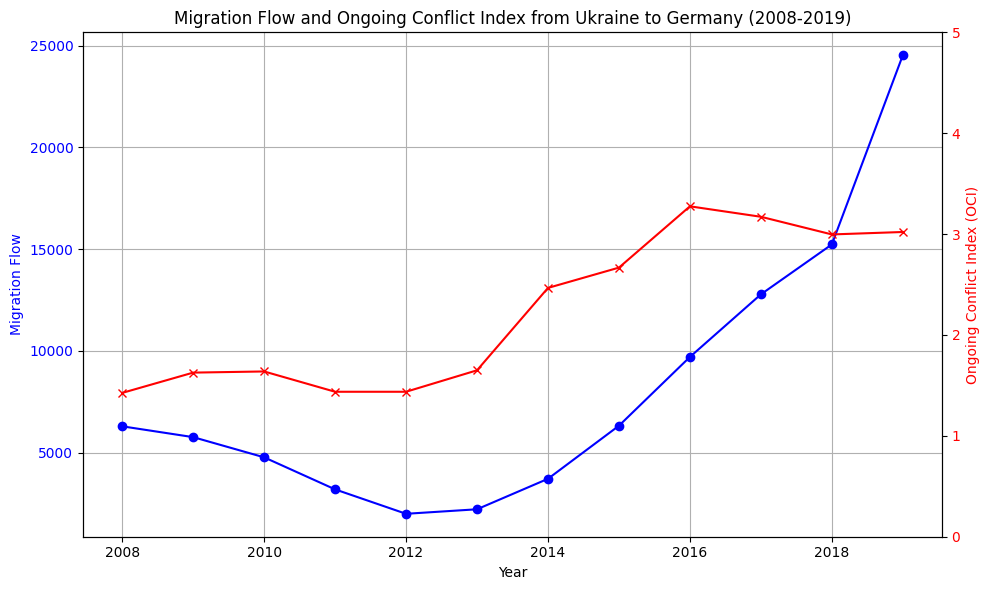

In [20]:
import matplotlib.pyplot as plt

# 假设 filtered_mig 和 filtered_peace 数据集已经加载，并且包含 'year', 'flow' 和 'Ongoing Conflict' 列

fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制迁移流量
ax1.plot(filtered_mig['year'], filtered_mig['flow'], marker='o', label='Migration Flow', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Migration Flow', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 创建第二个纵坐标轴
ax2 = ax1.twinx()
ax2.plot(filtered_peace['Year'], filtered_peace['Ongoing Conflict'], marker='x', color='red', label='OCI')
ax2.set_ylabel('Ongoing Conflict Index (OCI)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 5)

# 设置图形标题
plt.title('Migration Flow and Ongoing Conflict Index from Ukraine to Germany (2008-2019)')

# 添加网格线
ax1.grid(True)

# 显示图形
fig.tight_layout()  # 确保标签不重叠
plt.show()

可以观察到迁移量变化趋势与OCI 指数一致，可以猜测OCI指数能带来对外迁移率的上升

In [21]:
mig[(mig['origin'] == 'Rwanda')].sort_values('flow')

,iso_or,origin,iso_des,destination,year,stock,flow
2149311,RWA,Rwanda,AAB,Antigua and Barbuda,2008,0,0.0
2157123,RWA,Rwanda,MYA,Myanmar,2009,0,0.0
2157122,RWA,Rwanda,MYA,Myanmar,2008,0,0.0
2156991,RWA,Rwanda,MSI,Marshall Islands,2018,0,0.0
2156990,RWA,Rwanda,MSI,Marshall Islands,2017,0,0.0
...,...,...,...,...,...,...,...
2152622,RWA,Rwanda,DRC,Democratic Republic of the Congo,2011,147427,24919.0
2152626,RWA,Rwanda,DRC,Democratic Republic of the Congo,2015,275118,28047.0
2152625,RWA,Rwanda,DRC,Democratic Republic of the Congo,2014,249526,34310.0
2152624,RWA,Rwanda,DRC,Democratic Republic of the Congo,2013,217411,35651.0


In [22]:
# prompt: 筛选iso_or为'UKR',destination为Germany的行，然后plot时间序列图，y轴为flow，想

import matplotlib.pyplot as plt

# Filter the data
filtered_mig = mig[(mig['origin'] == 'Rwanda') & (mig['iso_des'] == 'DRC')]
filtered_peace = peace[(peace['Country'] == 'Rwanda')&(peace['Year'] <=2019 )]
# Sort by year
filtered_mig = filtered_mig.sort_values('year')
filtered_mig

,iso_or,origin,iso_des,destination,year,stock,flow
2152619,RWA,Rwanda,DRC,Democratic Republic of the Congo,2008,111641,7078.0
2152620,RWA,Rwanda,DRC,Democratic Republic of the Congo,2009,114302,3945.0
2152621,RWA,Rwanda,DRC,Democratic Republic of the Congo,2010,123854,10831.0
2152622,RWA,Rwanda,DRC,Democratic Republic of the Congo,2011,147427,24919.0
2152623,RWA,Rwanda,DRC,Democratic Republic of the Congo,2012,183662,37799.0
2152624,RWA,Rwanda,DRC,Democratic Republic of the Congo,2013,217411,35651.0
2152625,RWA,Rwanda,DRC,Democratic Republic of the Congo,2014,249526,34310.0
2152626,RWA,Rwanda,DRC,Democratic Republic of the Congo,2015,275118,28047.0
2152627,RWA,Rwanda,DRC,Democratic Republic of the Congo,2016,278217,5735.0
2152628,RWA,Rwanda,DRC,Democratic Republic of the Congo,2017,272122,0.0


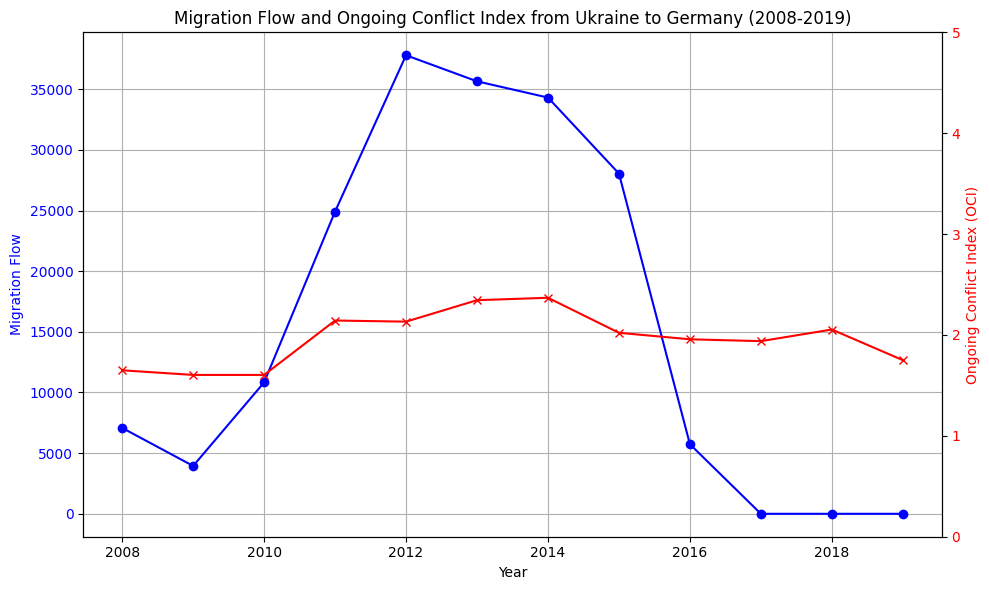

In [23]:
import matplotlib.pyplot as plt

# 假设 filtered_mig 和 filtered_peace 数据集已经加载，并且包含 'year', 'flow' 和 'Ongoing Conflict' 列

fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制迁移流量
ax1.plot(filtered_mig['year'], filtered_mig['flow'], marker='o', label='Migration Flow', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Migration Flow', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 创建第二个纵坐标轴
ax2 = ax1.twinx()
ax2.plot(filtered_peace['Year'], filtered_peace['Ongoing Conflict'], marker='x', color='red', label='OCI')
ax2.set_ylabel('Ongoing Conflict Index (OCI)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 5)

# 设置图形标题
plt.title('Migration Flow and Ongoing Conflict Index from Ukraine to Germany (2008-2019)')

# 添加网格线
ax1.grid(True)

# 显示图形
fig.tight_layout()  # 确保标签不重叠
plt.show()

通过对卢旺达国家迁移率与OCI指数变化趋势对比，趋势受OCI影响但有更多因素共同作用迁移率变化，要从多方面进行分析。图中情况是由于2015年之后DRC爆发了严重的内战。

In [24]:
# prompt: 查看mig中的	iso_or	列有多少个不同的值，列出来

unique_values = mig['destination'].unique()

# Print the number of unique values
print(f"Number of unique values in 'iso_or': {len(unique_values)}")

# Print the unique values
print(unique_values)


Number of unique values in 'iso_or': 229
['Aruba' 'Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Argentina'
 'Armenia' 'American Samoa' 'Australia' 'Austria' 'Azerbaijan' 'Bahrain'
 'Barbados' 'Belgium' 'Benin' 'Bonaire; Sint Eustatius and Saba'
 'Burkina Faso' 'Bahamas; The' 'Bhutan' 'Belarus' 'Belize' 'Bermuda'
 'Bangladesh' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei Darussalam' 'Burundi' 'Bulgaria' 'Cambodia' 'Cameroon'
 'Cabo Verde' "Cote d'Ivoire" 'Central African Republic' 'Chad' 'Chile'
 'China' 'Canada' 'Colombia' 'Comoros' 'Republic of the Congo'
 'Costa Rica' 'Croatia' 'Cuba' 'Curacao' 'Cayman Islands' 'Cyprus'
 'Czech Republic' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic'
 'Democratic Republic of the Congo' 'Vietnam' 'Ecuador' 'Egypt'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Timor-Leste' 'Fiji'
 'Finland' 'France' 'Micronesia; Fed. Sts.' 'Gabon' 'The Gambia' 'Ghana'
 'Germany' 'Guinea-Bissau' 'Greece' 'Georgia' 'Greenland' 'Gre

In [25]:
mig['origin'].unique()


array(['Antigua and Barbuda', 'Aruba', 'Afghanistan', 'Anguilla',
       'Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina', 'Armenia',
       'American Samoa', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Barbados', 'Belgium', 'Benin', 'Bonaire; Sint Eustatius and Saba',
       'Burkina Faso', 'Bahamas; The', 'Bhutan', 'Belarus', 'Belize',
       'Bermuda', 'Bangladesh', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Burundi', 'Bulgaria',
       'Cambodia', 'Cameroon', 'Cabo Verde', "Cote d'Ivoire",
       'Central African Republic', 'Chad', 'Chile', 'China', 'Canada',
       'Cook Islands', 'Colombia', 'Comoros', 'Republic of the Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechoslovakia', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic',
       'Democratic Republic of the Congo', 'Vietnam', 'Ecuador', 'Egypt',
       'Equatorial Guinea', 'Eritre

In [26]:
mig.describe()

,year,stock,flow
count,480258.000000,4.802580e+05,480105.000000
mean,2013.180553,5.958092e+03,219.990279
std,3.274527,8.841550e+04,3897.189950
min,2008.000000,0.000000e+00,0.000000
25%,2010.000000,0.000000e+00,0.000000
50%,2013.000000,1.000000e+00,0.000000
75%,2016.000000,6.100000e+01,0.000000
max,2019.000000,1.223939e+07,618795.000000


Refugee指标可以代表产生难民能力

gravity index should deal with timeseries

In [27]:
gra=pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/世界移民数据/Gravity_csv_V202211/Gravity_index.csv')
gra.head()

<ipython-input-27-fcd901baa481>:1: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  gra=pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/世界移民数据/Gravity_csv_V202211/Gravity_index.csv')


,year,country_id_o,country_id_d,iso3_o,iso3_d,iso3num_o,iso3num_d,country_exists_o,country_exists_d,gmt_offset_2020_o,...,entry_time_o,entry_time_d,entry_tp_o,entry_tp_d,tradeflow_comtrade_o,tradeflow_comtrade_d,tradeflow_baci,manuf_tradeflow_baci,tradeflow_imf_o,tradeflow_imf_d
0,2008,ABW,ABW,ABW,ABW,533.0,533.0,1,1,-4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,ABW,ABW,ABW,ABW,533.0,533.0,1,1,-4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,ABW,ABW,ABW,ABW,533.0,533.0,1,1,-4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011,ABW,ABW,ABW,ABW,533.0,533.0,1,1,-4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012,ABW,ABW,ABW,ABW,533.0,533.0,1,1,-4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
gra.columns

Index(['year', 'country_id_o', 'country_id_d', 'iso3_o', 'iso3_d', 'iso3num_o',
       'iso3num_d', 'country_exists_o', 'country_exists_d',
       'gmt_offset_2020_o', 'gmt_offset_2020_d', 'distw_harmonic',
       'distw_arithmetic', 'distw_harmonic_jh', 'distw_arithmetic_jh', 'dist',
       'main_city_source_o', 'main_city_source_d', 'distcap', 'contig',
       'diplo_disagreement', 'scaled_sci_2021', 'comlang_off', 'comlang_ethno',
       'comcol', 'col45', 'legal_old_o', 'legal_old_d', 'legal_new_o',
       'legal_new_d', 'comleg_pretrans', 'comleg_posttrans',
       'transition_legalchange', 'comrelig', 'heg_o', 'heg_d', 'col_dep_ever',
       'col_dep', 'col_dep_end_year', 'col_dep_end_conflict', 'empire',
       'sibling_ever', 'sibling', 'sever_year', 'sib_conflict', 'pop_o',
       'pop_d', 'gdp_o', 'gdp_d', 'gdpcap_o', 'gdpcap_d', 'pop_source_o',
       'pop_source_d', 'gdp_source_o', 'gdp_source_d', 'gdp_ppp_o',
       'gdp_ppp_d', 'gdpcap_ppp_o', 'gdpcap_ppp_d', 'pop_pwt_o',

In [29]:
gra=gra[['year','iso3_o', 'iso3_d','distw_arithmetic','contig', 'comlang_ethno',
       'col45','comrelig','pop_o',
       'pop_d', 'gdp_o', 'gdp_d']]

In [30]:
gra.rename(columns={'iso3_o':'origincode',
          'iso3_d':'des_code',
          'distw_arithmetic':'dist_pop',
          'comlang_ethno':'common_lan',
          'col45':'colonial_link',
          'comrelig':'commom_reli',
          'pop_o':'o_pop',
          'pop_d':'d_pop',
          'gdp_o':'o_gdp',
          'gdp_d':'d_gdp'}
          ,inplace=True)


In [31]:
#use the fillna method with the method='ffill' parameter to replace all NA values with the last non-NA value in the column.
gra.fillna(method='ffill', inplace=True)

gra.head()

<ipython-input-31-bcf0c6c87552>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gra.fillna(method='ffill', inplace=True)


,year,origincode,des_code,dist_pop,contig,common_lan,colonial_link,commom_reli,o_pop,d_pop,o_gdp,d_gdp
0,2008,ABW,ABW,32.0,0.0,0.0,0.0,0.746,101.344,101.344,2791960.832,2791960.832
1,2009,ABW,ABW,32.0,0.0,0.0,0.0,0.746,101.418,101.418,2498932.992,2498932.992
2,2010,ABW,ABW,32.0,0.0,0.0,0.0,0.746,101.597,101.597,2467703.808,2467703.808
3,2011,ABW,ABW,32.0,0.0,0.0,0.0,0.746,101.932,101.932,2584463.616,2584463.616
4,2012,ABW,ABW,32.0,0.0,0.0,0.0,0.746,102.384,102.384,2584463.616,2584463.616


In [32]:
gra

,year,origincode,des_code,dist_pop,contig,common_lan,colonial_link,commom_reli,o_pop,d_pop,o_gdp,d_gdp
0,2008,ABW,ABW,32.0,0.0,0.0,0.0,0.746,101.344,101.344,2.791961e+06,2.791961e+06
1,2009,ABW,ABW,32.0,0.0,0.0,0.0,0.746,101.418,101.418,2.498933e+06,2.498933e+06
2,2010,ABW,ABW,32.0,0.0,0.0,0.0,0.746,101.597,101.597,2.467704e+06,2.467704e+06
3,2011,ABW,ABW,32.0,0.0,0.0,0.0,0.746,101.932,101.932,2.584464e+06,2.584464e+06
4,2012,ABW,ABW,32.0,0.0,0.0,0.0,0.746,102.384,102.384,2.584464e+06,2.584464e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
762043,2015,ZWE,ZWE,157.0,0.0,0.0,0.0,0.067,15777.451,15777.451,1.607238e+07,1.607238e+07
762044,2016,ZWE,ZWE,157.0,0.0,0.0,0.0,0.067,16150.362,16150.362,1.628921e+07,1.628921e+07
762045,2017,ZWE,ZWE,157.0,0.0,0.0,0.0,0.067,14236.599,14236.599,1.758489e+07,1.758489e+07
762046,2018,ZWE,ZWE,157.0,0.0,0.0,0.0,0.067,14438.812,14438.812,1.811554e+07,1.811554e+07


In [33]:
# prompt: 筛选出gra中o_gdp与d_gdp列为0的行

gdp_zero = gra[(gra['o_gdp'].isna()) | (gra['d_gdp'].isna())]


In [34]:
gdp_zero

,year,origincode,des_code,dist_pop,contig,common_lan,colonial_link,commom_reli,o_pop,d_pop,o_gdp,d_gdp


还是需要另外找一个gdp的数据集

In [35]:
gra.shape

(762048, 12)

In [36]:
gra.dtypes

,0
year,int64
origincode,object
des_code,object
dist_pop,float64
contig,float64
common_lan,float64
colonial_link,float64
commom_reli,float64
o_pop,float64
d_pop,float64


matrix

merge

In [37]:
merged_data = mig.merge(peace, left_on=('origin','year'), right_on=('Country','Year'),how='inner')
merged_data.rename(columns={'Country':'Country1','Iso3c':'Iso3c1'},inplace=True)
merged_data

,iso_or,origin,iso_des,destination,year,stock,flow,pop_est,continent,name,...,Iso3c1,Year,Overall Score,Ongoing Conflict,Terrorism Impact,Violent Crime,Political Instability,Police Rate,Refugees And Idps,is_battle
0,AFG,Afghanistan,AAB,Antigua and Barbuda,2008,0,0.0,38041754.0,Asia,Afghanistan,...,AFG,2008,3.104,3.152660,4.072,3.0,4.250,2.500,5.000,1
1,AFG,Afghanistan,ABW,Aruba,2008,0,0.0,38041754.0,Asia,Afghanistan,...,AFG,2008,3.104,3.152660,4.072,3.0,4.250,2.500,5.000,1
2,AFG,Afghanistan,ALB,Albania,2008,0,0.0,38041754.0,Asia,Afghanistan,...,AFG,2008,3.104,3.152660,4.072,3.0,4.250,2.500,5.000,1
3,AFG,Afghanistan,ALG,Algeria,2008,4,0.0,38041754.0,Asia,Afghanistan,...,AFG,2008,3.104,3.152660,4.072,3.0,4.250,2.500,5.000,1
4,AFG,Afghanistan,AND,Andorra,2008,3,0.0,38041754.0,Asia,Afghanistan,...,AFG,2008,3.104,3.152660,4.072,3.0,4.250,2.500,5.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352206,ZIM,Zimbabwe,UGA,Uganda,2019,1,0.0,14645468.0,Africa,Zimbabwe,...,ZWE,2019,2.310,2.506441,2.000,4.5,3.875,1.662,1.034,0
352207,ZIM,Zimbabwe,UKG,United Kingdom,2019,166976,5265.0,14645468.0,Africa,Zimbabwe,...,ZWE,2019,2.310,2.506441,2.000,4.5,3.875,1.662,1.034,0
352208,ZIM,Zimbabwe,USA,United States of America,2019,75411,6052.0,14645468.0,Africa,Zimbabwe,...,ZWE,2019,2.310,2.506441,2.000,4.5,3.875,1.662,1.034,0
352209,ZIM,Zimbabwe,VEN,Venezuela,2019,13,0.0,14645468.0,Africa,Zimbabwe,...,ZWE,2019,2.310,2.506441,2.000,4.5,3.875,1.662,1.034,0


In [38]:
merged_data = merged_data.merge(peace, left_on=('destination','year'), right_on=('Country','Year'),how='inner')
merged_data.rename(columns={'Country':'Country2','Iso3c':'Iso3c2'},inplace=True)
merged_data

,iso_or,origin,iso_des,destination,year,stock,flow,pop_est_x,continent_x,name_x,...,Iso3c2,Year_y,Overall Score_y,Ongoing Conflict_y,Terrorism Impact_y,Violent Crime_y,Political Instability_y,Police Rate_y,Refugees And Idps_y,is_battle_y
0,AFG,Afghanistan,ALB,Albania,2008,0,0.0,38041754.0,Asia,Afghanistan,...,ALB,2008,1.791,1.247182,1.004,3.0,2.75,2.701,1.170,0
1,ALG,Algeria,ALB,Albania,2008,0,0.0,43053054.0,Africa,Algeria,...,ALB,2008,1.791,1.247182,1.004,3.0,2.75,2.701,1.170,0
2,ANG,Angola,ALB,Albania,2008,0,0.0,31825295.0,Africa,Angola,...,ALB,2008,1.791,1.247182,1.004,3.0,2.75,2.701,1.170,0
3,ARG,Argentina,ALB,Albania,2008,0,0.0,44938712.0,South America,Argentina,...,ALB,2008,1.791,1.247182,1.004,3.0,2.75,2.701,1.170,0
4,ARM,Armenia,ALB,Albania,2008,3,0.0,2957731.0,Asia,Armenia,...,ALB,2008,1.791,1.247182,1.004,3.0,2.75,2.701,1.170,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259960,SEN,Senegal,GAM,The Gambia,2019,129403,4181.0,16296364.0,Africa,Senegal,...,GMB,2019,1.909,1.462238,1.000,3.0,2.75,2.500,1.232,0
259961,SIE,Sierra Leone,GAM,The Gambia,2019,2576,79.0,7813215.0,Africa,Sierra Leone,...,GMB,2019,1.909,1.462238,1.000,3.0,2.75,2.500,1.232,0
259962,PAK,Pakistan,AFG,Afghanistan,2019,146563,0.0,216565318.0,Asia,Pakistan,...,AFG,2019,3.538,3.635710,4.643,5.0,5.00,3.500,5.000,1
259963,TAJ,Tajikistan,AFG,Afghanistan,2019,6268,0.0,9321018.0,Asia,Tajikistan,...,AFG,2019,3.538,3.635710,4.643,5.0,5.00,3.500,5.000,1


gra中有重复行，要删掉

In [39]:
print(merged_data[['Iso3c1', 'Iso3c2', 'year']].duplicated().sum())
print(gra[['origincode', 'des_code', 'year']].duplicated().sum())


0
53460


In [40]:
# prompt: 把gra中['origincode', 'des_code', 'year']重复的行从gra中删除

gra = gra.drop_duplicates(subset=['origincode', 'des_code', 'year'], keep='last')
gra.rename(columns={'year':'Year'},inplace=True)

<ipython-input-40-40bb5f68ff7a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gra.rename(columns={'year':'Year'},inplace=True)


In [41]:
merged_data1=pd.merge(merged_data,gra,how='inner',left_on=('Iso3c1','Iso3c2','year'),right_on=('origincode', 'des_code','Year'))
merged_data1

,iso_or,origin,iso_des,destination,year,stock,flow,pop_est_x,continent_x,name_x,...,des_code,dist_pop,contig,common_lan,colonial_link,commom_reli,o_pop,d_pop,o_gdp,d_gdp
0,AFG,Afghanistan,ALB,Albania,2008,0,0.0,38041754.0,Asia,Afghanistan,...,ALB,4274.0,0.0,0.0,0.0,0.204,27032.198,2912.559,1.019053e+07,1.288135e+07
1,ALG,Algeria,ALB,Albania,2008,0,0.0,43053054.0,Africa,Algeria,...,ALB,1528.0,0.0,0.0,0.0,0.203,35725.376,2912.559,1.710002e+08,1.288135e+07
2,ANG,Angola,ALB,Albania,2008,0,0.0,31825295.0,Africa,Angola,...,ALB,5697.0,0.0,0.0,0.0,0.000,18314.442,2912.559,8.417808e+07,1.288135e+07
3,ARG,Argentina,ALB,Albania,2008,0,0.0,44938712.0,South America,Argentina,...,ALB,11632.0,0.0,0.0,0.0,0.000,39676.083,2912.559,4.060037e+08,1.288135e+07
4,ARM,Armenia,ALB,Albania,2008,3,0.0,2957731.0,Asia,Armenia,...,ALB,2082.0,0.0,0.0,0.0,0.000,2977.488,2912.559,1.166204e+07,1.288135e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259960,SEN,Senegal,GAM,The Gambia,2019,129403,4181.0,16296364.0,Africa,Senegal,...,GMB,159.0,1.0,1.0,0.0,0.773,16296.362,2347.696,2.339881e+07,1.813608e+06
259961,SIE,Sierra Leone,GAM,The Gambia,2019,2576,79.0,7813215.0,Africa,Sierra Leone,...,GMB,666.0,0.0,1.0,0.0,0.335,7813.207,2347.696,4.076579e+06,1.813608e+06
259962,PAK,Pakistan,AFG,Afghanistan,2019,146563,0.0,216565318.0,Asia,Pakistan,...,AFG,771.0,1.0,0.0,0.0,0.961,216565.323,38041.756,3.209095e+08,1.879945e+07
259963,TAJ,Tajikistan,AFG,Afghanistan,2019,6268,0.0,9321018.0,Asia,Tajikistan,...,AFG,492.0,1.0,0.0,0.0,0.844,9321.023,38041.756,8.300785e+06,1.879945e+07


In [42]:
merged_data1.columns

Index(['iso_or', 'origin', 'iso_des', 'destination', 'year', 'stock', 'flow',
       'pop_est_x', 'continent_x', 'name_x', 'iso_a3_x', 'gdp_md_est_x',
       'geometry_x', 'Country1', 'Iso3c1', 'Year_x', 'Overall Score_x',
       'Ongoing Conflict_x', 'Terrorism Impact_x', 'Violent Crime_x',
       'Political Instability_x', 'Police Rate_x', 'Refugees And Idps_x',
       'is_battle_x', 'pop_est_y', 'continent_y', 'name_y', 'iso_a3_y',
       'gdp_md_est_y', 'geometry_y', 'Country2', 'Iso3c2', 'Year_y',
       'Overall Score_y', 'Ongoing Conflict_y', 'Terrorism Impact_y',
       'Violent Crime_y', 'Political Instability_y', 'Police Rate_y',
       'Refugees And Idps_y', 'is_battle_y', 'Year', 'origincode', 'des_code',
       'dist_pop', 'contig', 'common_lan', 'colonial_link', 'commom_reli',
       'o_pop', 'd_pop', 'o_gdp', 'd_gdp'],
      dtype='object')

In [43]:
merge2=merged_data1
print(merge2.shape)
merge2.describe()

(259965, 53)


,stock,flow,pop_est_x,gdp_md_est_x,Overall Score_x,Ongoing Conflict_x,Terrorism Impact_x,Violent Crime_x,Political Instability_x,Police Rate_x,...,Year,dist_pop,contig,common_lan,colonial_link,commom_reli,o_pop,d_pop,o_gdp,d_gdp
count,2.599650e+05,259908.000000,2.599650e+05,2.599650e+05,259965.000000,259965.000000,259965.000000,259965.000000,259965.000000,259965.000000,...,259965.000000,259965.000000,259965.000000,259965.000000,259965.000000,259965.000000,2.599650e+05,2.599650e+05,2.599650e+05,2.599650e+05
mean,9.739702e+03,377.589278,5.043322e+07,5.739305e+05,2.004605,1.694536,1.952071,2.764606,2.533527,2.581382,...,2013.219533,7129.902760,0.026134,0.114646,0.007824,0.161080,4.723614e+04,4.631624e+04,4.835528e+08,4.912341e+08
std,1.163164e+05,5254.112472,1.643426e+08,2.201774e+06,0.425184,0.568265,1.050604,1.170027,1.012708,0.868884,...,3.296967,4191.905292,0.159535,0.318595,0.088108,0.247164,1.565166e+05,1.526505e+05,1.751514e+09,1.749420e+09
min,0.000000e+00,0.000000,3.613130e+05,1.339000e+03,1.093000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2008.000000,55.000000,0.000000,0.000000,0.000000,0.000000,3.174140e+02,3.174140e+02,6.940000e+05,6.940000e+05
25%,0.000000e+00,0.000000,5.047561e+06,1.645800e+04,1.727000,1.279308,1.000000,2.000000,1.750000,1.965000,...,2010.000000,3860.000000,0.000000,0.000000,0.000000,0.005000,4.665926e+03,4.669685e+03,1.323084e+07,1.317631e+07
50%,5.000000e+00,0.000000,1.148406e+07,6.075200e+04,1.973000,1.558615,1.574000,3.000000,2.625000,2.500000,...,2013.000000,6585.000000,0.000000,0.000000,0.000000,0.036000,1.082701e+04,1.074674e+04,4.819722e+07,5.000435e+07
75%,2.970000e+02,4.000000,3.797087e+07,3.030920e+05,2.208000,2.020559,2.716000,3.500000,3.250000,3.110000,...,2016.000000,9973.000000,0.000000,0.000000,0.000000,0.203000,3.465603e+04,3.431808e+04,2.628319e+08,2.737324e+08
max,1.223939e+07,618795.000000,1.397715e+09,2.143323e+07,3.538000,4.327697,5.000000,5.000000,5.000000,5.000000,...,2019.000000,19679.000000,1.000000,1.000000,1.000000,0.996000,1.407745e+06,1.407745e+06,2.137257e+10,2.137257e+10


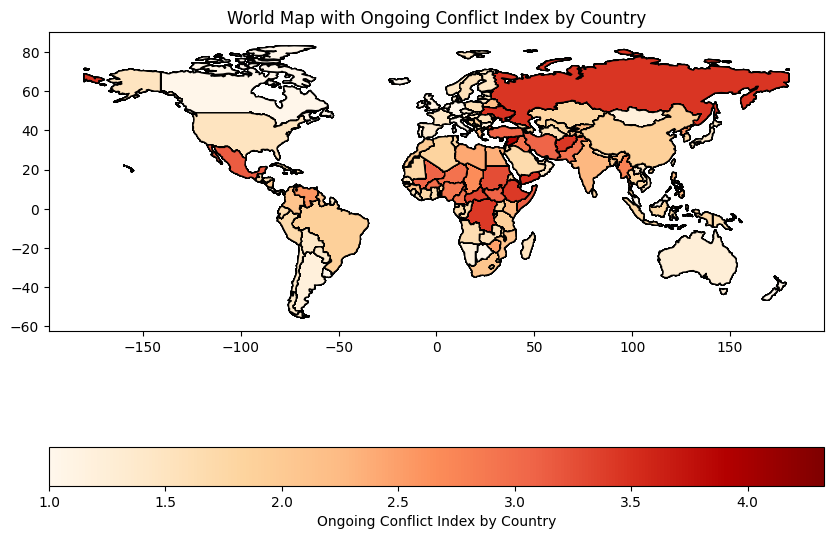

In [44]:
# 绘制属性地图
fig, ax = plt.subplots(figsize=(10, 10))
# 添加网格线

peace.plot(column='Ongoing Conflict', ax=ax, legend=True,
            legend_kwds={'label': "Ongoing Conflict Index by Country",
                         'orientation': "horizontal"},
            cmap='OrRd', edgecolor='black')

# 设置图形标题
plt.title('World Map with Ongoing Conflict Index by Country')
plt.show()

从OCI指数地图来看，处于战争或危险状态中的国家主要集中在非洲，东欧和西亚附近，且由于数据的完整性原则，我们选取欧洲、亚洲、非洲三大洲的国家作为我们研究对象

In [45]:
# prompt: 查看data中各列na值数量并将存在na值的列筛选出
merge2.fillna(0,inplace=True)
# Check for missing values in each column
missing_values = merge2.isnull().sum()

# Print the number of missing values in each column
print(missing_values)
merge2.fillna(0,inplace=True)



iso_or                     0
origin                     0
iso_des                    0
destination                0
year                       0
stock                      0
flow                       0
pop_est_x                  0
continent_x                0
name_x                     0
iso_a3_x                   0
gdp_md_est_x               0
geometry_x                 0
Country1                   0
Iso3c1                     0
Year_x                     0
Overall Score_x            0
Ongoing Conflict_x         0
Terrorism Impact_x         0
Violent Crime_x            0
Political Instability_x    0
Police Rate_x              0
Refugees And Idps_x        0
is_battle_x                0
pop_est_y                  0
continent_y                0
name_y                     0
iso_a3_y                   0
gdp_md_est_y               0
geometry_y                 0
Country2                   0
Iso3c2                     0
Year_y                     0
Overall Score_y            0
Ongoing Confli

In [46]:
#data.to_excel('/content/drive/MyDrive/Colab_Notebooks/世界移民数据/cleaned_data.xlsx')

matrix用不了 因为有不同时间

In [47]:
merge2.columns

Index(['iso_or', 'origin', 'iso_des', 'destination', 'year', 'stock', 'flow',
       'pop_est_x', 'continent_x', 'name_x', 'iso_a3_x', 'gdp_md_est_x',
       'geometry_x', 'Country1', 'Iso3c1', 'Year_x', 'Overall Score_x',
       'Ongoing Conflict_x', 'Terrorism Impact_x', 'Violent Crime_x',
       'Political Instability_x', 'Police Rate_x', 'Refugees And Idps_x',
       'is_battle_x', 'pop_est_y', 'continent_y', 'name_y', 'iso_a3_y',
       'gdp_md_est_y', 'geometry_y', 'Country2', 'Iso3c2', 'Year_y',
       'Overall Score_y', 'Ongoing Conflict_y', 'Terrorism Impact_y',
       'Violent Crime_y', 'Political Instability_y', 'Police Rate_y',
       'Refugees And Idps_y', 'is_battle_y', 'Year', 'origincode', 'des_code',
       'dist_pop', 'contig', 'common_lan', 'colonial_link', 'commom_reli',
       'o_pop', 'd_pop', 'o_gdp', 'd_gdp'],
      dtype='object')

In [48]:
merge2

,iso_or,origin,iso_des,destination,year,stock,flow,pop_est_x,continent_x,name_x,...,des_code,dist_pop,contig,common_lan,colonial_link,commom_reli,o_pop,d_pop,o_gdp,d_gdp
0,AFG,Afghanistan,ALB,Albania,2008,0,0.0,38041754.0,Asia,Afghanistan,...,ALB,4274.0,0.0,0.0,0.0,0.204,27032.198,2912.559,1.019053e+07,1.288135e+07
1,ALG,Algeria,ALB,Albania,2008,0,0.0,43053054.0,Africa,Algeria,...,ALB,1528.0,0.0,0.0,0.0,0.203,35725.376,2912.559,1.710002e+08,1.288135e+07
2,ANG,Angola,ALB,Albania,2008,0,0.0,31825295.0,Africa,Angola,...,ALB,5697.0,0.0,0.0,0.0,0.000,18314.442,2912.559,8.417808e+07,1.288135e+07
3,ARG,Argentina,ALB,Albania,2008,0,0.0,44938712.0,South America,Argentina,...,ALB,11632.0,0.0,0.0,0.0,0.000,39676.083,2912.559,4.060037e+08,1.288135e+07
4,ARM,Armenia,ALB,Albania,2008,3,0.0,2957731.0,Asia,Armenia,...,ALB,2082.0,0.0,0.0,0.0,0.000,2977.488,2912.559,1.166204e+07,1.288135e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259960,SEN,Senegal,GAM,The Gambia,2019,129403,4181.0,16296364.0,Africa,Senegal,...,GMB,159.0,1.0,1.0,0.0,0.773,16296.362,2347.696,2.339881e+07,1.813608e+06
259961,SIE,Sierra Leone,GAM,The Gambia,2019,2576,79.0,7813215.0,Africa,Sierra Leone,...,GMB,666.0,0.0,1.0,0.0,0.335,7813.207,2347.696,4.076579e+06,1.813608e+06
259962,PAK,Pakistan,AFG,Afghanistan,2019,146563,0.0,216565318.0,Asia,Pakistan,...,AFG,771.0,1.0,0.0,0.0,0.961,216565.323,38041.756,3.209095e+08,1.879945e+07
259963,TAJ,Tajikistan,AFG,Afghanistan,2019,6268,0.0,9321018.0,Asia,Tajikistan,...,AFG,492.0,1.0,0.0,0.0,0.844,9321.023,38041.756,8.300785e+06,1.879945e+07


In [49]:
data=merge2

In [50]:
# 假设你的 DataFrame 名称是 data
unique_country_codes = data['Iso3c1'].nunique()
print(f"Country Origin Code 中有 {unique_country_codes} 个不同的值")

Country Origin Code 中有 155 个不同的值


As shown abouve, merged dataset includes bilateral migration data from 133 countries.

In [51]:
data.describe()

,stock,flow,pop_est_x,gdp_md_est_x,Overall Score_x,Ongoing Conflict_x,Terrorism Impact_x,Violent Crime_x,Political Instability_x,Police Rate_x,...,Year,dist_pop,contig,common_lan,colonial_link,commom_reli,o_pop,d_pop,o_gdp,d_gdp
count,2.599650e+05,259965.000000,2.599650e+05,2.599650e+05,259965.000000,259965.000000,259965.000000,259965.000000,259965.000000,259965.000000,...,259965.000000,259965.000000,259965.000000,259965.000000,259965.000000,259965.000000,2.599650e+05,2.599650e+05,2.599650e+05,2.599650e+05
mean,9.739702e+03,377.506487,5.043322e+07,5.739305e+05,2.004605,1.694536,1.952071,2.764606,2.533527,2.581382,...,2013.219533,7129.902760,0.026134,0.114646,0.007824,0.161080,4.723614e+04,4.631624e+04,4.835528e+08,4.912341e+08
std,1.163164e+05,5253.539403,1.643426e+08,2.201774e+06,0.425184,0.568265,1.050604,1.170027,1.012708,0.868884,...,3.296967,4191.905292,0.159535,0.318595,0.088108,0.247164,1.565166e+05,1.526505e+05,1.751514e+09,1.749420e+09
min,0.000000e+00,0.000000,3.613130e+05,1.339000e+03,1.093000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2008.000000,55.000000,0.000000,0.000000,0.000000,0.000000,3.174140e+02,3.174140e+02,6.940000e+05,6.940000e+05
25%,0.000000e+00,0.000000,5.047561e+06,1.645800e+04,1.727000,1.279308,1.000000,2.000000,1.750000,1.965000,...,2010.000000,3860.000000,0.000000,0.000000,0.000000,0.005000,4.665926e+03,4.669685e+03,1.323084e+07,1.317631e+07
50%,5.000000e+00,0.000000,1.148406e+07,6.075200e+04,1.973000,1.558615,1.574000,3.000000,2.625000,2.500000,...,2013.000000,6585.000000,0.000000,0.000000,0.000000,0.036000,1.082701e+04,1.074674e+04,4.819722e+07,5.000435e+07
75%,2.970000e+02,4.000000,3.797087e+07,3.030920e+05,2.208000,2.020559,2.716000,3.500000,3.250000,3.110000,...,2016.000000,9973.000000,0.000000,0.000000,0.000000,0.203000,3.465603e+04,3.431808e+04,2.628319e+08,2.737324e+08
max,1.223939e+07,618795.000000,1.397715e+09,2.143323e+07,3.538000,4.327697,5.000000,5.000000,5.000000,5.000000,...,2019.000000,19679.000000,1.000000,1.000000,1.000000,0.996000,1.407745e+06,1.407745e+06,2.137257e+10,2.137257e+10


data exploration

In [52]:
# Count the number of zero values in 'flow' column
zero_count = (data['flow'] == 0).sum()

zero_count

176693

zero data counts 128342 in 192294 rows, which means 66% data are zero.Then I should do basic data exploration.Firstly，data1 including 0

In [53]:
# Add a new column 'is_mig'
data['is_mig'] = 0

# Update 'is_mig' where 'flow' is less than 5
data.loc[data['flow'] < 5, 'is_mig'] = 1

# Display the updated DataFrame
data

,iso_or,origin,iso_des,destination,year,stock,flow,pop_est_x,continent_x,name_x,...,dist_pop,contig,common_lan,colonial_link,commom_reli,o_pop,d_pop,o_gdp,d_gdp,is_mig
0,AFG,Afghanistan,ALB,Albania,2008,0,0.0,38041754.0,Asia,Afghanistan,...,4274.0,0.0,0.0,0.0,0.204,27032.198,2912.559,1.019053e+07,1.288135e+07,1
1,ALG,Algeria,ALB,Albania,2008,0,0.0,43053054.0,Africa,Algeria,...,1528.0,0.0,0.0,0.0,0.203,35725.376,2912.559,1.710002e+08,1.288135e+07,1
2,ANG,Angola,ALB,Albania,2008,0,0.0,31825295.0,Africa,Angola,...,5697.0,0.0,0.0,0.0,0.000,18314.442,2912.559,8.417808e+07,1.288135e+07,1
3,ARG,Argentina,ALB,Albania,2008,0,0.0,44938712.0,South America,Argentina,...,11632.0,0.0,0.0,0.0,0.000,39676.083,2912.559,4.060037e+08,1.288135e+07,1
4,ARM,Armenia,ALB,Albania,2008,3,0.0,2957731.0,Asia,Armenia,...,2082.0,0.0,0.0,0.0,0.000,2977.488,2912.559,1.166204e+07,1.288135e+07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259960,SEN,Senegal,GAM,The Gambia,2019,129403,4181.0,16296364.0,Africa,Senegal,...,159.0,1.0,1.0,0.0,0.773,16296.362,2347.696,2.339881e+07,1.813608e+06,0
259961,SIE,Sierra Leone,GAM,The Gambia,2019,2576,79.0,7813215.0,Africa,Sierra Leone,...,666.0,0.0,1.0,0.0,0.335,7813.207,2347.696,4.076579e+06,1.813608e+06,0
259962,PAK,Pakistan,AFG,Afghanistan,2019,146563,0.0,216565318.0,Asia,Pakistan,...,771.0,1.0,0.0,0.0,0.961,216565.323,38041.756,3.209095e+08,1.879945e+07,1
259963,TAJ,Tajikistan,AFG,Afghanistan,2019,6268,0.0,9321018.0,Asia,Tajikistan,...,492.0,1.0,0.0,0.0,0.844,9321.023,38041.756,8.300785e+06,1.879945e+07,1


In [54]:
data.columns

Index(['iso_or', 'origin', 'iso_des', 'destination', 'year', 'stock', 'flow',
       'pop_est_x', 'continent_x', 'name_x', 'iso_a3_x', 'gdp_md_est_x',
       'geometry_x', 'Country1', 'Iso3c1', 'Year_x', 'Overall Score_x',
       'Ongoing Conflict_x', 'Terrorism Impact_x', 'Violent Crime_x',
       'Political Instability_x', 'Police Rate_x', 'Refugees And Idps_x',
       'is_battle_x', 'pop_est_y', 'continent_y', 'name_y', 'iso_a3_y',
       'gdp_md_est_y', 'geometry_y', 'Country2', 'Iso3c2', 'Year_y',
       'Overall Score_y', 'Ongoing Conflict_y', 'Terrorism Impact_y',
       'Violent Crime_y', 'Political Instability_y', 'Police Rate_y',
       'Refugees And Idps_y', 'is_battle_y', 'Year', 'origincode', 'des_code',
       'dist_pop', 'contig', 'common_lan', 'colonial_link', 'commom_reli',
       'o_pop', 'd_pop', 'o_gdp', 'd_gdp', 'is_mig'],
      dtype='object')

In [55]:
import numpy as np
# 计算'mig_rate'列
##gdp和pop单位均为k
data['mig_rate'] = data['flow']/data['o_pop'] #现在是一万个人口中有的移民的概率
data['mig_rate'] = data['mig_rate'].astype(float)
data['o_gdpp'] = data['o_gdp']/data['o_pop']
data['d_gdpp'] = data['d_gdp']/data['d_pop']
data['gdpp_gap'] = data['d_gdpp']-data['o_gdpp']#gdp is multicolinearary,so use a merging index
data['log_dist']=np.log(data['dist_pop'])
data['network']=data['stock']/data['d_pop']
data.rename(columns={'Iso3c1':'Country Origin Code', 'Iso3c2':'Destination Code'},inplace=True)
data.head()
data1=data[['iso_or', 'origin', 'iso_des', 'destination', 'year', 'stock', 'flow','geometry_x','geometry_y','continent_x','continent_y','Overall Score_x','Overall Score_y','Ongoing Conflict_x', 'Terrorism Impact_x', 'Violent Crime_x',
       'Political Instability_x', 'Police Rate_x', 'Refugees And Idps_x',
       'Ongoing Conflict_y', 'Terrorism Impact_y', 'Violent Crime_y',
       'Political Instability_y', 'Police Rate_y', 'Refugees And Idps_y','log_dist','network','gdpp_gap','contig', 'common_lan',
       'colonial_link', 'commom_reli','mig_rate','is_battle_x','is_battle_y','is_mig']]
data1['year']=data1['year'].astype(int)-2013

data1['log_mig_rate']=np.log(data1['mig_rate']+1)
data1.describe()

<ipython-input-55-00b321836f11>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['year']=data1['year'].astype(int)-2013
<ipython-input-55-00b321836f11>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['log_mig_rate']=np.log(data1['mig_rate']+1)


,year,stock,flow,Overall Score_x,Overall Score_y,Ongoing Conflict_x,Terrorism Impact_x,Violent Crime_x,Political Instability_x,Police Rate_x,...,gdpp_gap,contig,common_lan,colonial_link,commom_reli,mig_rate,is_battle_x,is_battle_y,is_mig,log_mig_rate
count,259965.000000,2.599650e+05,259965.000000,259965.000000,259965.000000,259965.000000,259965.000000,259965.000000,259965.000000,259965.000000,...,259965.000000,259965.000000,259965.000000,259965.000000,259965.000000,259965.000000,259965.000000,259965.000000,259965.000000,259965.000000
mean,0.219533,9.739702e+03,377.506487,2.004605,1.992764,1.694536,1.952071,2.764606,2.533527,2.581382,...,455.948366,0.026134,0.114646,0.007824,0.161080,0.025925,0.061858,0.060073,0.756602,0.013445
std,3.296967,1.163164e+05,5253.539403,0.425184,0.423796,0.568265,1.050604,1.170027,1.012708,0.868884,...,25854.064871,0.159535,0.318595,0.088108,0.247164,0.984017,0.240899,0.237623,0.429134,0.100225
min,-5.000000,0.000000e+00,0.000000,1.093000,1.093000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-100744.779594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.000000,0.000000e+00,0.000000,1.727000,1.717000,1.279308,1.000000,2.000000,1.750000,1.965000,...,-7740.350334,0.000000,0.000000,0.000000,0.005000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,5.000000e+00,0.000000,1.973000,1.966000,1.558615,1.574000,3.000000,2.625000,2.500000,...,60.395520,0.000000,0.000000,0.000000,0.036000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,2.970000e+02,4.000000,2.208000,2.202000,2.020559,2.716000,3.500000,3.250000,3.110000,...,8751.204581,0.000000,0.000000,0.000000,0.203000,0.000228,0.000000,0.000000,1.000000,0.000228
max,6.000000,1.223939e+07,618795.000000,3.538000,3.538000,4.327697,5.000000,5.000000,5.000000,5.000000,...,100592.046894,1.000000,1.000000,1.000000,0.996000,275.907977,1.000000,1.000000,1.000000,5.623685


In [56]:
#data1.rename(columns={'Overall Score_x':'o_overall', 'Overall Score_y':'d_overall'},inplace=True)

In [57]:
data1.columns

Index(['iso_or', 'origin', 'iso_des', 'destination', 'year', 'stock', 'flow',
       'geometry_x', 'geometry_y', 'continent_x', 'continent_y',
       'Overall Score_x', 'Overall Score_y', 'Ongoing Conflict_x',
       'Terrorism Impact_x', 'Violent Crime_x', 'Political Instability_x',
       'Police Rate_x', 'Refugees And Idps_x', 'Ongoing Conflict_y',
       'Terrorism Impact_y', 'Violent Crime_y', 'Political Instability_y',
       'Police Rate_y', 'Refugees And Idps_y', 'log_dist', 'network',
       'gdpp_gap', 'contig', 'common_lan', 'colonial_link', 'commom_reli',
       'mig_rate', 'is_battle_x', 'is_battle_y', 'is_mig', 'log_mig_rate'],
      dtype='object')

In [58]:
data1.rename(columns={
    'Ongoing Conflict_x':'Ongoing_Conflict_x',
    'Ongoing Conflict_y':'Ongoing_Conflict_y',
    'Terrorism Impact_x':'Terrorism_Impact_x',
    'Police Rate_x': 'Police_Rate_x',
    'Terrorism Impact_y':'Terrorism_Impact_y',
    'Violent Crime_x': 'Violent_Crime_x',
    'Political Instability_x': 'Political_Instability_x',
    'Refugees And Idps_x': 'Refugees_And_Idps_x',
    'Overall Score_x': 'Overall_Score_x',
    'Overall Score_y': 'Overall_Score_y',



    'Police Rate_y': 'Police_Rate_y',

    'Violent Crime_y': 'Violent_Crime_y',
    'Political Instability_y': 'Political_Instability_y',
    'Refugees And Idps_y': 'Refugees_And_Idps_y'},inplace=True)


<ipython-input-58-735c57525d99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.rename(columns={


In [59]:
data_world=data1

In [60]:
# prompt: 筛选continent_x和continent_x均在{Europe,Africa,Asia}中的数据

# Filter data where both origin and destination continents are in the specified list
data1 = data1[
    data1['continent_x'].isin(['Europe', 'Africa', 'Asia']) &
    data1['continent_y'].isin(['Europe', 'Africa', 'Asia'])
]

# Display the filtered data
data1

,iso_or,origin,iso_des,destination,year,stock,flow,geometry_x,geometry_y,continent_x,...,gdpp_gap,contig,common_lan,colonial_link,commom_reli,mig_rate,is_battle_x,is_battle_y,is_mig,log_mig_rate
0,AFG,Afghanistan,ALB,Albania,-5,0,0.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Asia,...,4045.715146,0.0,0.0,0.0,0.204,0.000000,1,0,1,0.000000
1,ALG,Algeria,ALB,Albania,-5,0,0.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Africa,...,-363.825565,0.0,0.0,0.0,0.203,0.000000,0,0,1,0.000000
2,ANG,Angola,ALB,Albania,-5,0,0.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Africa,...,-173.575204,0.0,0.0,0.0,0.000,0.000000,0,0,1,0.000000
4,ARM,Armenia,ALB,Albania,-5,3,0.0,"POLYGON ((46.50572 38.77061, 46.14362 38.74120...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Asia,...,505.954570,0.0,0.0,0.0,0.000,0.000000,0,0,1,0.000000
6,AUS,Austria,ALB,Albania,-5,0,0.0,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Europe,...,-46870.479373,0.0,0.0,0.0,0.001,0.000000,0,0,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259960,SEN,Senegal,GAM,The Gambia,6,129403,4181.0,"POLYGON ((-16.71373 13.59496, -17.12611 14.373...","POLYGON ((-16.71373 13.59496, -15.62460 13.623...",Africa,...,-663.324778,1.0,1.0,0.0,0.773,0.256560,0,0,0,0.228378
259961,SIE,Sierra Leone,GAM,The Gambia,6,2576,79.0,"POLYGON ((-13.24655 8.90305, -12.71196 9.34271...","POLYGON ((-16.71373 13.59496, -15.62460 13.623...",Africa,...,250.750752,0.0,1.0,0.0,0.335,0.010111,0,0,0,0.010060
259962,PAK,Pakistan,AFG,Afghanistan,6,146563,0.0,"POLYGON ((77.83745 35.49401, 76.87172 34.65354...","POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Asia,...,-987.634460,1.0,0.0,0.0,0.961,0.000000,0,1,1,0.000000
259963,TAJ,Tajikistan,AFG,Afghanistan,6,6268,0.0,"POLYGON ((67.83000 37.14499, 68.39203 38.15703...","POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Asia,...,-396.365039,1.0,0.0,0.0,0.844,0.000000,0,1,1,0.000000


In [61]:
len(data1[data1['flow']==0])

117964

In [62]:
print(f"起始国共包含{len(data1['iso_or'].unique())}个国家")
print(f"终点国共包含{len(data1['iso_des'].unique())}个国家")

起始国共包含127个国家
终点国共包含126个国家


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
# prompt: 用iqr查看异常值，并去除

Q1 = data1['log_mig_rate'].quantile(0.25)
Q3 = data1['log_mig_rate'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#data1_cleaned = data1[(data1['log_mig_rate'] >= lower_bound) & (data1['log_mig_rate'] <= upper_bound)]


In [65]:
data_err=data1[data1['log_mig_rate']>=5]
data_err

,iso_or,origin,iso_des,destination,year,stock,flow,geometry_x,geometry_y,continent_x,...,gdpp_gap,contig,common_lan,colonial_link,commom_reli,mig_rate,is_battle_x,is_battle_y,is_mig,log_mig_rate
186819,EST,Estonia,FIN,Finland,3,401217,360458.0,"POLYGON ((27.98113 59.47537, 27.98112 59.47537...","POLYGON ((28.59193 69.06478, 28.44594 68.36461...",Europe,...,25515.559648,0.0,0.0,0.0,0.614,273.804179,0,0,0,5.616059
209322,EST,Estonia,FIN,Finland,4,758588,361301.0,"POLYGON ((27.98113 59.47537, 27.98112 59.47537...","POLYGON ((28.59193 69.06478, 28.44594 68.36461...",Europe,...,25974.371101,0.0,0.0,0.0,0.614,274.256405,0,0,0,5.617703
231925,EST,Estonia,FIN,Finland,5,1115851,364744.0,"POLYGON ((27.98113 59.47537, 27.98112 59.47537...","POLYGON ((28.59193 69.06478, 28.44594 68.36461...",Europe,...,26925.347029,0.0,0.0,0.0,0.614,275.907977,0,0,0,5.623685


In [66]:
# 获取需要删除的索引
indexes_to_drop = data_err.index

# 从 data1 中删除这些索引
data1 = data1.drop(indexes_to_drop)

# 查看过滤后的数据形状
print(data1.shape)

(172675, 37)


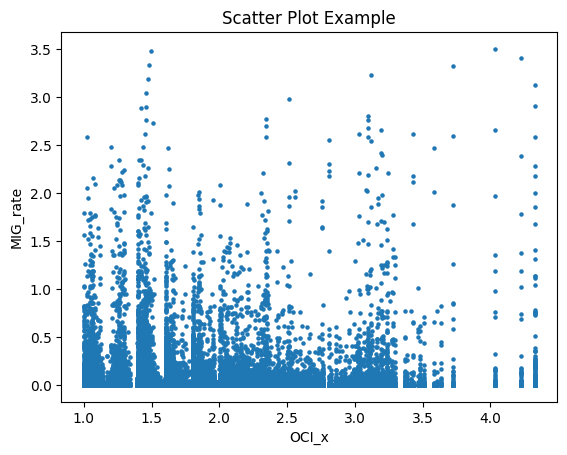

In [67]:
x=data1['Ongoing_Conflict_x']
y=data1['log_mig_rate']
# 创建散点图
plt.scatter(x, y,s=5)

# 添加标题和标签
plt.title("Scatter Plot Example")
plt.xlabel("OCI_x")
plt.ylabel("MIG_rate")



data1.shape
# 显示图表
plt.show()

数据根本就是破碎的

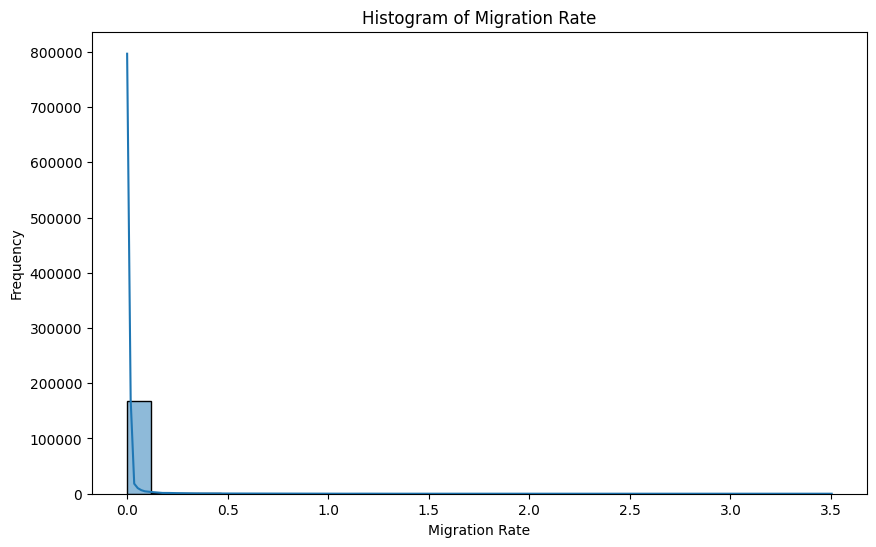

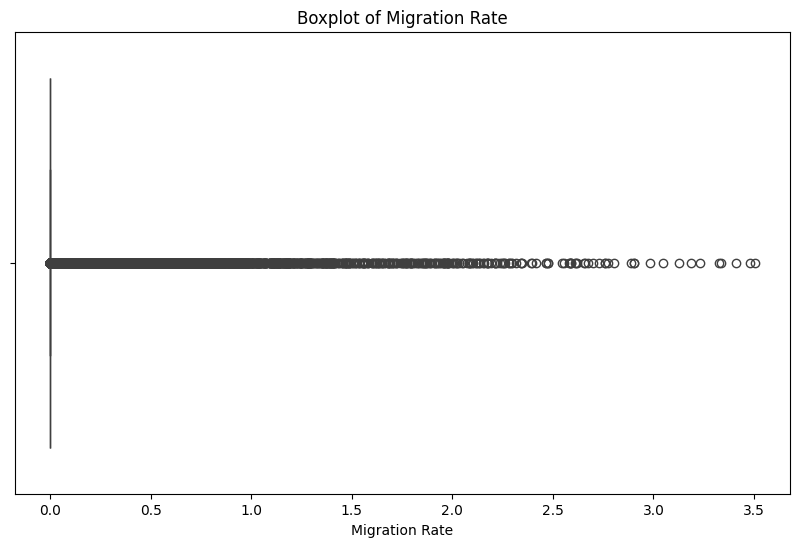

<ipython-input-68-df1c76f5d8c4>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data1['log_mig_rate'], shade=True)


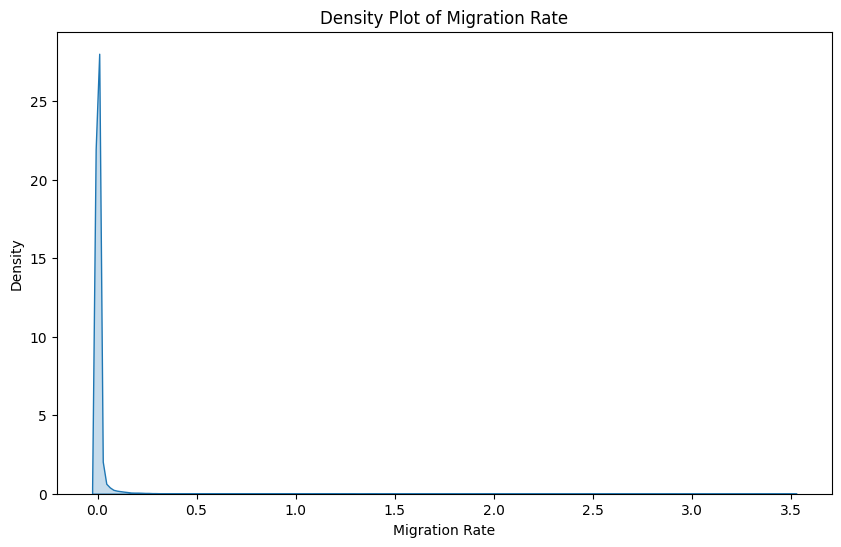

In [68]:
# 绘制直方图
plt.figure(figsize=(10, 6))
sns.histplot(data1['log_mig_rate'], bins=30, kde=True)
plt.title('Histogram of Migration Rate')
plt.xlabel('Migration Rate')
plt.ylabel('Frequency')
plt.show()

# 绘制箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x=data1['log_mig_rate'])
plt.title('Boxplot of Migration Rate')
plt.xlabel('Migration Rate')
plt.show()

# 绘制密度图
plt.figure(figsize=(10, 6))
sns.kdeplot(data1['log_mig_rate'], shade=True)
plt.title('Density Plot of Migration Rate')
plt.xlabel('Migration Rate')
plt.ylabel('Density')
plt.show()

In [69]:
data1.columns

Index(['iso_or', 'origin', 'iso_des', 'destination', 'year', 'stock', 'flow',
       'geometry_x', 'geometry_y', 'continent_x', 'continent_y',
       'Overall_Score_x', 'Overall_Score_y', 'Ongoing_Conflict_x',
       'Terrorism_Impact_x', 'Violent_Crime_x', 'Political_Instability_x',
       'Police_Rate_x', 'Refugees_And_Idps_x', 'Ongoing_Conflict_y',
       'Terrorism_Impact_y', 'Violent_Crime_y', 'Political_Instability_y',
       'Police_Rate_y', 'Refugees_And_Idps_y', 'log_dist', 'network',
       'gdpp_gap', 'contig', 'common_lan', 'colonial_link', 'commom_reli',
       'mig_rate', 'is_battle_x', 'is_battle_y', 'is_mig', 'log_mig_rate'],
      dtype='object')

In [70]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
# 假设 data21 是你的数据框
# 选择要标准化的数值列
numeric_columns = [ 'log_dist','network','gdpp_gap']
data2=data1
# 初始化 RobustScaler
scaler = StandardScaler()


# 对数值列进行标准化
data2[numeric_columns] = scaler.fit_transform(data2[numeric_columns])




In [71]:
data2.describe()

,year,stock,flow,Overall_Score_x,Overall_Score_y,Ongoing_Conflict_x,Terrorism_Impact_x,Violent_Crime_x,Political_Instability_x,Police_Rate_x,...,gdpp_gap,contig,common_lan,colonial_link,commom_reli,mig_rate,is_battle_x,is_battle_y,is_mig,log_mig_rate
count,172675.000000,1.726750e+05,172675.000000,172675.000000,172675.000000,172675.000000,172675.000000,172675.000000,172675.000000,172675.000000,...,1.726750e+05,172675.000000,172675.000000,172675.000000,172675.000000,172675.000000,172675.000000,172675.000000,172675.000000,172675.000000
mean,0.224254,9.734396e+03,399.138642,2.015402,2.000612,1.743828,2.015602,2.649317,2.621899,2.586726,...,-3.538826e-18,0.034608,0.108192,0.011084,0.147405,0.024556,0.075911,0.073786,0.747543,0.014341
std,3.298406,9.135791e+04,5354.097991,0.447537,0.446252,0.590146,1.089786,1.087279,1.026459,0.887458,...,1.000003e+00,0.182786,0.310623,0.104698,0.240145,0.335378,0.264857,0.261423,0.434423,0.101870
min,-5.000000,0.000000e+00,0.000000,1.093000,1.093000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-3.813477e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.000000,0.000000e+00,0.000000,1.718000,1.706000,1.402576,1.000000,2.000000,1.750000,1.821000,...,-3.060825e-01,0.000000,0.000000,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,6.000000e+00,0.000000,1.966000,1.949000,1.603865,1.662400,3.000000,2.750000,2.500000,...,-1.905969e-02,0.000000,0.000000,0.000000,0.029000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,3.680000e+02,5.000000,2.248000,2.227000,2.093280,2.818400,3.000000,3.250000,3.212000,...,3.197458e-01,0.000000,0.000000,0.000000,0.169000,0.000277,0.000000,0.000000,1.000000,0.000277
max,6.000000,3.698393e+06,618795.000000,3.538000,3.538000,4.327697,5.000000,5.000000,5.000000,5.000000,...,3.765843e+00,1.000000,1.000000,1.000000,0.996000,32.223719,1.000000,1.000000,1.000000,3.503264


In [72]:
# 计算平移的值，保证最小值大于0
min_value = data2[numeric_columns].min().min()
if min_value < 0:
    shift_value = -min_value
    for col in numeric_columns:
        data2[col] = data2[col] + shift_value
data2.describe()

,year,stock,flow,Overall_Score_x,Overall_Score_y,Ongoing_Conflict_x,Terrorism_Impact_x,Violent_Crime_x,Political_Instability_x,Police_Rate_x,...,gdpp_gap,contig,common_lan,colonial_link,commom_reli,mig_rate,is_battle_x,is_battle_y,is_mig,log_mig_rate
count,172675.000000,1.726750e+05,172675.000000,172675.000000,172675.000000,172675.000000,172675.000000,172675.000000,172675.000000,172675.000000,...,172675.000000,172675.000000,172675.000000,172675.000000,172675.000000,172675.000000,172675.000000,172675.000000,172675.000000,172675.000000
mean,0.224254,9.734396e+03,399.138642,2.015402,2.000612,1.743828,2.015602,2.649317,2.621899,2.586726,...,5.887148,0.034608,0.108192,0.011084,0.147405,0.024556,0.075911,0.073786,0.747543,0.014341
std,3.298406,9.135791e+04,5354.097991,0.447537,0.446252,0.590146,1.089786,1.087279,1.026459,0.887458,...,1.000003,0.182786,0.310623,0.104698,0.240145,0.335378,0.264857,0.261423,0.434423,0.101870
min,-5.000000,0.000000e+00,0.000000,1.093000,1.093000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.073671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.000000,0.000000e+00,0.000000,1.718000,1.706000,1.402576,1.000000,2.000000,1.750000,1.821000,...,5.581065,0.000000,0.000000,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,6.000000e+00,0.000000,1.966000,1.949000,1.603865,1.662400,3.000000,2.750000,2.500000,...,5.868088,0.000000,0.000000,0.000000,0.029000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,3.680000e+02,5.000000,2.248000,2.227000,2.093280,2.818400,3.000000,3.250000,3.212000,...,6.206894,0.000000,0.000000,0.000000,0.169000,0.000277,0.000000,0.000000,1.000000,0.000277
max,6.000000,3.698393e+06,618795.000000,3.538000,3.538000,4.327697,5.000000,5.000000,5.000000,5.000000,...,9.652991,1.000000,1.000000,1.000000,0.996000,32.223719,1.000000,1.000000,1.000000,3.503264


排除多重共线性

In [73]:
data2.columns

Index(['iso_or', 'origin', 'iso_des', 'destination', 'year', 'stock', 'flow',
       'geometry_x', 'geometry_y', 'continent_x', 'continent_y',
       'Overall_Score_x', 'Overall_Score_y', 'Ongoing_Conflict_x',
       'Terrorism_Impact_x', 'Violent_Crime_x', 'Political_Instability_x',
       'Police_Rate_x', 'Refugees_And_Idps_x', 'Ongoing_Conflict_y',
       'Terrorism_Impact_y', 'Violent_Crime_y', 'Political_Instability_y',
       'Police_Rate_y', 'Refugees_And_Idps_y', 'log_dist', 'network',
       'gdpp_gap', 'contig', 'common_lan', 'colonial_link', 'commom_reli',
       'mig_rate', 'is_battle_x', 'is_battle_y', 'is_mig', 'log_mig_rate'],
      dtype='object')

In [74]:
# 选择特定的列
selected_columns = [
       'Overall_Score_x',  'Overall_Score_y',
       'Ongoing_Conflict_x', 'Terrorism_Impact_x', 'Violent_Crime_x',
       'Political_Instability_x', 'Police_Rate_x', 'Refugees_And_Idps_x',
       'Ongoing_Conflict_y', 'Terrorism_Impact_y', 'Violent_Crime_y',
       'Political_Instability_y', 'Police_Rate_y', 'Refugees_And_Idps_y',
       'log_dist', 'network', 'gdpp_gap','contig', 'common_lan', 'colonial_link', 'commom_reli', 'mig_rate','is_battle_x','is_battle_y']  # 替换为实际的列名
correlation_matrix_selected = data2[selected_columns].corr()

# 显示特定列的相关系数矩阵
print(correlation_matrix_selected)

                         Overall_Score_x  Overall_Score_y  Ongoing_Conflict_x  \
Overall_Score_x                 1.000000        -0.000449            0.902922   
Overall_Score_y                -0.000449         1.000000           -0.000805   
Ongoing_Conflict_x              0.902922        -0.000805            1.000000   
Terrorism_Impact_x              0.685177         0.003978            0.725551   
Violent_Crime_x                 0.690735        -0.000906            0.580103   
Political_Instability_x         0.751625        -0.000087            0.676250   
Police_Rate_x                   0.092598        -0.004063           -0.056165   
Refugees_And_Idps_x             0.548366        -0.002515            0.536652   
Ongoing_Conflict_y              0.002172         0.901184            0.004082   
Terrorism_Impact_y              0.002424         0.683161            0.005525   
Violent_Crime_y                -0.004131         0.699652           -0.005710   
Political_Instability_y     

检查VIF

In [75]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 选择用于计算VIF的变量
variables = [

       'Ongoing_Conflict_x',
       'Political_Instability_x', 'Police_Rate_x', 'Refugees_And_Idps_x',
       'Ongoing_Conflict_y',
       'Political_Instability_y', 'Police_Rate_y', 'Refugees_And_Idps_y',
       'log_dist', 'network', 'gdpp_gap','contig', 'common_lan', 'colonial_link', 'commom_reli','is_battle_x','is_battle_y','is_mig'
]

# 提取用于计算VIF的变量数据
X = data2[variables]

# 添加常数项
X = sm.add_constant(X)

# 计算VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# 将VIF值四舍五入并格式化为小数
vif_data["VIF"] = vif_data["VIF"].round(2)
# 输出VIF结果
vif_data

,feature,VIF
0,const,193.00
1,Ongoing_Conflict_x,2.73
2,Political_Instability_x,2.20
3,Police_Rate_x,1.04
4,Refugees_And_Idps_x,1.52
5,Ongoing_Conflict_y,2.71
6,Political_Instability_y,2.28
7,Police_Rate_y,1.04
8,Refugees_And_Idps_y,1.50
9,log_dist,1.41


divide overall index and detailed index

未发现指标之间有强共线性，VIF值平均在1-3之间，小于10。

开始拟合模型

In [76]:
data1

,iso_or,origin,iso_des,destination,year,stock,flow,geometry_x,geometry_y,continent_x,...,gdpp_gap,contig,common_lan,colonial_link,commom_reli,mig_rate,is_battle_x,is_battle_y,is_mig,log_mig_rate
0,AFG,Afghanistan,ALB,Albania,-5,0,0.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Asia,...,6.018507,0.0,0.0,0.0,0.204,0.000000,1,0,1,0.000000
1,ALG,Algeria,ALB,Albania,-5,0,0.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Africa,...,5.852510,0.0,0.0,0.0,0.203,0.000000,0,0,1,0.000000
2,ANG,Angola,ALB,Albania,-5,0,0.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Africa,...,5.859672,0.0,0.0,0.0,0.000,0.000000,0,0,1,0.000000
4,ARM,Armenia,ALB,Albania,-5,3,0.0,"POLYGON ((46.50572 38.77061, 46.14362 38.74120...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Asia,...,5.885253,0.0,0.0,0.0,0.000,0.000000,0,0,1,0.000000
6,AUS,Austria,ALB,Albania,-5,0,0.0,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Europe,...,4.101768,0.0,0.0,0.0,0.001,0.000000,0,0,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259960,SEN,Senegal,GAM,The Gambia,6,129403,4181.0,"POLYGON ((-16.71373 13.59496, -17.12611 14.373...","POLYGON ((-16.71373 13.59496, -15.62460 13.623...",Africa,...,5.841235,1.0,1.0,0.0,0.773,0.256560,0,0,0,0.228378
259961,SIE,Sierra Leone,GAM,The Gambia,6,2576,79.0,"POLYGON ((-13.24655 8.90305, -12.71196 9.34271...","POLYGON ((-16.71373 13.59496, -15.62460 13.623...",Africa,...,5.875645,0.0,1.0,0.0,0.335,0.010111,0,0,0,0.010060
259962,PAK,Pakistan,AFG,Afghanistan,6,146563,0.0,"POLYGON ((77.83745 35.49401, 76.87172 34.65354...","POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Asia,...,5.829026,1.0,0.0,0.0,0.961,0.000000,0,1,1,0.000000
259963,TAJ,Tajikistan,AFG,Afghanistan,6,6268,0.0,"POLYGON ((67.83000 37.14499, 68.39203 38.15703...","POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Asia,...,5.851285,1.0,0.0,0.0,0.844,0.000000,0,1,1,0.000000


mean oflog_mig_rate: 0.01434110186047506
variance of log_mig_rate: 0.010377461519778836


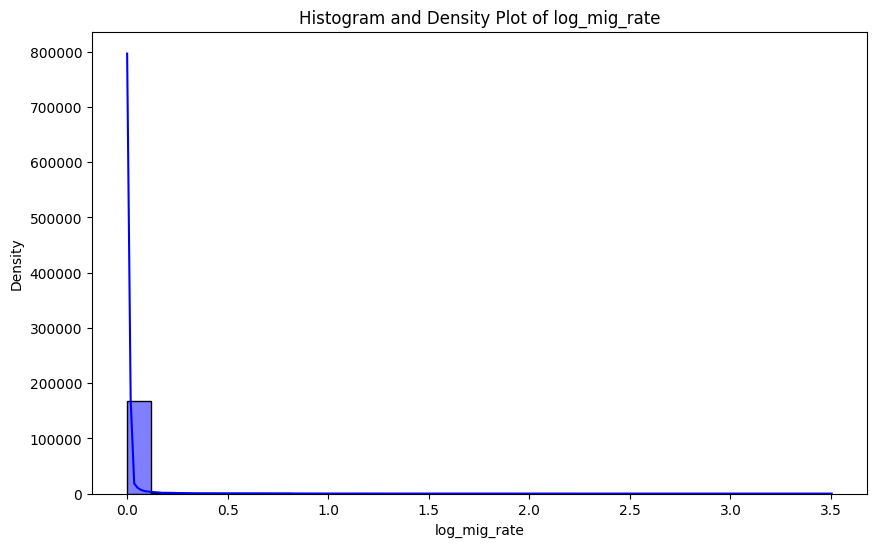

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
log_mig_rate = data1['log_mig_rate']

# 1. 检查数据的均值和方差
mean_log_mig_rate = np.mean(log_mig_rate)
var_log_mig_rate = np.var(log_mig_rate)
print(f"mean oflog_mig_rate: {mean_log_mig_rate}")
print(f"variance of log_mig_rate: {var_log_mig_rate}")


# 2. 绘制直方图和密度图
plt.figure(figsize=(10, 6))
sns.histplot(log_mig_rate, bins=30, kde=True, color='blue')
plt.title('Histogram and Density Plot of log_mig_rate')
plt.xlabel('log_mig_rate')
plt.ylabel('Density')
plt.show()



和平指标越高，越不安全，所以正常来说应该是起始地正相关，终点负相关

如何判断非线性，记得之前literature有提到，查查看

In [78]:
data2.columns

Index(['iso_or', 'origin', 'iso_des', 'destination', 'year', 'stock', 'flow',
       'geometry_x', 'geometry_y', 'continent_x', 'continent_y',
       'Overall_Score_x', 'Overall_Score_y', 'Ongoing_Conflict_x',
       'Terrorism_Impact_x', 'Violent_Crime_x', 'Political_Instability_x',
       'Police_Rate_x', 'Refugees_And_Idps_x', 'Ongoing_Conflict_y',
       'Terrorism_Impact_y', 'Violent_Crime_y', 'Political_Instability_y',
       'Police_Rate_y', 'Refugees_And_Idps_y', 'log_dist', 'network',
       'gdpp_gap', 'contig', 'common_lan', 'colonial_link', 'commom_reli',
       'mig_rate', 'is_battle_x', 'is_battle_y', 'is_mig', 'log_mig_rate'],
      dtype='object')

In [79]:
# prompt: data3为data2去除flow为0的数据
data3=data2
data3['log_mig_rate'] = data3['log_mig_rate'] + 0.0001
data3

,iso_or,origin,iso_des,destination,year,stock,flow,geometry_x,geometry_y,continent_x,...,gdpp_gap,contig,common_lan,colonial_link,commom_reli,mig_rate,is_battle_x,is_battle_y,is_mig,log_mig_rate
0,AFG,Afghanistan,ALB,Albania,-5,0,0.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Asia,...,6.018507,0.0,0.0,0.0,0.204,0.000000,1,0,1,0.000100
1,ALG,Algeria,ALB,Albania,-5,0,0.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Africa,...,5.852510,0.0,0.0,0.0,0.203,0.000000,0,0,1,0.000100
2,ANG,Angola,ALB,Albania,-5,0,0.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Africa,...,5.859672,0.0,0.0,0.0,0.000,0.000000,0,0,1,0.000100
4,ARM,Armenia,ALB,Albania,-5,3,0.0,"POLYGON ((46.50572 38.77061, 46.14362 38.74120...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Asia,...,5.885253,0.0,0.0,0.0,0.000,0.000000,0,0,1,0.000100
6,AUS,Austria,ALB,Albania,-5,0,0.0,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Europe,...,4.101768,0.0,0.0,0.0,0.001,0.000000,0,0,1,0.000100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259960,SEN,Senegal,GAM,The Gambia,6,129403,4181.0,"POLYGON ((-16.71373 13.59496, -17.12611 14.373...","POLYGON ((-16.71373 13.59496, -15.62460 13.623...",Africa,...,5.841235,1.0,1.0,0.0,0.773,0.256560,0,0,0,0.228478
259961,SIE,Sierra Leone,GAM,The Gambia,6,2576,79.0,"POLYGON ((-13.24655 8.90305, -12.71196 9.34271...","POLYGON ((-16.71373 13.59496, -15.62460 13.623...",Africa,...,5.875645,0.0,1.0,0.0,0.335,0.010111,0,0,0,0.010160
259962,PAK,Pakistan,AFG,Afghanistan,6,146563,0.0,"POLYGON ((77.83745 35.49401, 76.87172 34.65354...","POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Asia,...,5.829026,1.0,0.0,0.0,0.961,0.000000,0,1,1,0.000100
259963,TAJ,Tajikistan,AFG,Afghanistan,6,6268,0.0,"POLYGON ((67.83000 37.14499, 68.39203 38.15703...","POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Asia,...,5.851285,1.0,0.0,0.0,0.844,0.000000,0,1,1,0.000100


**ols**

In [80]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# 构建PPML模型公式
formula = ('log_mig_rate ~Ongoing_Conflict_x+Ongoing_Conflict_y+'
       'gdpp_gap+log_dist+'
       'contig+common_lan+'
       'colonial_link+commom_reli+network+year+is_mig '
)


# 拟合Poisson Pseudo-Maximum Likelihood (PPML)模型
ols_model = smf.ols(formula, data=data3).fit()

# 输出模型结果
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_mig_rate   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     2389.
Date:                Wed, 21 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:37:27   Log-Likelihood:             1.6162e+05
No. Observations:              172675   AIC:                        -3.232e+05
Df Residuals:                  172663   BIC:                        -3.231e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0069      0.003     -2.513      0.012      -0.012      -0.002
Ongoing_Conflict_x     0.0002      0.000      0.385      0.700      -0.001       0.001
Ongoing_Conflict_y    -0.0001      0.000     -0.325      0.745      -0.001       0.001
gdpp_gap               0.0031      0.000     11.921      0.000       0.003       0.004
log_dist              -0.0097      0.000    -36.367      0.000      -0.010      -0.009
contig                 0.0817      0.001     58.010      0.000       0.079       0.084
common_lan            -0.0018      0.001     -2.369      0.018      -0.003      -0.000
colonial_link          0.0730      0.002     32.780      0.000       0.069       0.077
commom_reli           -0.0034      0.001     -3.389      0.001      -0.005      -0.001
network                0.0142      0.000     60.607      0.000       0.014       0.015
year                9.841e-05   6.99e-05      1.408      0.159   -3.85e-05       0.000
is_mig                -0.0358      0.001    -61.026      0.000      -0.037      -0.035
==============================================================================
Omnibus:                   317012.841   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        551194854.792
Skew:                          13.749   Prob(JB):                         0.00
Kurtosis:                     278.416   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**GLM Gamma**

**ZeroInflatedPoisson**

In [81]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.discrete.count_model import ZeroInflatedPoisson

# 构建公式
formula = ('log_mig_rate ~ Ongoing_Conflict_x + Ongoing_Conflict_y + '
           'gdpp_gap + log_dist + is_battle_x + is_battle_y + '
           'contig + common_lan + colonial_link + commom_reli + '
           'network + year + is_mig')

# 使用零膨胀泊松回归模型
zip_model = ZeroInflatedPoisson.from_formula(formula, data=data2).fit()

# 输出模型结果
print(zip_model.summary())

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)


         Current function value: 0.046309
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:            log_mig_rate   No. Observations:               172675
Model:             ZeroInflatedPoisson   Df Residuals:                   172661
Method:                            MLE   Df Model:                           13
Date:                 Wed, 21 Aug 2024   Pseudo R-squ.:                  0.3656
Time:                         16:37:44   Log-Likelihood:                -7996.4
converged:                       False   LL-Null:                       -12605.
Covariance Type:             nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
inflate_const        -20.4954     67.907     -0.302      0.763    -153.591     112.600
Intercept             -4.1305      0.206    -20.035      0.000      -4.535      -3.726
Ongoing_Conf

In [82]:
data4=data2
data4

,iso_or,origin,iso_des,destination,year,stock,flow,geometry_x,geometry_y,continent_x,...,gdpp_gap,contig,common_lan,colonial_link,commom_reli,mig_rate,is_battle_x,is_battle_y,is_mig,log_mig_rate
0,AFG,Afghanistan,ALB,Albania,-5,0,0.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Asia,...,6.018507,0.0,0.0,0.0,0.204,0.000000,1,0,1,0.000100
1,ALG,Algeria,ALB,Albania,-5,0,0.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Africa,...,5.852510,0.0,0.0,0.0,0.203,0.000000,0,0,1,0.000100
2,ANG,Angola,ALB,Albania,-5,0,0.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Africa,...,5.859672,0.0,0.0,0.0,0.000,0.000000,0,0,1,0.000100
4,ARM,Armenia,ALB,Albania,-5,3,0.0,"POLYGON ((46.50572 38.77061, 46.14362 38.74120...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Asia,...,5.885253,0.0,0.0,0.0,0.000,0.000000,0,0,1,0.000100
6,AUS,Austria,ALB,Albania,-5,0,0.0,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Europe,...,4.101768,0.0,0.0,0.0,0.001,0.000000,0,0,1,0.000100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259960,SEN,Senegal,GAM,The Gambia,6,129403,4181.0,"POLYGON ((-16.71373 13.59496, -17.12611 14.373...","POLYGON ((-16.71373 13.59496, -15.62460 13.623...",Africa,...,5.841235,1.0,1.0,0.0,0.773,0.256560,0,0,0,0.228478
259961,SIE,Sierra Leone,GAM,The Gambia,6,2576,79.0,"POLYGON ((-13.24655 8.90305, -12.71196 9.34271...","POLYGON ((-16.71373 13.59496, -15.62460 13.623...",Africa,...,5.875645,0.0,1.0,0.0,0.335,0.010111,0,0,0,0.010160
259962,PAK,Pakistan,AFG,Afghanistan,6,146563,0.0,"POLYGON ((77.83745 35.49401, 76.87172 34.65354...","POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Asia,...,5.829026,1.0,0.0,0.0,0.961,0.000000,0,1,1,0.000100
259963,TAJ,Tajikistan,AFG,Afghanistan,6,6268,0.0,"POLYGON ((67.83000 37.14499, 68.39203 38.15703...","POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Asia,...,5.851285,1.0,0.0,0.0,0.844,0.000000,0,1,1,0.000100


In [83]:
data4.describe().to_csv('/content/drive/MyDrive/Colab_Notebooks/世界移民数据/description.csv')

In [84]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 构建PPML模型公式
formula = ('log_mig_rate ~Ongoing_Conflict_x+Ongoing_Conflict_y+'
       'gdpp_gap+log_dist+'
       'contig+common_lan+'
       'colonial_link+commom_reli+network+year+is_mig'
)


# 拟合Poisson Pseudo-Maximum Likelihood (PPML)模型
ppml_model_all = smf.poisson(formula, data=data4).fit(maxiter=2000)

# 输出模型结果
ppml_model_all.summary()

Optimization terminated successfully.
         Current function value: 0.046100
         Iterations 54


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:           log_mig_rate   No. Observations:               172675
Model:                        Poisson   Df Residuals:                   172663
Method:                           MLE   Df Model:                           11
Date:                Wed, 21 Aug 2024   Pseudo R-squ.:                  0.3685
Time:                        16:37:48   Log-Likelihood:                -7960.3
converged:                       True   LL-Null:                       -12605.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.5198      0.193    -18.277      0.000      -3.897      -3.142
Ongoing_Conflict_x     0.1704      0.033      5.181      0.000       0.106       0.235
Ongoing_Conflict_y     0.1408      0.044      3.189      0.001       0.054       0.227
gdpp_gap               0.3646      0.024     15.028      0.000       0.317       0.412
log_dist              -0.5673      0.018    -30.711      0.000      -0.603      -0.531
contig                 0.7097      0.057     12.412      0.000       0.598       0.822
common_lan            -0.0952      0.050     -1.895      0.058      -0.194       0.003
colonial_link          1.5405      0.073     21.115      0.000       1.398       1.683
commom_reli            0.1220      0.076      1.594      0.111      -0.028       0.272
network                0.0480      0.004     12.797      0.000       0.041       0.055
year                   0.0016      0.006      0.266      0.791      -0.010       0.013
is_mig                -5.1776      0.241    -21.471      0.000      -5.650      -4.705
======================================================================================
"""

In [85]:


# Create a DataFrame to store the results
results = pd.DataFrame({
    'Estimator': ['OLS', 'Zero Inflated Poisson', 'PPML'],
    'AIC': [ols_model.aic,zip_model.aic, ppml_model_all.aic],
    'BIC': [ols_model.bic,  zip_model.bic, ppml_model_all.bic],
    'Log-Likelihood': [ols_model.llf, zip_model.llf, ppml_model_all.llf],
    'Pseudo-R2': [
        ols_model.rsquared,

        zip_model.prsquared if hasattr(zip_model, 'prsquared') else 'N/A',
        ppml_model_all.prsquared if hasattr(ppml_model_all, 'prsquared') else 'N/A'
    ]
    # Add other metrics as needed
})

# Display the table
results



,Estimator,AIC,BIC,Log-Likelihood,Pseudo-R2
0,OLS,-323209.477870,-323088.767872,161616.738935,0.132098
1,Zero Inflated Poisson,16022.794683,16173.682180,-7996.397341,0.365593
2,PPML,15944.638685,16065.348682,-7960.319342,0.368455


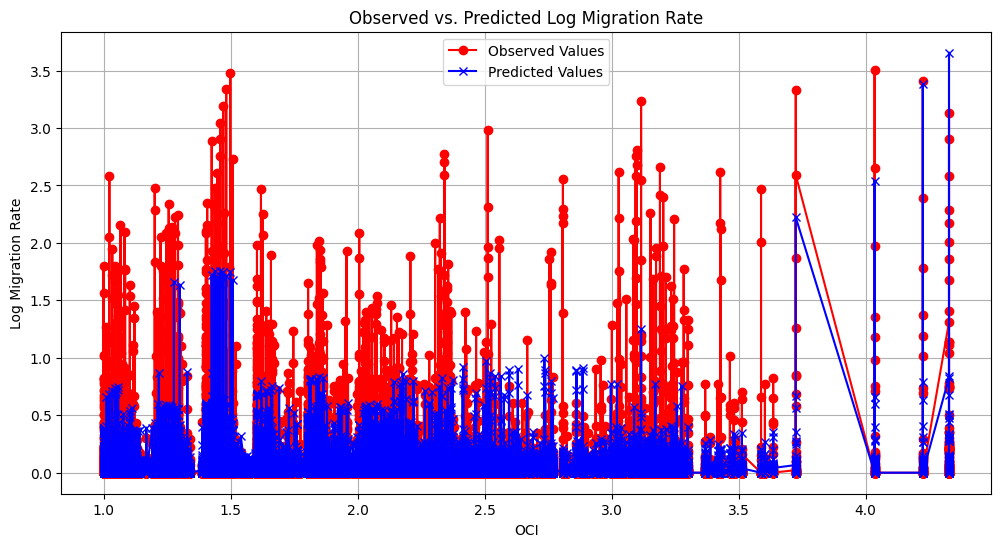

In [86]:


# 假设 data4 数据集中包含 'log_mig_rate' 和 'oci' 列
# 并且 ppml_model_all 是你的预测模型

# 根据 'oci' 列对数据进行排序
data4_sorted = data4.sort_values(by='Ongoing_Conflict_x')

# 获取排序后的预测值
predictions_sorted = ppml_model_all.predict(data4_sorted)

# 模型预测结果可视化
plt.figure(figsize=(12, 6))  # 设置图形大小

# 绘制观察值
plt.plot(data4_sorted['Ongoing_Conflict_x'], data4_sorted['log_mig_rate'], c="r", label="Observed Values", marker='o')

# 绘制预测值
plt.plot(data4_sorted['Ongoing_Conflict_x'], predictions_sorted, c="b", label="Predicted Values", marker='x')

plt.xlabel("OCI")
plt.ylabel("Log Migration Rate")
plt.title("Observed vs. Predicted Log Migration Rate")
plt.legend()
plt.grid(True)  # 添加网格线
plt.show()


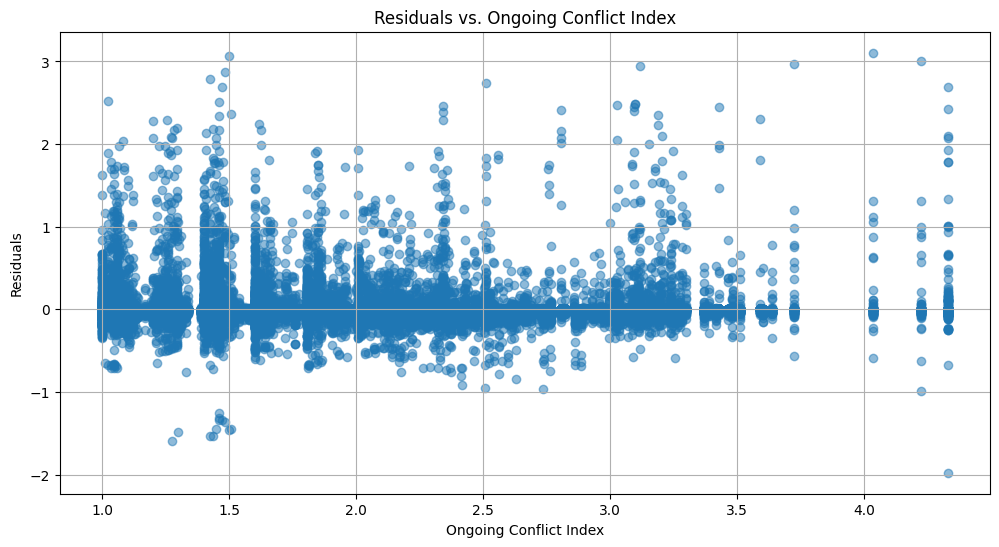

In [87]:
# prompt: 计算data4_sorted的residual之后plot residual和oci

# 计算残差
residuals = data4_sorted['log_mig_rate'] - predictions_sorted

# 创建散点图
plt.figure(figsize=(12, 6))
plt.scatter(data4_sorted['Ongoing_Conflict_x'], residuals, alpha=0.5)

# 添加标题和标签
plt.title('Residuals vs. Ongoing Conflict Index')
plt.xlabel('Ongoing Conflict Index')
plt.ylabel('Residuals')

# 添加网格线
plt.grid(True)

# 显示图形
plt.show()


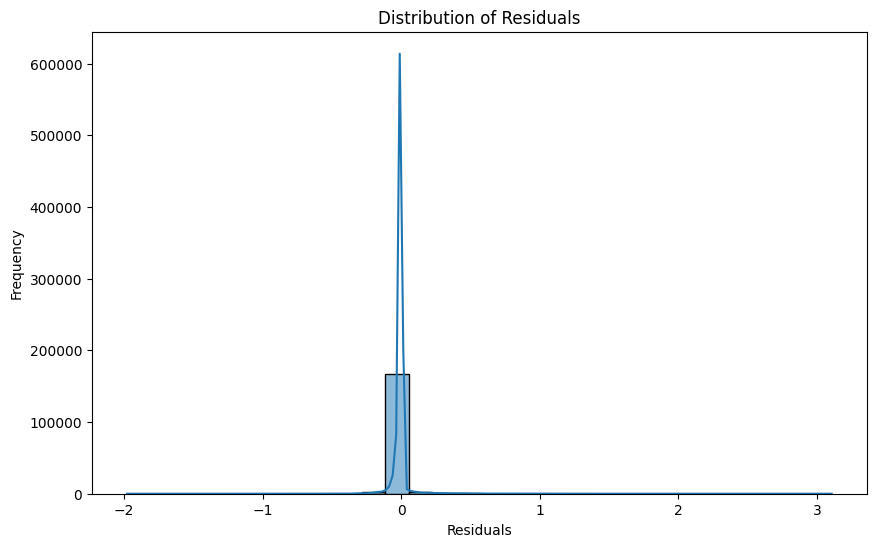

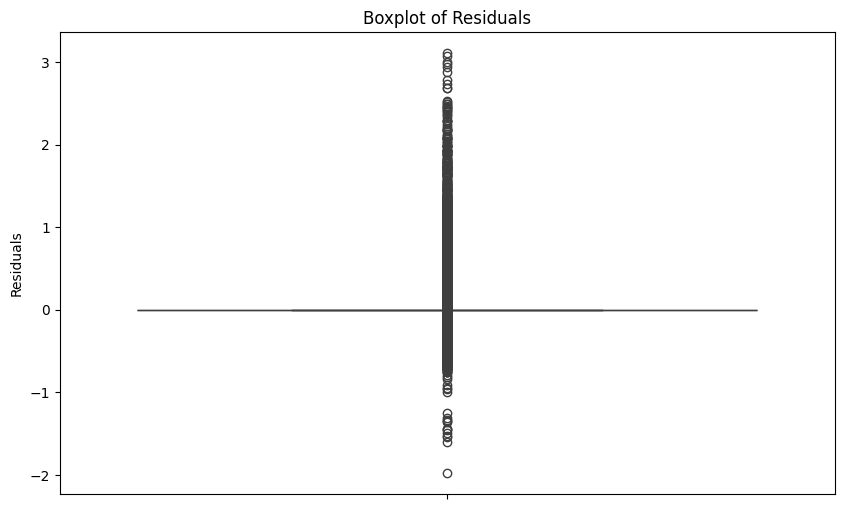

<ipython-input-88-ae0620e96f61>:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True)


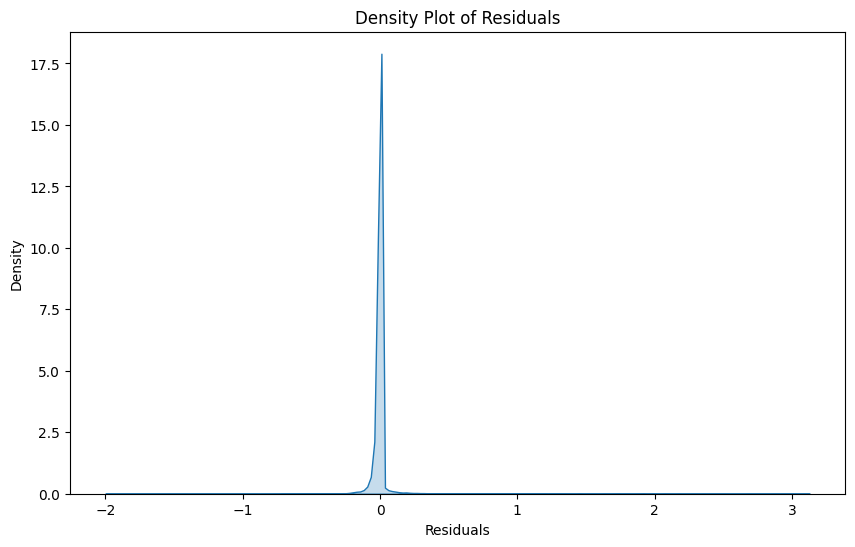

In [88]:
# prompt: 查看residual分布

import matplotlib.pyplot as plt
import seaborn as sns

# 计算残差
residuals = data4_sorted['log_mig_rate'] - predictions_sorted

# 绘制残差的直方图
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 绘制残差的箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(y=residuals)
plt.title('Boxplot of Residuals')
plt.ylabel('Residuals')
plt.show()

# 绘制残差的密度图
plt.figure(figsize=(10, 6))
sns.kdeplot(residuals, shade=True)
plt.title('Density Plot of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()


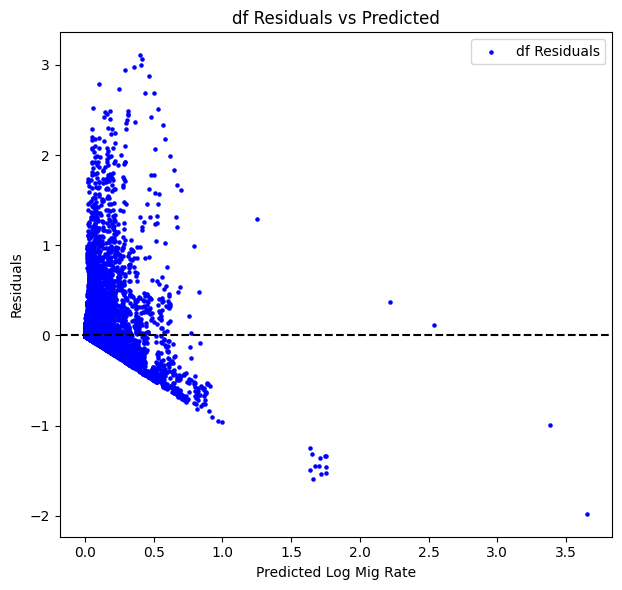

In [89]:
import matplotlib.pyplot as plt
df=data4
df['predictions']=ppml_model_all.predict(data4)
# 计算残差
df['residuals'] = df['log_mig_rate'] - df['predictions']

# 绘制残差图
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['predictions'], df['residuals'], color='blue', label='df Residuals',s=5)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Log Mig Rate')
plt.ylabel('Residuals')
plt.title('df Residuals vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()


In [90]:
# prompt: 把data2根据ongoing_conflict_x降序排列，然后分成相等数据量的三份

# 按 'Ongoing_Conflict_x' 降序排列
data4_sorted = data4.sort_values('Ongoing_Conflict_x', ascending=False)

# 将排序后的数据分成三等份
n = len(data4_sorted)
data4_top = data4_sorted.iloc[:n//3, :]
data4_middle = data4_sorted.iloc[n//3:2*n//3, :]
data4_bottom = data4_sorted.iloc[2*n//3:, :]


In [91]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# 构建PPML模型公式
formula = ('log_mig_rate ~Ongoing_Conflict_x+Ongoing_Conflict_y+'
       'gdpp_gap+log_dist+'
       'contig+common_lan+'
       'colonial_link+commom_reli+network+year+is_mig'
)


# 拟合Poisson Pseudo-Maximum Likelihood (PPML)模型
ppml_model_top = smf.poisson(formula, data=data4_top).fit(maxiter=1000)

# 输出模型结果
ppml_model_top.summary()

Optimization terminated successfully.
         Current function value: 0.047930
         Iterations 27


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:           log_mig_rate   No. Observations:                57558
Model:                        Poisson   Df Residuals:                    57546
Method:                           MLE   Df Model:                           11
Date:                Wed, 21 Aug 2024   Pseudo R-squ.:                  0.3922
Time:                        16:37:57   Log-Likelihood:                -2758.7
converged:                       True   LL-Null:                       -4538.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -4.9657      0.409    -12.135      0.000      -5.768      -4.164
Ongoing_Conflict_x     0.6964      0.058     12.086      0.000       0.583       0.809
Ongoing_Conflict_y     0.2123      0.067      3.166      0.002       0.081       0.344
gdpp_gap               0.3496      0.049      7.104      0.000       0.253       0.446
log_dist              -0.5773      0.037    -15.575      0.000      -0.650      -0.505
contig                 1.1754      0.096     12.235      0.000       0.987       1.364
common_lan            -0.0495      0.080     -0.616      0.538      -0.207       0.108
colonial_link          1.8401      0.114     16.203      0.000       1.617       2.063
commom_reli            0.1795      0.115      1.561      0.118      -0.046       0.405
network                0.0188      0.006      2.976      0.003       0.006       0.031
year                  -0.0344      0.010     -3.424      0.001      -0.054      -0.015
is_mig                -5.3831      0.464    -11.596      0.000      -6.293      -4.473
======================================================================================
"""

In [92]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# 构建PPML模型公式
formula = ('log_mig_rate ~Ongoing_Conflict_x+Ongoing_Conflict_y+'
       'gdpp_gap+log_dist+'
       'contig+common_lan+'
       'colonial_link+commom_reli+network+year+is_mig'
)


# 拟合Poisson Pseudo-Maximum Likelihood (PPML)模型
ppml_model_middle = smf.poisson(formula, data=data4_middle).fit(maxiter=1000)

# 输出模型结果
ppml_model_middle.summary()

Optimization terminated successfully.
         Current function value: 0.046200
         Iterations 48


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:           log_mig_rate   No. Observations:                57558
Model:                        Poisson   Df Residuals:                    57546
Method:                           MLE   Df Model:                           11
Date:                Wed, 21 Aug 2024   Pseudo R-squ.:                  0.3892
Time:                        16:37:58   Log-Likelihood:                -2659.2
converged:                       True   LL-Null:                       -4353.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.4948      0.501     -6.975      0.000      -4.477      -2.513
Ongoing_Conflict_x    -0.4129      0.233     -1.770      0.077      -0.870       0.044
Ongoing_Conflict_y     0.2212      0.083      2.654      0.008       0.058       0.384
gdpp_gap               0.3975      0.046      8.619      0.000       0.307       0.488
log_dist              -0.5482      0.029    -18.671      0.000      -0.606      -0.491
contig                 0.3451      0.101      3.405      0.001       0.146       0.544
common_lan            -0.2832      0.092     -3.064      0.002      -0.464      -0.102
colonial_link          1.5978      0.112     14.251      0.000       1.378       1.818
commom_reli           -0.5484      0.159     -3.452      0.001      -0.860      -0.237
network                0.1599      0.011     14.641      0.000       0.139       0.181
year                   0.0118      0.010      1.207      0.227      -0.007       0.031
is_mig                -5.1908      0.407    -12.742      0.000      -5.989      -4.392
======================================================================================
"""

bottom要删除common_language

In [93]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# 构建PPML模型公式
formula = ('log_mig_rate ~Ongoing_Conflict_x+Ongoing_Conflict_y+'
       'gdpp_gap+log_dist++network+commom_reli+'
       'contig+'
       'colonial_link+year+is_mig'
)


# 拟合Poisson Pseudo-Maximum Likelihood (PPML)模型
ppml_model_bottom = smf.poisson(formula, data=data4_bottom).fit(maxiter=1000)

# 输出模型结果
ppml_model_bottom.summary()

Optimization terminated successfully.
         Current function value: 0.040695
         Iterations 58


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:           log_mig_rate   No. Observations:                57559
Model:                        Poisson   Df Residuals:                    57548
Method:                           MLE   Df Model:                           10
Date:                Wed, 21 Aug 2024   Pseudo R-squ.:                  0.3668
Time:                        16:37:59   Log-Likelihood:                -2342.4
converged:                       True   LL-Null:                       -3699.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -4.2402      0.444     -9.560      0.000      -5.109      -3.371
Ongoing_Conflict_x     0.4753      0.280      1.697      0.090      -0.074       1.024
Ongoing_Conflict_y    -0.2454      0.109     -2.261      0.024      -0.458      -0.033
gdpp_gap               0.3154      0.038      8.354      0.000       0.241       0.389
log_dist              -0.4669      0.035    -13.247      0.000      -0.536      -0.398
network                0.2097      0.023      9.141      0.000       0.165       0.255
commom_reli            0.0742      0.150      0.494      0.622      -0.220       0.369
contig                 0.2588      0.117      2.217      0.027       0.030       0.488
colonial_link          0.8764      0.198      4.430      0.000       0.489       1.264
year                   0.0173      0.011      1.561      0.119      -0.004       0.039
is_mig                -4.9517      0.393    -12.595      0.000      -5.722      -4.181
======================================================================================
"""

In [94]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 构建PPML模型公式
formula = (
    'log_mig_rate ~Ongoing_Conflict_x+Ongoing_Conflict_y+'
       'Political_Instability_x+'
       'Police_Rate_x+Refugees_And_Idps_x+'

       'Political_Instability_y+'
       'Police_Rate_y+Refugees_And_Idps_y +is_battle_x+is_battle_y+ '
    'gdpp_gap + log_dist +network+ commom_reli+ contig + common_lan + colonial_link +year+is_mig'
)

# 拟合Poisson Pseudo-Maximum Likelihood (PPML)模型
ppml_model_ex = smf.poisson(formula, data=data4).fit(maxiter=2000)

# 输出模型结果
print(ppml_model_ex.summary())




Optimization terminated successfully.
         Current function value: 0.045045
         Iterations 53
                          Poisson Regression Results                          
Dep. Variable:           log_mig_rate   No. Observations:               172675
Model:                        Poisson   Df Residuals:                   172655
Method:                           MLE   Df Model:                           19
Date:                Wed, 21 Aug 2024   Pseudo R-squ.:                  0.3829
Time:                        16:38:03   Log-Likelihood:                -7778.2
converged:                       True   LL-Null:                       -12605.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.0556      0.245    -12.467      0.000      -3.536  

is_battle_x全为0

In [95]:
data4.describe()

,year,stock,flow,Overall_Score_x,Overall_Score_y,Ongoing_Conflict_x,Terrorism_Impact_x,Violent_Crime_x,Political_Instability_x,Police_Rate_x,...,common_lan,colonial_link,commom_reli,mig_rate,is_battle_x,is_battle_y,is_mig,log_mig_rate,predictions,residuals
count,172675.000000,1.726750e+05,172675.000000,172675.000000,172675.000000,172675.000000,172675.000000,172675.000000,172675.000000,172675.000000,...,172675.000000,172675.000000,172675.000000,172675.000000,172675.000000,172675.000000,172675.000000,172675.000000,172675.000000,1.726750e+05
mean,0.224254,9.734396e+03,399.138642,2.015402,2.000612,1.743828,2.015602,2.649317,2.621899,2.586726,...,0.108192,0.011084,0.147405,0.024556,0.075911,0.073786,0.747543,0.014441,0.014441,1.558524e-18
std,3.298406,9.135791e+04,5354.097991,0.447537,0.446252,0.590146,1.089786,1.087279,1.026459,0.887458,...,0.310623,0.104698,0.240145,0.335378,0.264857,0.261423,0.434423,0.101870,0.049698,9.279946e-02
min,-5.000000,0.000000e+00,0.000000,1.093000,1.093000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000011,-1.976678e+00
25%,-3.000000,0.000000e+00,0.000000,1.718000,1.706000,1.402576,1.000000,2.000000,1.750000,1.821000,...,0.000000,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000077,-1.720809e-04
50%,0.000000,6.000000e+00,0.000000,1.966000,1.949000,1.603865,1.662400,3.000000,2.750000,2.500000,...,0.000000,0.000000,0.029000,0.000000,0.000000,0.000000,1.000000,0.000100,0.000124,-6.260454e-06
75%,3.000000,3.680000e+02,5.000000,2.248000,2.227000,2.093280,2.818400,3.000000,3.250000,3.212000,...,0.000000,0.000000,0.169000,0.000277,0.000000,0.000000,1.000000,0.000377,0.005508,3.524971e-05
max,6.000000,3.698393e+06,618795.000000,3.538000,3.538000,4.327697,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,0.996000,32.223719,1.000000,1.000000,1.000000,3.503364,3.654934,3.105942e+00


In [96]:
data4.columns

Index(['iso_or', 'origin', 'iso_des', 'destination', 'year', 'stock', 'flow',
       'geometry_x', 'geometry_y', 'continent_x', 'continent_y',
       'Overall_Score_x', 'Overall_Score_y', 'Ongoing_Conflict_x',
       'Terrorism_Impact_x', 'Violent_Crime_x', 'Political_Instability_x',
       'Police_Rate_x', 'Refugees_And_Idps_x', 'Ongoing_Conflict_y',
       'Terrorism_Impact_y', 'Violent_Crime_y', 'Political_Instability_y',
       'Police_Rate_y', 'Refugees_And_Idps_y', 'log_dist', 'network',
       'gdpp_gap', 'contig', 'common_lan', 'colonial_link', 'commom_reli',
       'mig_rate', 'is_battle_x', 'is_battle_y', 'is_mig', 'log_mig_rate',
       'predictions', 'residuals'],
      dtype='object')

In [97]:
# Define the thresholds for low and high conflict
threshold_x = data4['Ongoing_Conflict_x'].median()
threshold_y = data4['Ongoing_Conflict_y'].median()

# Create new column for conflict group
def conflict_group(row, threshold_x, threshold_y):
    if row['Ongoing_Conflict_x'] <= threshold_x and row['Ongoing_Conflict_y'] <= threshold_y:
        return '低低'
    elif row['Ongoing_Conflict_x'] <= threshold_x and row['Ongoing_Conflict_y'] > threshold_y:
        return '低高'
    elif row['Ongoing_Conflict_x'] > threshold_x and row['Ongoing_Conflict_y'] <= threshold_y:
        return '高低'
    else:
        return '高高'

data4['Conflict_Group'] = data4.apply(conflict_group, axis=1, threshold_x=threshold_x, threshold_y=threshold_y)
low_low = data4[data4['Conflict_Group'] == '低低']
low_high = data4[data4['Conflict_Group'] == '低高']
high_low = data4[data4['Conflict_Group'] == '高低']
high_high = data4[data4['Conflict_Group'] == '高高']

In [98]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 构建PPML模型公式
formula = (
    'log_mig_rate ~Ongoing_Conflict_x+Ongoing_Conflict_y+'
       'Political_Instability_x+'
       'Police_Rate_x+Refugees_And_Idps_x+'

       'Political_Instability_y+'
       'Police_Rate_y+Refugees_And_Idps_y+is_battle_x+is_battle_y+ '
    'gdpp_gap + log_dist +network+ commom_reli+ contig + common_lan + colonial_link +year+is_mig')

# 拟合Poisson Pseudo-Maximum Likelihood (PPML)模型
ppml_modelhl = smf.poisson(formula, data=high_low).fit(maxiter=1000)

# 输出模型结果
print(ppml_modelhl.summary())


Optimization terminated successfully.
         Current function value: 0.048177
         Iterations 20
                          Poisson Regression Results                          
Dep. Variable:           log_mig_rate   No. Observations:                44319
Model:                        Poisson   Df Residuals:                    44299
Method:                           MLE   Df Model:                           19
Date:                Wed, 21 Aug 2024   Pseudo R-squ.:                  0.3178
Time:                        16:38:07   Log-Likelihood:                -2135.2
converged:                       True   LL-Null:                       -3129.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -1.0590      0.773     -1.370      0.171      -2.574  

In [99]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 构建PPML模型公式
formula = (
    'log_mig_rate ~Ongoing_Conflict_x+Ongoing_Conflict_y+'
       'Political_Instability_x+'
       'Police_Rate_x+Refugees_And_Idps_x+'

       'Political_Instability_y+'
       'Police_Rate_y+Refugees_And_Idps_y +is_battle_x+is_battle_y+ '
    'gdpp_gap + log_dist +network+ commom_reli+ contig + common_lan + colonial_link +year+is_mig'
)

# 拟合Poisson Pseudo-Maximum Likelihood (PPML)模型
ppml_modelhh = smf.poisson(formula, data=high_high).fit(maxiter=1000)

# 输出模型结果
print(ppml_modelhh.summary())


Optimization terminated successfully.
         Current function value: 0.039003
         Iterations 70
                          Poisson Regression Results                          
Dep. Variable:           log_mig_rate   No. Observations:                39274
Model:                        Poisson   Df Residuals:                    39254
Method:                           MLE   Df Model:                           19
Date:                Wed, 21 Aug 2024   Pseudo R-squ.:                  0.5094
Time:                        16:38:09   Log-Likelihood:                -1531.8
converged:                       True   LL-Null:                       -3122.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -4.3972      0.991     -4.437      0.000      -6.340  

In [100]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 构建PPML模型公式
formula = (
    'log_mig_rate ~Ongoing_Conflict_x+Ongoing_Conflict_y+'
       'Political_Instability_x+'
       'Police_Rate_x+Refugees_And_Idps_x+'

       'Political_Instability_y+'
       'Police_Rate_y+Refugees_And_Idps_y +is_battle_x+is_battle_y+ '
    'gdpp_gap + log_dist +network+ commom_reli+ contig + common_lan + colonial_link +year+is_mig'
)

# 拟合Poisson Pseudo-Maximum Likelihood (PPML)模型
ppml_modelll = smf.poisson(formula, data=low_low).fit(maxiter=1000)

# 输出模型结果
print(ppml_modelll.summary())


Optimization terminated successfully.
         Current function value: 0.063582
         Iterations 50
                          Poisson Regression Results                          
Dep. Variable:           log_mig_rate   No. Observations:                47179
Model:                        Poisson   Df Residuals:                    47159
Method:                           MLE   Df Model:                           19
Date:                Wed, 21 Aug 2024   Pseudo R-squ.:                  0.3526
Time:                        16:38:11   Log-Likelihood:                -2999.7
converged:                       True   LL-Null:                       -4633.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -1.0400      0.524     -1.984      0.047      -2.067  

In [101]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 选择用于计算VIF的变量
variables = [

       'Ongoing_Conflict_x',
       'Political_Instability_x', 'Police_Rate_x', 'Refugees_And_Idps_x',
       'Ongoing_Conflict_y',
       'Political_Instability_y', 'Police_Rate_y', 'Refugees_And_Idps_y',
       'log_dist', 'network', 'gdpp_gap','contig', 'common_lan', 'colonial_link', 'commom_reli','is_battle_x','is_battle_y','is_mig'
]

# 提取用于计算VIF的变量数据
X = low_high[variables]

# 添加常数项
X = sm.add_constant(X)

# 计算VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# 将VIF值四舍五入并格式化为小数
vif_data["VIF"] = vif_data["VIF"].round(2)
# 输出VIF结果
print(vif_data)

                    feature      VIF
0                     const  1018.70
1        Ongoing_Conflict_x     1.64
2   Political_Instability_x     1.96
3             Police_Rate_x     1.06
4       Refugees_And_Idps_x     1.10
5        Ongoing_Conflict_y     2.28
6   Political_Instability_y     1.45
7             Police_Rate_y     1.09
8       Refugees_And_Idps_y     1.83
9                  log_dist     1.30
10                  network     1.12
11                 gdpp_gap     1.81
12                   contig     1.27
13               common_lan     1.17
14            colonial_link     1.06
15              commom_reli     1.21
16              is_battle_x     1.02
17              is_battle_y     1.84
18                   is_mig     1.15


In [102]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 构建PPML模型公式
formula = (
    'log_mig_rate ~Ongoing_Conflict_x+Ongoing_Conflict_y+'
       'Political_Instability_x+'
       'Police_Rate_x+Refugees_And_Idps_x+'

       'Political_Instability_y+'
       'Police_Rate_y+Refugees_And_Idps_y +is_battle_x+is_battle_y+ '
    'gdpp_gap + log_dist + commom_reli+ contig + common_lan + colonial_link +year+is_mig'
)

# 拟合Poisson Pseudo-Maximum Likelihood (PPML)模型
ppml_modellh = smf.poisson(formula, data=low_high).fit(maxiter=2000)

# 输出模型结果
print(ppml_modellh.summary())


Optimization terminated successfully.
         Current function value: 0.019975
         Iterations 29
                          Poisson Regression Results                          
Dep. Variable:           log_mig_rate   No. Observations:                41903
Model:                        Poisson   Df Residuals:                    41884
Method:                           MLE   Df Model:                           18
Date:                Wed, 21 Aug 2024   Pseudo R-squ.:                  0.4538
Time:                        16:38:13   Log-Likelihood:                -837.03
converged:                       True   LL-Null:                       -1532.5
Covariance Type:            nonrobust   LLR p-value:                1.264e-284
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.0055      1.033     -2.910      0.004      -5.030  

In [103]:
low_high.columns

Index(['iso_or', 'origin', 'iso_des', 'destination', 'year', 'stock', 'flow',
       'geometry_x', 'geometry_y', 'continent_x', 'continent_y',
       'Overall_Score_x', 'Overall_Score_y', 'Ongoing_Conflict_x',
       'Terrorism_Impact_x', 'Violent_Crime_x', 'Political_Instability_x',
       'Police_Rate_x', 'Refugees_And_Idps_x', 'Ongoing_Conflict_y',
       'Terrorism_Impact_y', 'Violent_Crime_y', 'Political_Instability_y',
       'Police_Rate_y', 'Refugees_And_Idps_y', 'log_dist', 'network',
       'gdpp_gap', 'contig', 'common_lan', 'colonial_link', 'commom_reli',
       'mig_rate', 'is_battle_x', 'is_battle_y', 'is_mig', 'log_mig_rate',
       'predictions', 'residuals', 'Conflict_Group'],
      dtype='object')

In [104]:
low_high.describe()

,year,stock,flow,Overall_Score_x,Overall_Score_y,Ongoing_Conflict_x,Terrorism_Impact_x,Violent_Crime_x,Political_Instability_x,Police_Rate_x,...,common_lan,colonial_link,commom_reli,mig_rate,is_battle_x,is_battle_y,is_mig,log_mig_rate,predictions,residuals
count,41903.000000,4.190300e+04,41903.000000,41903.000000,41903.000000,41903.000000,41903.000000,41903.000000,41903.000000,41903.000000,...,41903.000000,41903.000000,41903.000000,41903.000000,41903.000000,41903.000000,41903.000000,41903.000000,41903.000000,41903.000000
mean,0.138272,3.650513e+03,87.075579,1.701273,2.341674,1.301482,1.414693,2.189080,2.037055,2.595720,...,0.102475,0.012004,0.122476,0.009144,0.002649,0.152376,0.850273,0.006275,0.006305,-0.000031
std,3.239574,5.430396e+04,1343.912566,0.231934,0.370920,0.187941,0.621928,0.907392,0.844429,0.753426,...,0.303275,0.108904,0.212849,0.135092,0.051401,0.359389,0.356808,0.060388,0.029878,0.050899
min,-5.000000,0.000000e+00,0.000000,1.093000,1.717000,1.000000,1.000000,1.000000,1.000000,1.016000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000014,-0.470585
25%,-3.000000,0.000000e+00,0.000000,1.524000,2.075000,1.094082,1.000000,1.500000,1.250000,2.007000,...,0.000000,0.000000,0.003000,0.000000,0.000000,0.000000,1.000000,0.000100,0.000064,-0.000042
50%,0.000000,0.000000e+00,0.000000,1.725000,2.251000,1.402576,1.038400,2.000000,2.000000,2.500000,...,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000,0.000100,0.000090,0.000016
75%,3.000000,6.600000e+01,0.000000,1.872000,2.493000,1.436997,1.677000,3.000000,2.750000,3.155000,...,0.000000,0.000000,0.140000,0.000000,0.000000,0.000000,1.000000,0.000100,0.000162,0.000042
max,6.000000,3.067647e+06,92045.000000,2.260000,3.512000,1.603865,3.742000,5.000000,4.250000,5.000000,...,1.000000,1.000000,0.992000,9.442295,1.000000,1.000000,1.000000,2.345964,0.602942,2.128550


In [105]:
data4.columns

Index(['iso_or', 'origin', 'iso_des', 'destination', 'year', 'stock', 'flow',
       'geometry_x', 'geometry_y', 'continent_x', 'continent_y',
       'Overall_Score_x', 'Overall_Score_y', 'Ongoing_Conflict_x',
       'Terrorism_Impact_x', 'Violent_Crime_x', 'Political_Instability_x',
       'Police_Rate_x', 'Refugees_And_Idps_x', 'Ongoing_Conflict_y',
       'Terrorism_Impact_y', 'Violent_Crime_y', 'Political_Instability_y',
       'Police_Rate_y', 'Refugees_And_Idps_y', 'log_dist', 'network',
       'gdpp_gap', 'contig', 'common_lan', 'colonial_link', 'commom_reli',
       'mig_rate', 'is_battle_x', 'is_battle_y', 'is_mig', 'log_mig_rate',
       'predictions', 'residuals', 'Conflict_Group'],
      dtype='object')

In [106]:
data4['origin'].unique()

array(['Afghanistan', 'Algeria', 'Angola', 'Armenia', 'Austria',
       'Azerbaijan', 'Belgium', 'Benin', 'Burkina Faso', 'Bhutan',
       'Belarus', 'Bangladesh', 'Bosnia and Herzegovina', 'Botswana',
       'Burundi', 'Bulgaria', 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'China',
       'Republic of the Congo', 'Croatia', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Democratic Republic of the Congo',
       'Vietnam', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Timor-Leste', 'Finland', 'France', 'Gabon',
       'The Gambia', 'Ghana', 'Germany', 'Guinea-Bissau', 'Greece',
       'Georgia', 'Guinea', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Ireland', 'Iran', 'Iraq', 'Israel', 'Italy', 'Jordan', 'Japan',
       'Kenya', 'Kuwait', 'Kyrgyz Republic', 'Kazakhstan', 'Laos',
       'Latvia', 'Liberia', 'Lebanon', 'Lesotho', 'Libya', 'Lithuania',
       'Mauritania', 'North Macedonia', 'Madagascar', 'Malaysia',
    

In [107]:
# 筛选year为2019且Country Origin Code为UKR的数据
data_2019_UKR = data4[(data4['year'] == 1) & (data4['iso_or'] == 'UKR')]
data_2019_UKR

,iso_or,origin,iso_des,destination,year,stock,flow,geometry_x,geometry_y,continent_x,...,colonial_link,commom_reli,mig_rate,is_battle_x,is_battle_y,is_mig,log_mig_rate,predictions,residuals,Conflict_Group
134975,UKR,Ukraine,ALB,Albania,1,18,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Europe,...,0.0,0.0,0.000000,1,0,1,0.000100,0.000297,-0.000197,高低
135125,UKR,Ukraine,ALG,Algeria,1,141,14.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Europe,...,0.0,0.0,0.000309,1,0,0,0.000409,0.034256,-0.033847,高高
135275,UKR,Ukraine,ANG,Angola,1,3,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",Europe,...,0.0,0.0,0.000000,1,0,1,0.000100,0.000091,0.000009,高高
135575,UKR,Ukraine,ARM,Armenia,1,2268,172.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((46.50572 38.77061, 46.14362 38.74120...",Europe,...,0.0,0.0,0.003799,1,0,0,0.003892,0.060959,-0.057067,高高
135883,UKR,Ukraine,AUS,Austria,1,9521,781.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((16.97967 48.12350, 16.90375 47.71487...",Europe,...,0.0,0.0,0.017251,1,0,0,0.017204,0.103321,-0.086117,高低
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157328,UKR,Ukraine,ZIM,Zimbabwe,1,11,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",Europe,...,0.0,0.0,0.000000,1,0,1,0.000100,0.000089,0.000011,高高
256659,UKR,Ukraine,AFG,Afghanistan,1,0,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Europe,...,0.0,0.0,0.000000,1,1,1,0.000100,0.000184,-0.000084,高高
256692,UKR,Ukraine,MNG,Montenegro,1,154,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Europe,...,0.0,0.0,0.000000,1,0,1,0.000100,0.000325,-0.000225,高低
256760,UKR,Ukraine,SRB,Serbia,1,1276,14.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Europe,...,0.0,0.0,0.000309,1,0,0,0.000409,0.066787,-0.066377,高低


In [108]:
# prompt: 筛选year为2019且Country Origin Code为UKR的数据，在原数据集新加一列预测值，输出上面模型预测y值

df_ex=data_2019_UKR
# 在原数据集新加一列预测值
df_ex['predictions'] = ppml_model_ex.predict(df_ex)
# 计算均方误差（MSE）
df_ex['MSE'] = (df_ex['log_mig_rate'] - df_ex['predictions'])**2

# 计算平均绝对百分比误差（MAPE）
df_ex['MAPE'] = np.abs((df_ex['log_mig_rate'] - df_ex['predictions']) / df_ex['log_mig_rate'])
df_ex


<ipython-input-108-57392a6e0201>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ex['predictions'] = ppml_model_ex.predict(df_ex)
<ipython-input-108-57392a6e0201>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ex['MSE'] = (df_ex['log_mig_rate'] - df_ex['predictions'])**2
<ipython-input-108-57392a6e0201>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

,iso_or,origin,iso_des,destination,year,stock,flow,geometry_x,geometry_y,continent_x,...,mig_rate,is_battle_x,is_battle_y,is_mig,log_mig_rate,predictions,residuals,Conflict_Group,MSE,MAPE
134975,UKR,Ukraine,ALB,Albania,1,18,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Europe,...,0.000000,1,0,1,0.000100,0.000190,-0.000197,高低,8.056268e-09,0.897567
135125,UKR,Ukraine,ALG,Algeria,1,141,14.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Europe,...,0.000309,1,0,0,0.000409,0.024555,-0.033847,高高,5.830292e-04,59.008610
135275,UKR,Ukraine,ANG,Angola,1,3,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",Europe,...,0.000000,1,0,1,0.000100,0.000064,0.000009,高高,1.301289e-09,0.360734
135575,UKR,Ukraine,ARM,Armenia,1,2268,172.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((46.50572 38.77061, 46.14362 38.74120...",Europe,...,0.003799,1,0,0,0.003892,0.038033,-0.057067,高高,1.165630e-03,8.772038
135883,UKR,Ukraine,AUS,Austria,1,9521,781.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((16.97967 48.12350, 16.90375 47.71487...",Europe,...,0.017251,1,0,0,0.017204,0.076366,-0.086117,高低,3.500092e-03,3.438789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157328,UKR,Ukraine,ZIM,Zimbabwe,1,11,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",Europe,...,0.000000,1,0,1,0.000100,0.000048,0.000011,高高,2.731619e-09,0.522649
256659,UKR,Ukraine,AFG,Afghanistan,1,0,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Europe,...,0.000000,1,1,1,0.000100,0.000085,-0.000084,高高,2.352241e-10,0.153370
256692,UKR,Ukraine,MNG,Montenegro,1,154,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Europe,...,0.000000,1,0,1,0.000100,0.000313,-0.000225,高低,4.527012e-08,2.127678
256760,UKR,Ukraine,SRB,Serbia,1,1276,14.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Europe,...,0.000309,1,0,0,0.000409,0.033893,-0.066377,高低,1.121185e-03,81.829321


<ipython-input-109-451e49e9b862>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ex['residuals']=df_ex['log_mig_rate'] - df_ex['predictions']


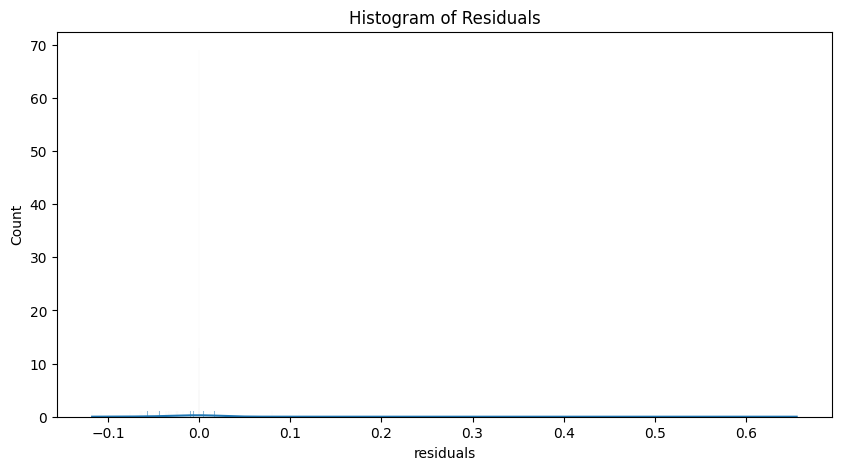

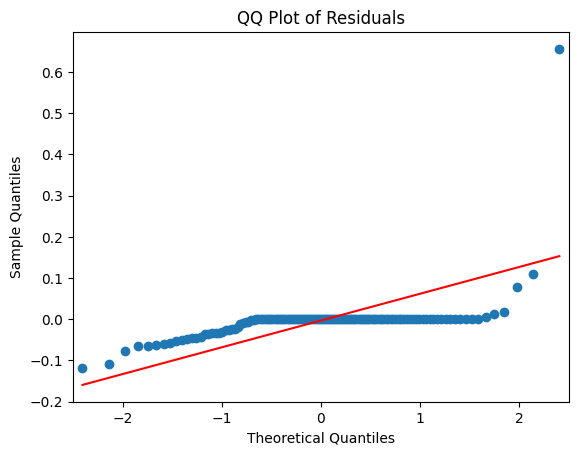

In [109]:

df_ex['residuals']=df_ex['log_mig_rate'] - df_ex['predictions']

# 直方图
plt.figure(figsize=(10, 5))
sns.histplot(df_ex['residuals'], kde=True)
plt.title('Histogram of Residuals')
plt.show()

# QQ图
sm.qqplot(df_ex['residuals'], line='s')
plt.title('QQ Plot of Residuals')
plt.show()


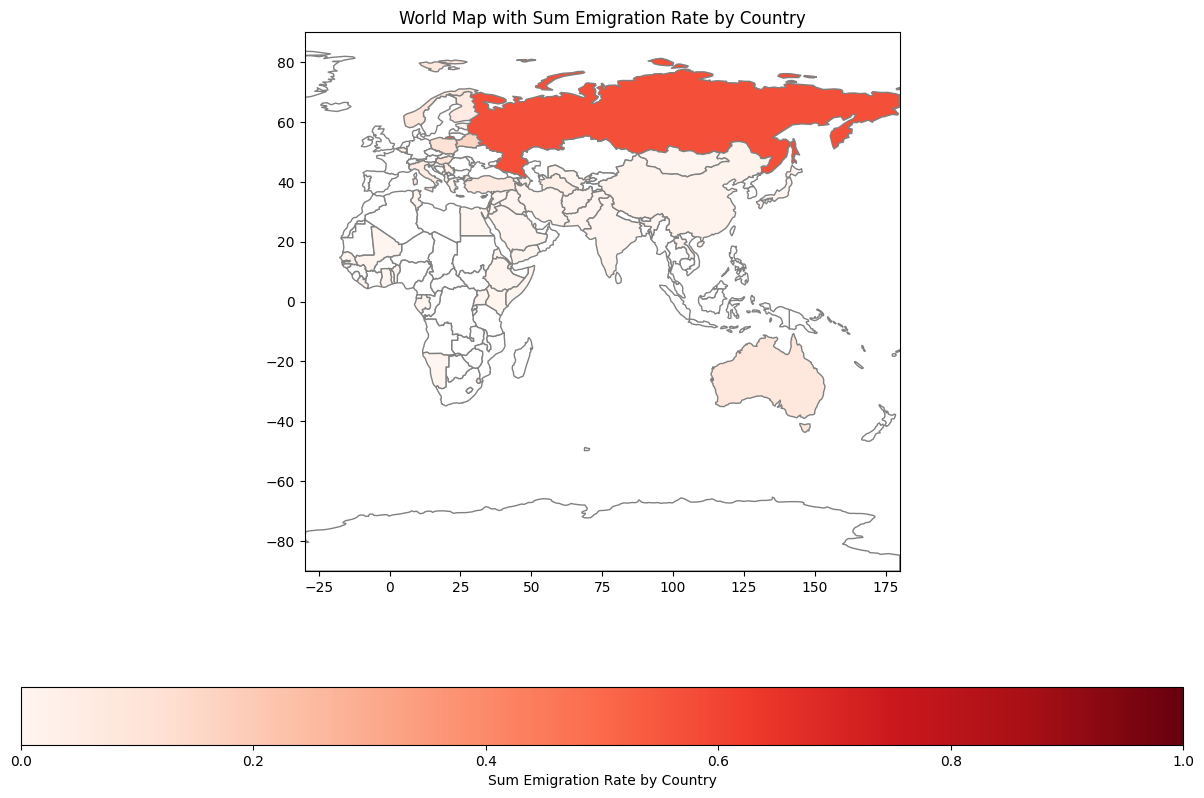

In [110]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import matplotlib.colors as mcolors
import numpy as np

# 确保列名一致
world = world.rename(columns={'iso_a3': 'Iso3c'})

# 将用户数据与世界地图数据合并
merged = world.merge(df_ex, left_on='Iso3c', right_on='iso_des', how='left')

# 填充NA值为-1
merged['predictions'].fillna(-1, inplace=True)


# 创建自定义颜色映射
cmap = plt.cm.Reds
norm = plt.Normalize(vmin=0, vmax=1)

# 绘制属性地图
fig, ax = plt.subplots(figsize=(15, 10), facecolor='white')

# 分别绘制值为 -1 和大于 0 的部分
merged[merged['predictions'] == -1].plot(ax=ax, color='white', edgecolor='gray')
merged[merged['predictions'] >= 0].plot(column='predictions', ax=ax, legend=True,
                                       legend_kwds={'label': "Sum Emigration Rate by Country",
                                                    'orientation': "horizontal"},
                                       cmap=cmap, norm=norm, edgecolor='gray')

# 设置图形标题
plt.title('World Map with Sum Emigration Rate by Country', color='black')

# 设置边框和横坐标范围
ax.set_xlim(-30, 180)
ax.set_ylim(-90, 90)

# 设置坐标轴颜色
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

# 设置坐标轴刻度颜色
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# 设置坐标轴标签颜色
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')

plt.show()


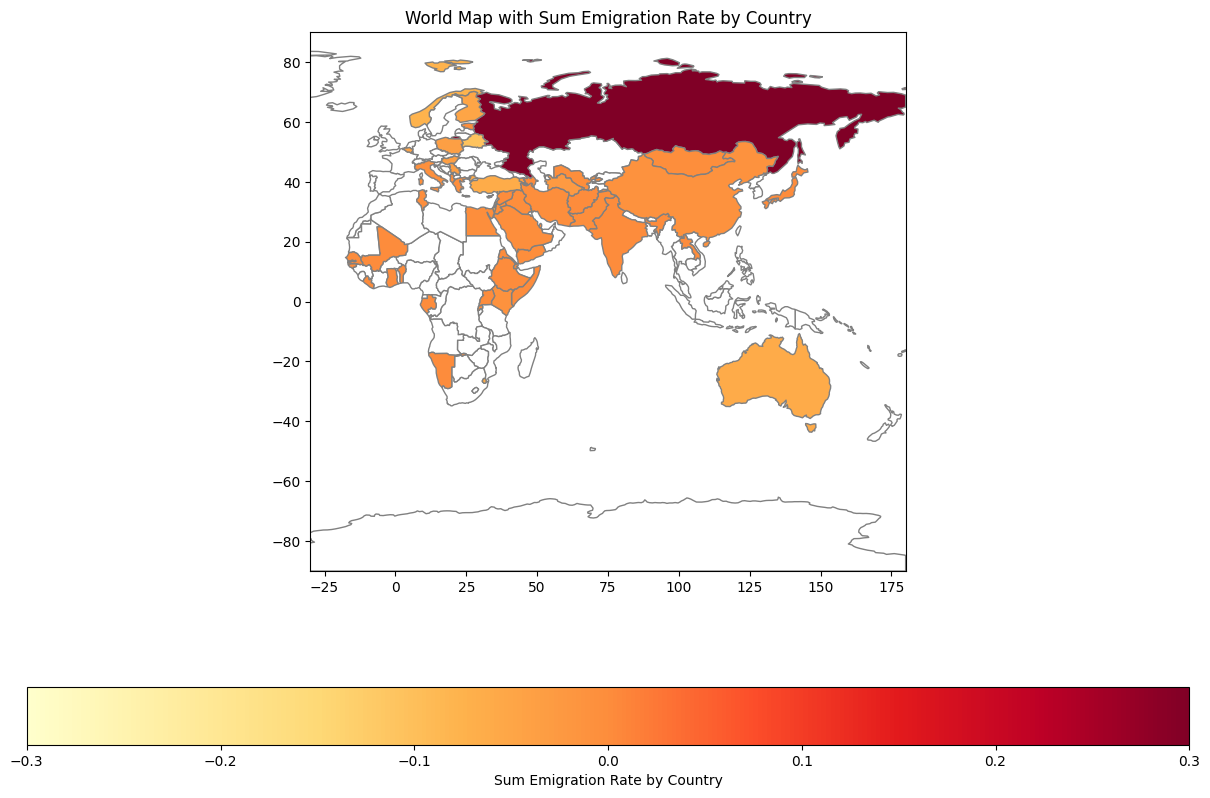

In [111]:
# 创建自定义颜色映射
#cmap = plt.cm.Reds
#norm = plt.Normalize(merged['residuals'].min(), vmax=merged['residuals'].max())
cmap = plt.cm.YlOrRd
norm = plt.Normalize(vmin=-0.3, vmax=0.3)
# 绘制属性地图
fig, ax = plt.subplots(figsize=(15, 10), facecolor='white')
merged['residuals'].fillna(-10, inplace=True)
# 分别绘制值为 -1 和大于 0 的部分
merged[merged['residuals'] == -10].plot(ax=ax, color='white', edgecolor='gray')
merged[merged['residuals'] !=-10].plot(column='residuals', ax=ax, legend=True,
                                       legend_kwds={'label': "Sum Emigration Rate by Country",
                                                    'orientation': "horizontal"},
                                       cmap=cmap, norm=norm, edgecolor='gray')

# 设置图形标题
plt.title('World Map with Sum Emigration Rate by Country', color='black')

# 设置边框和横坐标范围
ax.set_xlim(-30, 180)
ax.set_ylim(-90, 90)

# 设置坐标轴颜色
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

# 设置坐标轴刻度颜色
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# 设置坐标轴标签颜色
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')

plt.show()


In [112]:
high_high['predictions']=ppml_modelhh.predict(high_high)
high_low['predictions']=ppml_modelhl.predict(high_low)

<ipython-input-112-bed3e2740083>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_high['predictions']=ppml_modelhh.predict(high_high)
<ipython-input-112-bed3e2740083>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_low['predictions']=ppml_modelhl.predict(high_low)


In [113]:
# 将两个数据集合并
df1 = pd.concat([high_high, high_low], ignore_index=True)
df1

,iso_or,origin,iso_des,destination,year,stock,flow,geometry_x,geometry_y,continent_x,...,colonial_link,commom_reli,mig_rate,is_battle_x,is_battle_y,is_mig,log_mig_rate,predictions,residuals,Conflict_Group
0,AFG,Afghanistan,ALG,Algeria,-5,4,0.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...","POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Asia,...,0.0,0.984,0.000000,1,0,1,0.000100,0.000278,-4.292941e-05,高高
1,ANG,Angola,ALG,Algeria,-5,0,0.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...","POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Africa,...,0.0,0.003,0.000000,0,0,1,0.000100,0.000084,-1.593827e-07,高高
2,ARM,Armenia,ALG,Algeria,-5,0,0.0,"POLYGON ((46.50572 38.77061, 46.14362 38.74120...","POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Asia,...,0.0,0.000,0.000000,0,0,1,0.000100,0.000117,-4.391431e-05,高高
3,AZE,Azerbaijan,ALG,Algeria,-5,0,0.0,"MULTIPOLYGON (((46.40495 41.86068, 46.68607 41...","POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Asia,...,0.0,0.926,0.000000,0,0,1,0.000100,0.000269,-4.563588e-05,高高
4,BEN,Benin,ALG,Algeria,-5,0,0.0,"POLYGON ((2.69170 6.25882, 1.86524 6.14216, 1....","POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Africa,...,0.0,0.152,0.000000,0,0,1,0.000100,0.000062,-5.538357e-05,高高
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83588,TUR,Turkiye,ALB,Albania,6,1872,0.0,"MULTIPOLYGON (((44.77268 37.17044, 44.29345 37...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Asia,...,0.0,0.203,0.000000,0,0,1,0.000100,0.000341,-2.890280e-04,高低
83589,GNB,Guinea-Bissau,GAM,The Gambia,6,13517,429.0,"POLYGON ((-16.67745 12.38485, -16.14772 12.547...","POLYGON ((-16.71373 13.59496, -15.62460 13.623...",Africa,...,0.0,0.327,0.223331,0,0,0,0.201677,0.341907,1.055571e-02,高低
83590,MAA,Mauritania,GAM,The Gambia,6,3561,112.0,"POLYGON ((-17.06342 20.99975, -16.84519 21.333...","POLYGON ((-16.71373 13.59496, -15.62460 13.623...",Africa,...,0.0,0.843,0.024748,0,0,0,0.024546,0.085307,-8.368016e-02,高低
83591,MLI,Mali,GAM,The Gambia,6,10122,315.0,"POLYGON ((-11.51394 12.44299, -11.46790 12.754...","POLYGON ((-16.71373 13.59496, -15.62460 13.623...",Africa,...,0.0,0.679,0.016024,0,0,0,0.015997,0.049926,-5.863584e-02,高低


In [114]:
df1['residuals']=df1['log_mig_rate'] - df1['predictions']
dfrussia=df1[(df1['destination']=='Russia')&(df1['origin']=='Ukraine')]
dfrussia

,iso_or,origin,iso_des,destination,year,stock,flow,geometry_x,geometry_y,continent_x,...,colonial_link,commom_reli,mig_rate,is_battle_x,is_battle_y,is_mig,log_mig_rate,predictions,residuals,Conflict_Group
5210,UKR,Ukraine,RUS,Russia,-4,3014038,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...",Europe,...,1.0,0.0,0.000000,0,0,1,0.000100,0.005785,-0.005685,高高
8197,UKR,Ukraine,RUS,Russia,-3,2992348,19593.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...",Europe,...,1.0,0.0,0.427135,0,0,0,0.355769,1.231832,-0.876063,高高
17416,UKR,Ukraine,RUS,Russia,0,3134545,107149.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...",Europe,...,1.0,0.0,2.355461,0,0,0,1.210689,0.947571,0.263119,高高
20792,UKR,Ukraine,RUS,Russia,1,3203332,109495.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...",Europe,...,1.0,0.0,2.418606,1,0,0,1.229333,0.975312,0.254021,高高
24112,UKR,Ukraine,RUS,Russia,2,3260904,98744.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...",Europe,...,1.0,0.0,2.186826,1,0,0,1.159125,1.064425,0.094700,高高
27536,UKR,Ukraine,RUS,Russia,3,3292739,73310.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...",Europe,...,1.0,0.0,1.628943,1,0,0,0.966682,1.148524,-0.181843,高高
31273,UKR,Ukraine,RUS,Russia,4,3305274,54634.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...",Europe,...,1.0,0.0,1.218662,1,0,0,0.797004,1.305080,-0.508076,高高
35656,UKR,Ukraine,RUS,Russia,5,3302744,39949.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...",Europe,...,1.0,0.0,0.895266,1,0,0,0.639459,1.486608,-0.847149,高高
37645,UKR,Ukraine,RUS,Russia,6,3290216,30138.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...",Europe,...,1.0,0.0,0.678995,0,0,0,0.518295,1.760267,-1.241972,高高


In [115]:
df1 = df1[(df1['year'] == 1) & (df1['iso_or'] == 'UKR')]

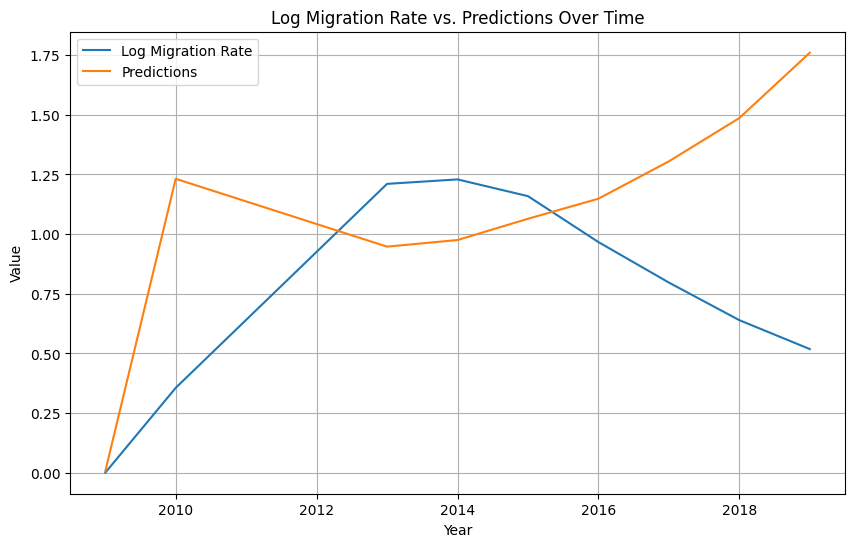

In [116]:
# prompt: plot折线图，x轴为year，y轴为mig_rate，两条折线，一条为log_mig_rate，一条为prediction

import matplotlib.pyplot as plt

# Assuming 'dfrussia' is your DataFrame with 'year', 'log_mig_rate', and 'predictions' columns

# Group the data by year and calculate the mean for log_mig_rate and predictions
grouped_data = dfrussia.groupby('year')[['log_mig_rate', 'predictions']].mean().reset_index()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['year']+2013, grouped_data['log_mig_rate'], label='Log Migration Rate')
plt.plot(grouped_data['year']+2013, grouped_data['predictions'], label='Predictions')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Log Migration Rate vs. Predictions Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [117]:
df1

,iso_or,origin,iso_des,destination,year,stock,flow,geometry_x,geometry_y,continent_x,...,colonial_link,commom_reli,mig_rate,is_battle_x,is_battle_y,is_mig,log_mig_rate,predictions,residuals,Conflict_Group
18464,UKR,Ukraine,ALG,Algeria,1,141,14.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Europe,...,0.0,0.0,0.000309,1,0,0,0.000409,0.014317,-0.013908,高高
18522,UKR,Ukraine,ANG,Angola,1,3,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",Europe,...,0.0,0.0,0.000000,1,0,1,0.000100,0.000025,0.000075,高高
18580,UKR,Ukraine,ARM,Armenia,1,2268,172.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((46.50572 38.77061, 46.14362 38.74120...",Europe,...,0.0,0.0,0.003799,1,0,0,0.003892,0.024368,-0.020476,高高
18638,UKR,Ukraine,AZE,Azerbaijan,1,2875,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","MULTIPOLYGON (((46.40495 41.86068, 46.68607 41...",Europe,...,0.0,0.0,0.000000,1,0,1,0.000100,0.000051,0.000049,高高
18696,UKR,Ukraine,BEN,Benin,1,1,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((2.69170 6.25882, 1.86524 6.14216, 1....",Europe,...,0.0,0.0,0.000000,1,0,1,0.000100,0.000042,0.000058,高高
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65624,UKR,Ukraine,UAE,United Arab Emirates,1,24,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((51.57952 24.24550, 51.75744 24.29407...",Europe,...,0.0,0.0,0.000000,1,0,1,0.000100,0.000331,-0.000231,高低
65683,UKR,Ukraine,UKG,United Kingdom,1,18860,865.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",Europe,...,0.0,0.0,0.019107,1,0,0,0.019027,0.038892,-0.019866,高低
65742,UKR,Ukraine,ZAM,Zambia,1,3,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((30.74001 -8.34001, 31.15775 -8.59458...",Europe,...,0.0,0.0,0.000000,1,0,1,0.000100,0.000042,0.000058,高低
83232,UKR,Ukraine,MNG,Montenegro,1,154,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Europe,...,0.0,0.0,0.000000,1,0,1,0.000100,0.000311,-0.000211,高低


<ipython-input-118-df9275047b60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['residuals']=df1['log_mig_rate'] - df1['predictions']


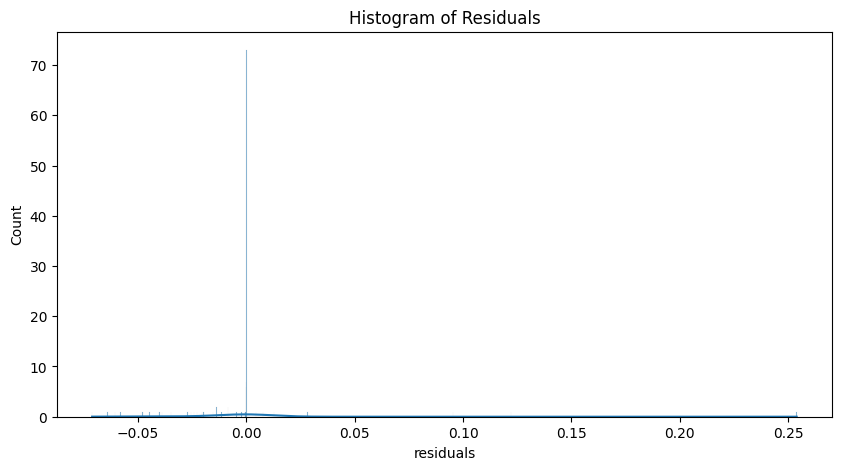

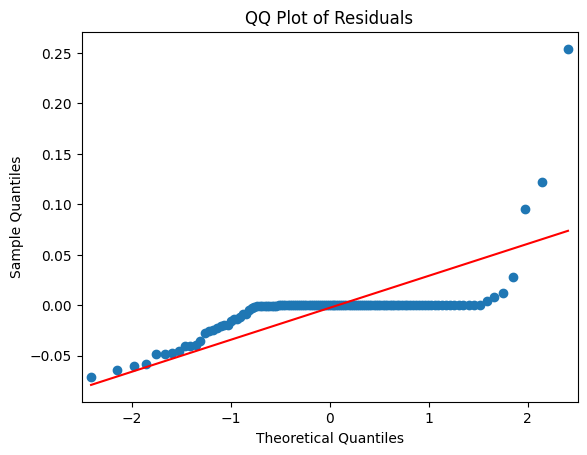

In [118]:

df1['residuals']=df1['log_mig_rate'] - df1['predictions']

# 直方图
plt.figure(figsize=(10, 5))
sns.histplot(df1['residuals'], kde=True)
plt.title('Histogram of Residuals')
plt.show()

# QQ图
sm.qqplot(df1['residuals'], line='s')
plt.title('QQ Plot of Residuals')
plt.show()


In [119]:
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

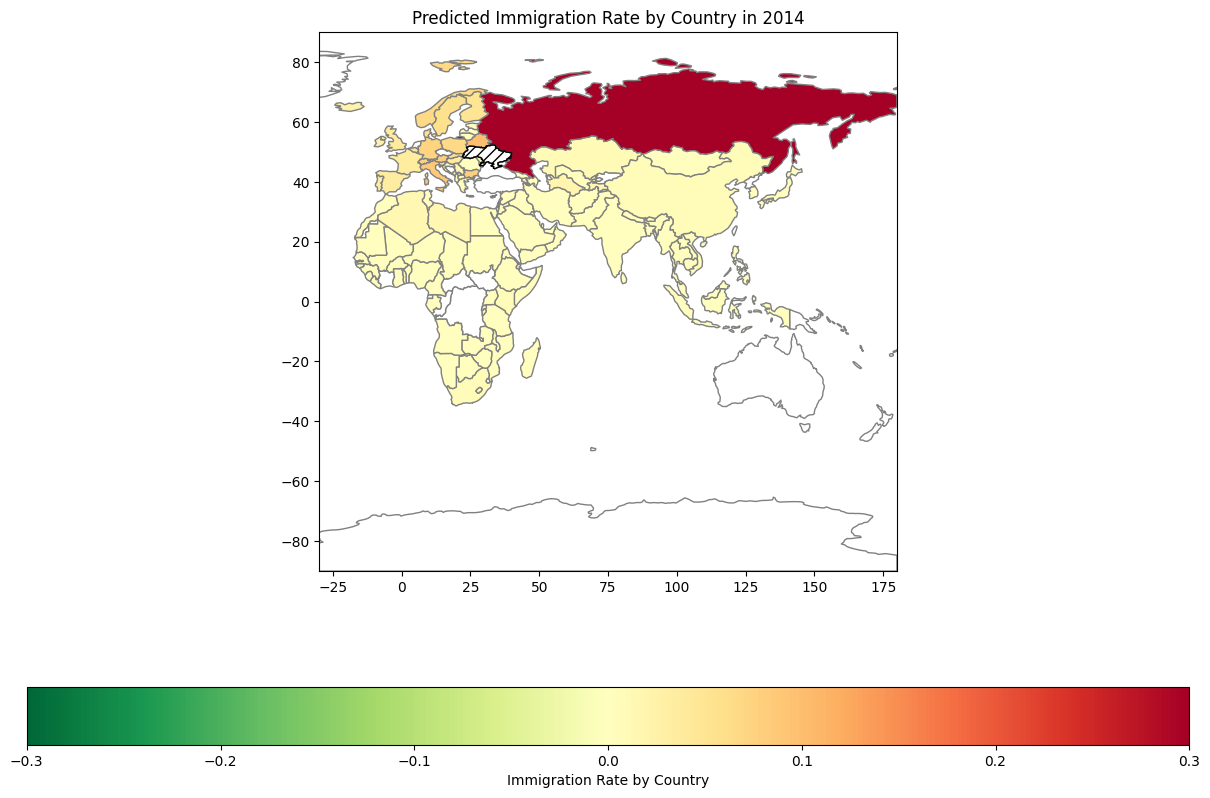

In [120]:
# 将用户数据与世界地图数据合并
merged1 = world.merge(df1, left_on='name', right_on='destination', how='left')

# 填充NA值为-1
merged1['predictions'].fillna(-1, inplace=True)


# 创建自定义颜色映射
cmap = plt.cm.RdYlGn_r  # 使用从红到绿的颜色映射
norm = plt.Normalize(vmin=-0.3, vmax=0.3)

# 绘制属性地图
fig, ax = plt.subplots(figsize=(15, 10), facecolor='white')

# 分别绘制值为 -1 和大于 0 的部分
merged1[merged1['predictions'] == -1].plot(ax=ax, color='white', edgecolor='gray')
merged1[merged1['predictions'] >= 0].plot(column='predictions', ax=ax, legend=True,
                                       legend_kwds={'label': "Immigration Rate by Country",
                                                    'orientation': "horizontal"},
                                       cmap=cmap, norm=norm, edgecolor='gray')

# 找到乌克兰的几何图形
ukr_geometry = merged1[merged1['Iso3c'] == 'UKR']['geometry'].iloc[0]

# 在乌克兰内部填充斜线
ax.add_patch(plt.Polygon(ukr_geometry.exterior.coords, hatch='///', fill=False, edgecolor='black'))

# 设置图形标题
plt.title('Predicted Immigration Rate by Country in 2014', color='black')

# 设置边框和横坐标范围
ax.set_xlim(-30, 180)
ax.set_ylim(-90, 90)

# 设置坐标轴颜色
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

# 设置坐标轴刻度颜色
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# 设置坐标轴标签颜色
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')

plt.show()

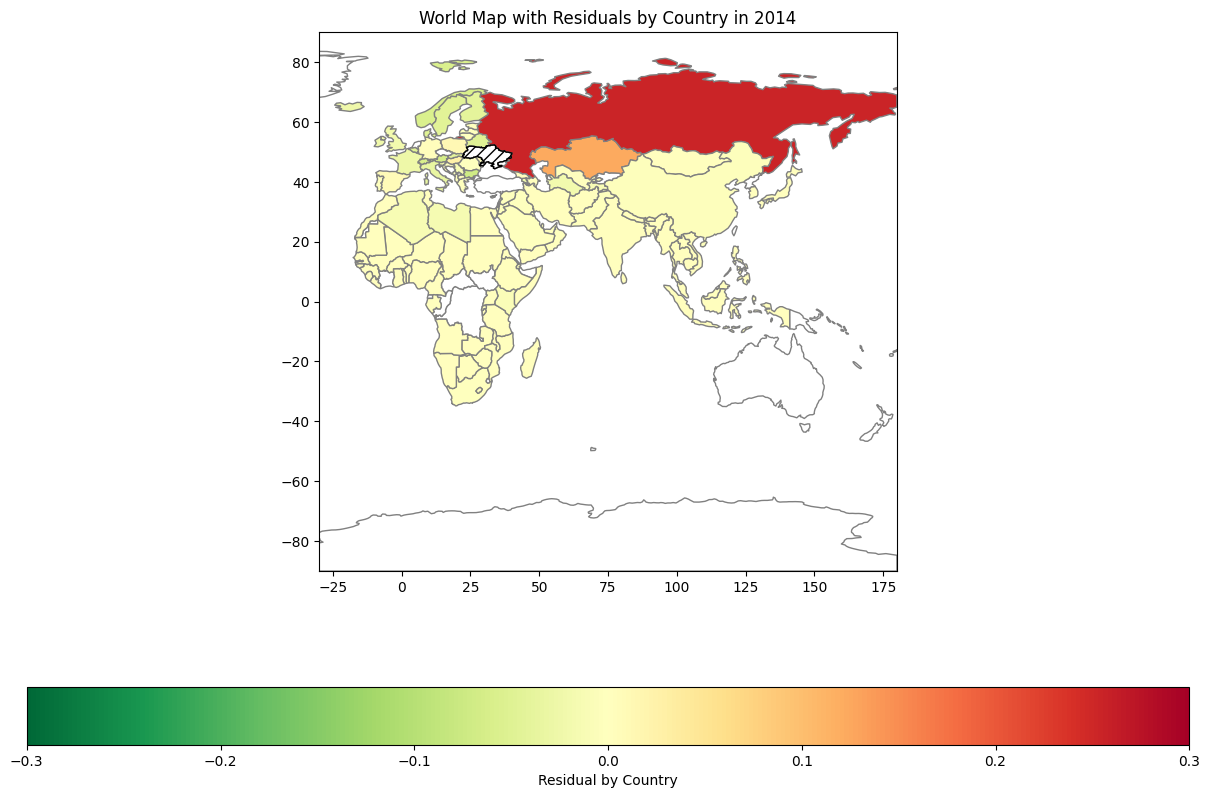

In [121]:

# 创建自定义颜色映射

cmap = plt.cm.RdYlGn_r  # 使用从红到绿的颜色映射
norm = plt.Normalize(vmin=-0.3, vmax=0.3)
# 绘制属性地图
fig, ax = plt.subplots(figsize=(15, 10), facecolor='white')
merged1['residuals'].fillna(-10, inplace=True)
# 分别绘制值为 -1 和大于 0 的部分
merged1[merged1['residuals'] == -10].plot(ax=ax, color='white', edgecolor='gray')
merged1[merged1['residuals'] !=-10].plot(column='residuals', ax=ax, legend=True,
                                       legend_kwds={'label': "Residual by Country",
                                                    'orientation': "horizontal"},
                                       cmap=cmap, norm=norm, edgecolor='gray')

ukr_geometry = merged1[merged1['Iso3c'] == 'UKR']['geometry'].iloc[0]

# 在乌克兰内部填充斜线
ax.add_patch(plt.Polygon(ukr_geometry.exterior.coords, hatch='///', fill=False, edgecolor='black'))
# 设置图形标题
plt.title('World Map with Residuals by Country in 2014', color='black')

# 设置边框和横坐标范围
ax.set_xlim(-30, 180)
ax.set_ylim(-90, 90)

# 设置坐标轴颜色
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

# 设置坐标轴刻度颜色
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# 设置坐标轴标签颜色
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')

plt.show()


对比准确度


In [122]:
df1

,iso_or,origin,iso_des,destination,year,stock,flow,geometry_x,geometry_y,continent_x,...,colonial_link,commom_reli,mig_rate,is_battle_x,is_battle_y,is_mig,log_mig_rate,predictions,residuals,Conflict_Group
18464,UKR,Ukraine,ALG,Algeria,1,141,14.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Europe,...,0.0,0.0,0.000309,1,0,0,0.000409,0.014317,-0.013908,高高
18522,UKR,Ukraine,ANG,Angola,1,3,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",Europe,...,0.0,0.0,0.000000,1,0,1,0.000100,0.000025,0.000075,高高
18580,UKR,Ukraine,ARM,Armenia,1,2268,172.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((46.50572 38.77061, 46.14362 38.74120...",Europe,...,0.0,0.0,0.003799,1,0,0,0.003892,0.024368,-0.020476,高高
18638,UKR,Ukraine,AZE,Azerbaijan,1,2875,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","MULTIPOLYGON (((46.40495 41.86068, 46.68607 41...",Europe,...,0.0,0.0,0.000000,1,0,1,0.000100,0.000051,0.000049,高高
18696,UKR,Ukraine,BEN,Benin,1,1,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((2.69170 6.25882, 1.86524 6.14216, 1....",Europe,...,0.0,0.0,0.000000,1,0,1,0.000100,0.000042,0.000058,高高
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65624,UKR,Ukraine,UAE,United Arab Emirates,1,24,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((51.57952 24.24550, 51.75744 24.29407...",Europe,...,0.0,0.0,0.000000,1,0,1,0.000100,0.000331,-0.000231,高低
65683,UKR,Ukraine,UKG,United Kingdom,1,18860,865.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",Europe,...,0.0,0.0,0.019107,1,0,0,0.019027,0.038892,-0.019866,高低
65742,UKR,Ukraine,ZAM,Zambia,1,3,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((30.74001 -8.34001, 31.15775 -8.59458...",Europe,...,0.0,0.0,0.000000,1,0,1,0.000100,0.000042,0.000058,高低
83232,UKR,Ukraine,MNG,Montenegro,1,154,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Europe,...,0.0,0.0,0.000000,1,0,1,0.000100,0.000311,-0.000211,高低


In [123]:
df1=df1[df1['destination']!='Russia']


In [124]:
df_base=data_2019_UKR
df_base=df_base.drop(columns='predictions',axis=1)
df_base['predictions']=ppml_model_all.predict(df_base)

In [125]:
data1[(data1['origin']=='Ukraine')&(data1['destination']=='Russia')]

,iso_or,origin,iso_des,destination,year,stock,flow,geometry_x,geometry_y,continent_x,...,colonial_link,commom_reli,mig_rate,is_battle_x,is_battle_y,is_mig,log_mig_rate,predictions,residuals,Conflict_Group
17175,UKR,Ukraine,RUS,Russia,-5,3065177,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...",Europe,...,1.0,0.0,0.000000,0,0,1,0.000100,0.002895,-0.002795,低高
39633,UKR,Ukraine,RUS,Russia,-4,3014038,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...",Europe,...,1.0,0.0,0.000000,0,0,1,0.000100,0.003002,-0.002902,高高
62093,UKR,Ukraine,RUS,Russia,-3,2992348,19593.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...",Europe,...,1.0,0.0,0.427135,0,0,0,0.355769,0.535261,-0.179492,高高
84554,UKR,Ukraine,RUS,Russia,-2,3015573,63290.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...",Europe,...,1.0,0.0,1.384717,0,0,0,0.869180,0.535150,0.334030,低高
107041,UKR,Ukraine,RUS,Russia,-1,3067647,92045.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...",Europe,...,1.0,0.0,2.018827,0,0,0,1.104968,0.537350,0.567619,低高
129540,UKR,Ukraine,RUS,Russia,0,3134545,107149.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...",Europe,...,1.0,0.0,2.355461,0,0,0,1.210689,0.563001,0.647688,高高
152042,UKR,Ukraine,RUS,Russia,1,3203332,109495.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...",Europe,...,1.0,0.0,2.418606,1,0,0,1.229333,0.691822,0.537511,高高
174543,UKR,Ukraine,RUS,Russia,2,3260904,98744.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...",Europe,...,1.0,0.0,2.186826,1,0,0,1.159125,0.677798,0.481327,高高
197044,UKR,Ukraine,RUS,Russia,3,3292739,73310.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...",Europe,...,1.0,0.0,1.628943,1,0,0,0.966682,0.755128,0.211554,高高
219546,UKR,Ukraine,RUS,Russia,4,3305274,54634.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...",Europe,...,1.0,0.0,1.218662,1,0,0,0.797004,0.775025,0.021979,高高


In [126]:
df_ex

,iso_or,origin,iso_des,destination,year,stock,flow,geometry_x,geometry_y,continent_x,...,mig_rate,is_battle_x,is_battle_y,is_mig,log_mig_rate,predictions,residuals,Conflict_Group,MSE,MAPE
134975,UKR,Ukraine,ALB,Albania,1,18,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Europe,...,0.000000,1,0,1,0.000100,0.000190,-0.000090,高低,8.056268e-09,0.897567
135125,UKR,Ukraine,ALG,Algeria,1,141,14.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Europe,...,0.000309,1,0,0,0.000409,0.024555,-0.024146,高高,5.830292e-04,59.008610
135275,UKR,Ukraine,ANG,Angola,1,3,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",Europe,...,0.000000,1,0,1,0.000100,0.000064,0.000036,高高,1.301289e-09,0.360734
135575,UKR,Ukraine,ARM,Armenia,1,2268,172.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((46.50572 38.77061, 46.14362 38.74120...",Europe,...,0.003799,1,0,0,0.003892,0.038033,-0.034141,高高,1.165630e-03,8.772038
135883,UKR,Ukraine,AUS,Austria,1,9521,781.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((16.97967 48.12350, 16.90375 47.71487...",Europe,...,0.017251,1,0,0,0.017204,0.076366,-0.059162,高低,3.500092e-03,3.438789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157328,UKR,Ukraine,ZIM,Zimbabwe,1,11,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",Europe,...,0.000000,1,0,1,0.000100,0.000048,0.000052,高高,2.731619e-09,0.522649
256659,UKR,Ukraine,AFG,Afghanistan,1,0,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Europe,...,0.000000,1,1,1,0.000100,0.000085,0.000015,高高,2.352241e-10,0.153370
256692,UKR,Ukraine,MNG,Montenegro,1,154,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Europe,...,0.000000,1,0,1,0.000100,0.000313,-0.000213,高低,4.527012e-08,2.127678
256760,UKR,Ukraine,SRB,Serbia,1,1276,14.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Europe,...,0.000309,1,0,0,0.000409,0.033893,-0.033484,高低,1.121185e-03,81.829321


In [127]:
df_base

,iso_or,origin,iso_des,destination,year,stock,flow,geometry_x,geometry_y,continent_x,...,mig_rate,is_battle_x,is_battle_y,is_mig,log_mig_rate,residuals,Conflict_Group,MSE,MAPE,predictions
134975,UKR,Ukraine,ALB,Albania,1,18,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Europe,...,0.000000,1,0,1,0.000100,-0.000090,高低,8.056268e-09,0.897567,0.000297
135125,UKR,Ukraine,ALG,Algeria,1,141,14.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Europe,...,0.000309,1,0,0,0.000409,-0.024146,高高,5.830292e-04,59.008610,0.034256
135275,UKR,Ukraine,ANG,Angola,1,3,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",Europe,...,0.000000,1,0,1,0.000100,0.000036,高高,1.301289e-09,0.360734,0.000091
135575,UKR,Ukraine,ARM,Armenia,1,2268,172.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((46.50572 38.77061, 46.14362 38.74120...",Europe,...,0.003799,1,0,0,0.003892,-0.034141,高高,1.165630e-03,8.772038,0.060959
135883,UKR,Ukraine,AUS,Austria,1,9521,781.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((16.97967 48.12350, 16.90375 47.71487...",Europe,...,0.017251,1,0,0,0.017204,-0.059162,高低,3.500092e-03,3.438789,0.103321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157328,UKR,Ukraine,ZIM,Zimbabwe,1,11,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",Europe,...,0.000000,1,0,1,0.000100,0.000052,高高,2.731619e-09,0.522649,0.000089
256659,UKR,Ukraine,AFG,Afghanistan,1,0,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Europe,...,0.000000,1,1,1,0.000100,0.000015,高高,2.352241e-10,0.153370,0.000184
256692,UKR,Ukraine,MNG,Montenegro,1,154,0.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Europe,...,0.000000,1,0,1,0.000100,-0.000213,高低,4.527012e-08,2.127678,0.000325
256760,UKR,Ukraine,SRB,Serbia,1,1276,14.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Europe,...,0.000309,1,0,0,0.000409,-0.033484,高低,1.121185e-03,81.829321,0.066787


In [128]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
# 假设 df 和 df1 数据集已经加载并包含 'log_mig_rate' 和 'predictions' 列


# 计算 df 数据集的误差指标
mse_df_base = mean_squared_error(df_base['log_mig_rate'], df_base['predictions'])
mae_df_base = mean_absolute_error(df_base['log_mig_rate'], df_base['predictions'])
r2_df_base = r2_score(df_base['log_mig_rate'], df_base['predictions'])

# 计算 df 数据集的误差指标
mse_df_ex = mean_squared_error(df_ex['log_mig_rate'], df_ex['predictions'])
mae_df_ex = mean_absolute_error(df_ex['log_mig_rate'], df_ex['predictions'])
r2_df_ex = r2_score(df_ex['log_mig_rate'], df_ex['predictions'])

# 计算 df1 数据集的误差指标
mse_df1 = mean_squared_error(df1['log_mig_rate'], df1['predictions'])
mae_df1 = mean_absolute_error(df1['log_mig_rate'], df1['predictions'])
r2_df1 = r2_score(df1['log_mig_rate'], df1['predictions'])

# 打印误差指标
print(f"df_base - MSE: {mse_df_base}, MAE: {mae_df_base}, R2: {r2_df_base}")
print(f"df_ex - MSE: {mse_df_ex}, MAE: {mae_df_ex}, R2: {r2_df_ex}")
print(f"df1 - MSE: {mse_df1}, MAE: {mae_df1}, R2: {r2_df1}")


df_base - MSE: 0.0037676952331013236, MAE: 0.020924465607937832, R2: 0.6966844400304177
df_ex - MSE: 0.004215895629282555, MAE: 0.01720284891030012, R2: 0.6606023936504625
df1 - MSE: 0.0004943101882498659, MAE: 0.00906779894326482, R2: -0.04639687481353305


In [129]:
ppml_modellh.aic

1712.0599988413858

In [130]:

# 计算 df1 模型的 AIC
aic_df1 = ppml_modelll.aic+ppml_modellh.aic+ppml_modelhl.aic+ppml_modelhh.aic
aic_df_base=ppml_model_all.aic
aic_df_ex=ppml_model_ex.aic
# 创建包含 MSE、MAE 和 AIC 的表格
metrics = {
    'Metric': ['MSE', 'MAE', 'AIC'],
    'df_base': [mse_df_base, mae_df_base, aic_df_base],
    'df_extend': [mse_df_ex, mae_df_ex, aic_df_ex],
    'df_stagewise': [mse_df1, mae_df1, aic_df1]
}
metrics


{'Metric': ['MSE', 'MAE', 'AIC'],
 'df_base': [0.0037676952331013236, 0.020924465607937832, 15944.638684545698],
 'df_extend': [0.004215895629282555, 0.01720284891030012, 15596.45733145018],
 'df_stagewise': [0.0004943101882498659,
  0.00906779894326482,
  15165.481909909257]}

In [131]:
rufugee_origin=['AFG','SYR','SSD','COD','MMR']
origin_country=data4[data4['iso_or'].isin(rufugee_origin)]
origin_country

,iso_or,origin,iso_des,destination,year,stock,flow,geometry_x,geometry_y,continent_x,...,colonial_link,commom_reli,mig_rate,is_battle_x,is_battle_y,is_mig,log_mig_rate,predictions,residuals,Conflict_Group
0,AFG,Afghanistan,ALB,Albania,-5,0,0.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Asia,...,0.0,0.204,0.000000,1,0,1,0.000100,0.000144,-0.000044,高低
130,SYR,Syria,ALB,Albania,-5,4,0.0,"POLYGON ((35.71992 32.70919, 35.70080 32.71601...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Asia,...,0.0,0.184,0.000000,0,0,1,0.000100,0.000256,-0.000156,高低
150,AFG,Afghanistan,ALG,Algeria,-5,4,0.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...","POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Asia,...,0.0,0.984,0.000000,1,0,1,0.000100,0.000143,-0.000043,高高
280,SYR,Syria,ALG,Algeria,-5,2201,11.0,"POLYGON ((35.71992 32.70919, 35.70080 32.71601...","POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Asia,...,0.0,0.888,0.000541,0,0,0,0.000640,0.032127,-0.031487,高高
300,AFG,Afghanistan,ANG,Angola,-5,0,0.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...","MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",Asia,...,0.0,0.000,0.000000,1,0,1,0.000100,0.000097,0.000003,高高
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259729,SSD,South Sudan,KEN,Kenya,6,118221,4615.0,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...","POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...",Africa,...,0.0,0.009,0.417190,0,0,0,0.348776,0.185298,0.163478,高高
259869,SSD,South Sudan,SUD,Sudan,6,717016,149535.0,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...","POLYGON ((24.56737 8.22919, 23.80581 8.66632, ...",Africa,...,0.0,0.009,13.517760,0,0,0,2.675473,0.184900,2.490572,高高
259931,SSD,South Sudan,YEM,Yemen,6,576,0.0,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...","POLYGON ((52.00001 19.00000, 52.78218 17.34974...",Africa,...,0.0,0.009,0.000000,0,1,1,0.000100,0.000334,-0.000234,高高
259933,SYR,Syria,YEM,Yemen,6,4059,0.0,"POLYGON ((35.71992 32.70919, 35.70080 32.71601...","POLYGON ((52.00001 19.00000, 52.78218 17.34974...",Asia,...,0.0,0.892,0.000000,1,1,1,0.000100,0.000364,-0.000264,高高


In [132]:
rufugee_destination=['PAK','TUR','SDN','URY','SAU','DEU']
des_country=data4[data4['iso_des'].isin(rufugee_destination)]
des_country

,iso_or,origin,iso_des,destination,year,stock,flow,geometry_x,geometry_y,continent_x,...,colonial_link,commom_reli,mig_rate,is_battle_x,is_battle_y,is_mig,log_mig_rate,predictions,residuals,Conflict_Group
15373,AFG,Afghanistan,PAK,Pakistan,-5,1605124,231820.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...","POLYGON ((77.83745 35.49401, 76.87172 34.65354...",Asia,...,0.0,0.961,8.575699,1,1,0,2.259329,0.260029,1.999299,高高
15374,ALB,Albania,PAK,Pakistan,-5,4,0.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...","POLYGON ((77.83745 35.49401, 76.87172 34.65354...",Europe,...,0.0,0.198,0.000000,0,1,1,0.000100,0.000102,-0.000002,低高
15375,ALG,Algeria,PAK,Pakistan,-5,196,0.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...","POLYGON ((77.83745 35.49401, 76.87172 34.65354...",Africa,...,0.0,0.959,0.000000,0,1,1,0.000100,0.000105,-0.000005,高高
15376,ANG,Angola,PAK,Pakistan,-5,23,0.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...","POLYGON ((77.83745 35.49401, 76.87172 34.65354...",Africa,...,0.0,0.005,0.000000,0,1,1,0.000100,0.000076,0.000024,高高
15378,ARM,Armenia,PAK,Pakistan,-5,1,0.0,"POLYGON ((46.50572 38.77061, 46.14362 38.74120...","POLYGON ((77.83745 35.49401, 76.87172 34.65354...",Asia,...,0.0,0.000,0.000000,0,1,1,0.000100,0.000177,-0.000077,高高
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254681,UAE,United Arab Emirates,TUR,Turkiye,6,50,7.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...","MULTIPOLYGON (((44.77268 37.17044, 44.29345 37...",Asia,...,0.0,0.941,0.000716,0,0,0,0.000816,0.023872,-0.023056,低高
254682,UKG,United Kingdom,TUR,Turkiye,6,23282,3151.0,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...","MULTIPOLYGON (((44.77268 37.17044, 44.29345 37...",Europe,...,0.0,0.014,0.047145,0,0,0,0.046167,0.018547,0.027621,低高
254683,UKR,Ukraine,TUR,Turkiye,6,5357,413.0,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...","MULTIPOLYGON (((44.77268 37.17044, 44.29345 37...",Europe,...,0.0,0.000,0.009305,0,0,0,0.009362,0.093415,-0.084053,高高
254686,UZB,Uzbekistan,TUR,Turkiye,6,10226,781.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...","MULTIPOLYGON (((44.77268 37.17044, 44.29345 37...",Asia,...,0.0,0.873,0.023258,0,0,0,0.023091,0.038604,-0.015513,高高


In [133]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# 构建PPML模型公式
formula = ('log_mig_rate ~Ongoing_Conflict_x+Ongoing_Conflict_y+'

       'Political_Instability_x+'
       'Police_Rate_x+Refugees_And_Idps_x+'

       'Political_Instability_y+'
       'Police_Rate_y+Refugees_And_Idps_y + is_battle_x+is_battle_y+'
    'gdpp_gap + log_dist +network+ commom_reli+ contig + common_lan + colonial_link +year+is_mig'

)


# 拟合Poisson Pseudo-Maximum Likelihood (PPML)模型
ppml_model_or = smf.poisson(formula, data=origin_country).fit()

# 输出模型结果
print(ppml_model_or.summary())

         Current function value: 0.114673
         Iterations: 35
                          Poisson Regression Results                          
Dep. Variable:           log_mig_rate   No. Observations:                 3175
Model:                        Poisson   Df Residuals:                     3155
Method:                           MLE   Df Model:                           19
Date:                Wed, 21 Aug 2024   Pseudo R-squ.:                  0.5350
Time:                        16:38:30   Log-Likelihood:                -364.09
converged:                      False   LL-Null:                       -783.03
Covariance Type:            nonrobust   LLR p-value:                1.879e-165
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.1288      2.151      0.990      0.322      -2.087       6.345
Ongoing_Conflict_x        

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [134]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# 构建PPML模型公式
formula = (
    'log_mig_rate ~Ongoing_Conflict_x+Ongoing_Conflict_y+'

       'Political_Instability_x+'
       'Police_Rate_x+Refugees_And_Idps_x+'

       'Political_Instability_y+'
       'Police_Rate_y+Refugees_And_Idps_y + is_battle_x+is_battle_y+'
    'gdpp_gap + log_dist +network+ commom_reli+ contig + common_lan + colonial_link +year+is_mig'
)


# 拟合Poisson Pseudo-Maximum Likelihood (PPML)模型
ppml_model = smf.poisson(formula, data=des_country).fit()

# 输出模型结果
print(ppml_model.summary())

Optimization terminated successfully.
         Current function value: 0.077416
         Iterations 23
                          Poisson Regression Results                          
Dep. Variable:           log_mig_rate   No. Observations:                 4181
Model:                        Poisson   Df Residuals:                     4161
Method:                           MLE   Df Model:                           19
Date:                Wed, 21 Aug 2024   Pseudo R-squ.:                  0.5388
Time:                        16:38:30   Log-Likelihood:                -323.68
converged:                       True   LL-Null:                       -701.88
Covariance Type:            nonrobust   LLR p-value:                3.932e-148
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.1730      3.943     -0.805      0.421     -10.902  

In [135]:
data4

,iso_or,origin,iso_des,destination,year,stock,flow,geometry_x,geometry_y,continent_x,...,colonial_link,commom_reli,mig_rate,is_battle_x,is_battle_y,is_mig,log_mig_rate,predictions,residuals,Conflict_Group
0,AFG,Afghanistan,ALB,Albania,-5,0,0.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Asia,...,0.0,0.204,0.000000,1,0,1,0.000100,0.000144,-0.000044,高低
1,ALG,Algeria,ALB,Albania,-5,0,0.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Africa,...,0.0,0.203,0.000000,0,0,1,0.000100,0.000251,-0.000151,高低
2,ANG,Angola,ALB,Albania,-5,0,0.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Africa,...,0.0,0.000,0.000000,0,0,1,0.000100,0.000083,0.000017,高低
4,ARM,Armenia,ALB,Albania,-5,3,0.0,"POLYGON ((46.50572 38.77061, 46.14362 38.74120...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Asia,...,0.0,0.000,0.000000,0,0,1,0.000100,0.000193,-0.000093,高低
6,AUS,Austria,ALB,Albania,-5,0,0.0,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...","POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Europe,...,0.0,0.001,0.000000,0,0,1,0.000100,0.000175,-0.000075,低低
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259960,SEN,Senegal,GAM,The Gambia,6,129403,4181.0,"POLYGON ((-16.71373 13.59496, -17.12611 14.373...","POLYGON ((-16.71373 13.59496, -15.62460 13.623...",Africa,...,0.0,0.773,0.256560,0,0,0,0.228478,0.739788,-0.511310,高低
259961,SIE,Sierra Leone,GAM,The Gambia,6,2576,79.0,"POLYGON ((-13.24655 8.90305, -12.71196 9.34271...","POLYGON ((-16.71373 13.59496, -15.62460 13.623...",Africa,...,0.0,0.335,0.010111,0,0,0,0.010160,0.074618,-0.064458,低低
259962,PAK,Pakistan,AFG,Afghanistan,6,146563,0.0,"POLYGON ((77.83745 35.49401, 76.87172 34.65354...","POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Asia,...,0.0,0.961,0.000000,0,1,1,0.000100,0.001642,-0.001542,高高
259963,TAJ,Tajikistan,AFG,Afghanistan,6,6268,0.0,"POLYGON ((67.83000 37.14499, 68.39203 38.15703...","POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Asia,...,0.0,0.844,0.000000,0,1,1,0.000100,0.001850,-0.001750,高高


In [136]:
mig_2018=mig[mig['year']==2018]

In [137]:
mig_2018

,iso_or,origin,iso_des,destination,year,stock,flow
58,AAB,Antigua and Barbuda,ABW,Aruba,2018,5,0.0
117,AAB,Antigua and Barbuda,AFG,Afghanistan,2018,0,0.0
217,AAB,Antigua and Barbuda,ALB,Albania,2018,0,0.0
276,AAB,Antigua and Barbuda,ALG,Algeria,2018,0,0.0
335,AAB,Antigua and Barbuda,AND,Andorra,2018,0,0.0
...,...,...,...,...,...,...,...
2889343,ZIM,Zimbabwe,VEN,Venezuela,2018,14,0.0
2889445,ZIM,Zimbabwe,VIR,Virgin Islands (U.S.),2018,0,0.0
2889545,ZIM,Zimbabwe,WSM,Samoa,2018,0,0.0
2889595,ZIM,Zimbabwe,YEM,Yemen,2018,0,0.0


In [138]:
data2=mig_2018
data2.rename(columns={'iso_or':'Country Origin Code','iso_des':'Destination Code'},inplace=True)

<ipython-input-138-a9a0e6170fa4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.rename(columns={'iso_or':'Country Origin Code','iso_des':'Destination Code'},inplace=True)


In [139]:
# Select the relevant columns and group by origin and destination
flow = data2[['year','origin','destination', 'flow']]
# Rename columns to remove any extra spaces
flow.columns = flow.columns.str.strip()
# Group by 'origin' and 'destination' without aggregation
mean_flow = flow.groupby(['origin','destination']).mean(numeric_only=True).reset_index()
flow_matrix = mean_flow.pivot(index='origin', columns='destination', values='flow')
# Convert the flow values to integers
flow_matrix = flow_matrix.fillna(0).astype(int)
mean_flow.head()

,origin,destination,year,flow
0,Afghanistan,Albania,2018.0,0.0
1,Afghanistan,Algeria,2018.0,0.0
2,Afghanistan,American Samoa,2018.0,0.0
3,Afghanistan,Andorra,2018.0,0.0
4,Afghanistan,Angola,2018.0,0.0


In [140]:
# Add summary row and column
flow_matrix['Total'] = flow_matrix.sum(axis=1)
flow_matrix.loc['Total'] = flow_matrix.sum()
flow_matrix

destination,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Vanuatu,Venezuela,Vietnam,Virgin Islands (U.S.),Wallis and Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe,Total
origin,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,145399
Albania,0,0,0,0,0,0,0,0,1,0,...,0,0,6,0,0,0,0,0,0,39653
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,60111
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yemen,0,0,28,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0,0,0,48600
Yugoslavia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4705
Zambia,0,0,0,0,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,511,6018


In [141]:
# prompt: 保留origin与total
origin_em = flow_matrix[['Total']]
origin_em.columns = ['Total']
origin_em.drop('Total', inplace=True)
origin_em

<ipython-input-141-b392017502a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  origin_em.drop('Total', inplace=True)


,Total
origin,
Afghanistan,145399
Albania,39653
Algeria,60111
American Samoa,30
Andorra,667
...,...
West Bank and Gaza,73193
Yemen,48600
Yugoslavia,4705


In [142]:
# prompt: 只保留total row

destination_im = flow_matrix.tail(1)
# prompt: 创建新表，把destination作为索引，total作为列

destination_im = destination_im.T
destination_im.columns = ['Total']
destination_im.drop('Total', inplace=True)

destination_im
origin_em.reset_index(inplace=True)
destination_im.reset_index(inplace=True)


In [143]:
peace_mean=peace.groupby(['Country','Iso3c']).mean(numeric_only=True).reset_index()
peace_mean

,Country,Iso3c,pop_est,gdp_md_est,Overall Score,Ongoing Conflict,Terrorism Impact,Violent Crime,Political Instability,Police Rate,Refugees And Idps,is_battle
0,Afghanistan,AFG,38041754.0,19291.0,3.338000,3.325377,4.480050,4.87500,4.687500,3.250000,4.810437,1.0000
1,Albania,ALB,2854191.0,15279.0,1.782500,1.299655,1.065275,3.00000,2.718750,2.705437,1.160187,0.0000
2,Algeria,DZA,43053054.0,171091.0,2.221437,2.065912,3.237588,2.40625,3.226562,3.051625,1.004750,0.0000
3,Angola,AGO,31825295.0,88815.0,1.985562,1.591901,1.395550,2.87500,2.578125,2.500000,1.078250,0.0000
4,Argentina,ARG,44938712.0,445445.0,1.908250,1.364835,1.843450,2.90625,2.445312,4.682750,1.000125,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
154,Venezuela,VEN,28515829.0,482359.0,2.529375,2.482075,3.112888,4.78125,4.117188,1.687500,1.056062,0.0000
155,Vietnam,VNM,96462106.0,261921.0,1.858437,1.376862,1.097938,2.00000,2.617188,3.484375,1.111187,0.0000
156,Yemen,YEM,29161922.0,22581.0,2.910438,2.837587,3.684213,3.59375,4.117188,3.906250,2.765500,0.5625
157,Zambia,ZMB,17861030.0,23309.0,1.824812,1.252592,1.000000,3.00000,2.406250,1.562500,1.000437,0.0000


In [144]:

# 然后进行合并，并保留索引列
country = pd.merge(origin_em, destination_im,
                   left_on='origin', right_on='destination',
                   how='left')
country

,origin,Total_x,destination,Total_y
0,Afghanistan,145399,Afghanistan,19.0
1,Albania,39653,Albania,3443.0
2,Algeria,60111,Algeria,4514.0
3,American Samoa,30,American Samoa,161.0
4,Andorra,667,Andorra,1096.0
...,...,...,...,...
231,West Bank and Gaza,73193,West Bank and Gaza,1280.0
232,Yemen,48600,Yemen,2281.0
233,Yugoslavia,4705,NaN,NaN
234,Zambia,6018,Zambia,12132.0


In [145]:

#country=pd.merge(peace_mean,country,left_on='Iso3c',right_on='Country Origin Code',how='inner')
country['Total']=country['Total_y']-country['Total_x']
country

,origin,Total_x,destination,Total_y,Total
0,Afghanistan,145399,Afghanistan,19.0,-145380.0
1,Albania,39653,Albania,3443.0,-36210.0
2,Algeria,60111,Algeria,4514.0,-55597.0
3,American Samoa,30,American Samoa,161.0,131.0
4,Andorra,667,Andorra,1096.0,429.0
...,...,...,...,...,...
231,West Bank and Gaza,73193,West Bank and Gaza,1280.0,-71913.0
232,Yemen,48600,Yemen,2281.0,-46319.0
233,Yugoslavia,4705,NaN,NaN,NaN
234,Zambia,6018,Zambia,12132.0,6114.0


In [146]:
country.columns

Index(['origin', 'Total_x', 'destination', 'Total_y', 'Total'], dtype='object')

In [147]:
# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world

<ipython-input-147-650b5ee73309>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [148]:

# 确保列名一致
world = world.rename(columns={'iso_a3': 'Iso3c'})
country = country.rename(columns={'Country Origin Code': 'Iso3c'})
# 将用户数据与世界地图数据合并S
merged = world.merge(country, left_on='name',right_on='origin',how='left')


In [149]:

# 检查并处理空值
merged['Total'].fillna(0, inplace=True)
merged['pop_est'].fillna(1, inplace=True)  # 避免除以零
merged['Total_x'].fillna(0, inplace=True)
merged['Total_y'].fillna(1, inplace=True)
# 执行除法运算
merged['net_mig_rate'] = merged['Total'] / merged['pop_est']
merged['emig_rate'] = merged['Total_x'] / merged['pop_est']
merged['imig_rate'] = merged['Total_y'] / merged['pop_est']
merged.rename(columns={'Total':'netmig'},inplace=True)

merged

,pop_est,continent,name,Iso3c,gdp_md_est,geometry,origin,Total_x,destination,Total_y,netmig,net_mig_rate,emig_rate,imig_rate
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,6565.0,Fiji,156.0,-6409.0,-0.007202,0.007377,1.752902e-04
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,12465.0,Tanzania,14513.0,2048.0,0.000035,0.000215,2.502006e-04
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,0.0,NaN,1.0,0.0,0.000000,0.000000,1.657679e-06
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,25163.0,Canada,181430.0,156267.0,0.004157,0.000669,4.826644e-03
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,115883.0,United States of America,895459.0,779576.0,0.002375,0.000353,2.728066e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,47287.0,Serbia,14346.0,-32941.0,-0.004743,0.006809,2.065666e-03
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,3382.0,Montenegro,908.0,-2474.0,-0.003977,0.005436,1.459486e-03
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",Kosovo,231.0,Kosovo,0.0,-231.0,-0.000129,0.000129,0.000000e+00
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,3143.0,Trinidad and Tobago,6615.0,3472.0,0.002489,0.002253,4.742027e-03


In [150]:
merged

,pop_est,continent,name,Iso3c,gdp_md_est,geometry,origin,Total_x,destination,Total_y,netmig,net_mig_rate,emig_rate,imig_rate
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,6565.0,Fiji,156.0,-6409.0,-0.007202,0.007377,1.752902e-04
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,12465.0,Tanzania,14513.0,2048.0,0.000035,0.000215,2.502006e-04
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,0.0,NaN,1.0,0.0,0.000000,0.000000,1.657679e-06
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,25163.0,Canada,181430.0,156267.0,0.004157,0.000669,4.826644e-03
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,115883.0,United States of America,895459.0,779576.0,0.002375,0.000353,2.728066e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,47287.0,Serbia,14346.0,-32941.0,-0.004743,0.006809,2.065666e-03
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,3382.0,Montenegro,908.0,-2474.0,-0.003977,0.005436,1.459486e-03
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",Kosovo,231.0,Kosovo,0.0,-231.0,-0.000129,0.000129,0.000000e+00
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,3143.0,Trinidad and Tobago,6615.0,3472.0,0.002489,0.002253,4.742027e-03


In [151]:
# prompt: 使用 DataFrame“merged”: 把net_mig_rate为0的改成-1

merged['net_mig_rate'] = merged['net_mig_rate'].replace(0, -1) # 将 net_mig_rate 列中值为 0 的元素替换为 -1


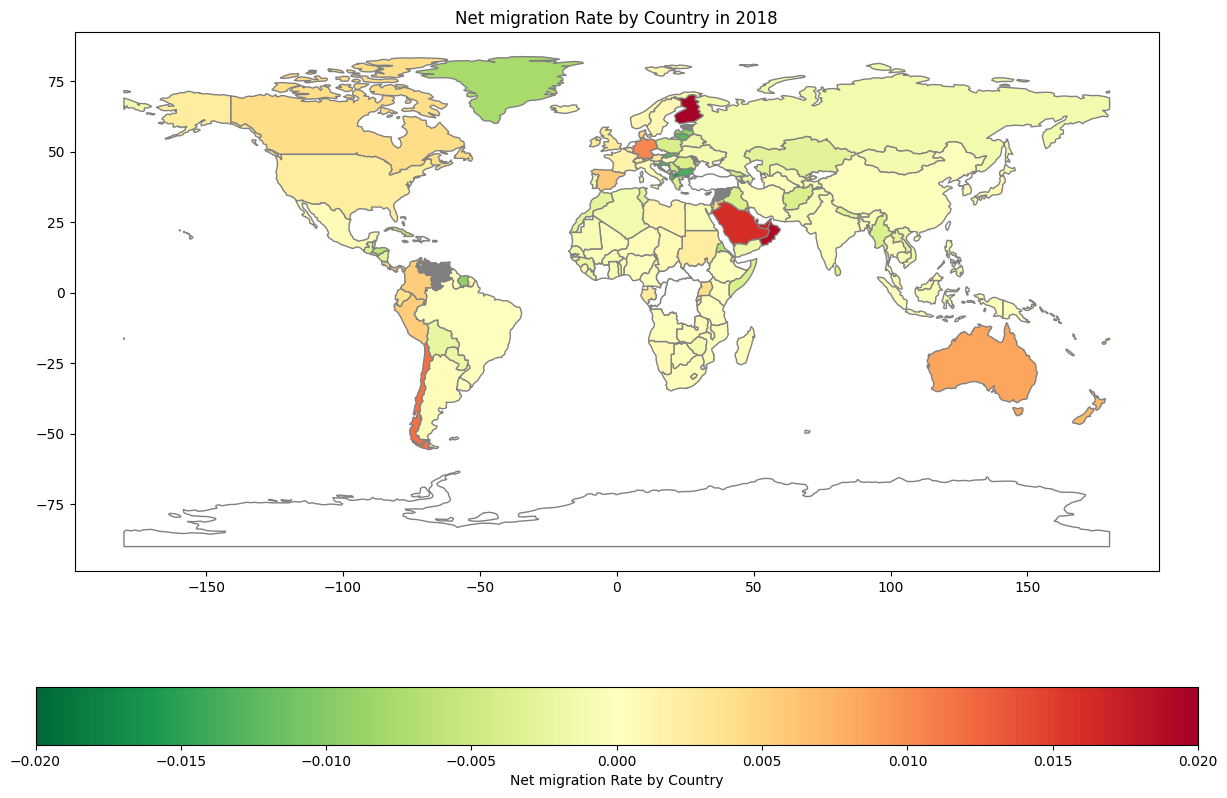

In [152]:

# 绘制属性地图
fig, ax = plt.subplots(figsize=(15, 10))
cmap = plt.cm.RdYlGn_r
cmap.set_under('gray')
norm = plt.Normalize(vmin=-0.02, vmax=0.02)
merged[merged['net_mig_rate'] == -1].plot(ax=ax, color='white', edgecolor='gray')
merged[merged['net_mig_rate'] !=-1].plot(column='net_mig_rate', ax=ax, legend=True,
                                       legend_kwds={'label': "Net migration Rate by Country",
                                                    'orientation': "horizontal"},
                                       cmap=cmap, norm=norm, edgecolor='gray')
# 设置图形标题
plt.title('Net migration Rate by Country in 2018')
plt.show()